## Variable Selection and Potential Omitted Variable Bias with LASSO
#### Term Paper Computational Statistics

<br>

*Instructor*: JProf. Dr. Lena Janys

*Author*: Max Schäfer

*Program*: M.Sc. Economics, University of Bonn (Summer Term 2020)




<br>
<hr />

### Reference Section


[**1.** Introduction](#introduction)
    
[**2.** OLS and the LASSO](#section-ii)

[**3.** Data Generating Process and Identification Problem](#section-iii)

[**4.** Simulation Study](#section-iv)

[**5.** Concluding Remarks](#conclusion)

[References](#references)

[Appendix](#appendix)

<hr />
<br>


Please feel free to ask any question, or to comment on the work.

<a id='introduction'></a>
## 1. Introduction

#### Machine Learning and Causal Inference
Identifying causal relationships is the pronounced goal of many empirical researchers and the toolkit to approach causal questions has grown in recent years (Athey and Imbens, 2017). Econometrics as the go-to field for empirical economists is increasingly in exchange with and will continue to be influenced by the machine learning (ML) literature (Athey, 2018, BOOK). The integration of ML algorithms into applied economic research is, among other factors, driven by the availability of high-dimensional datasets $-$ here, *high-dimensional* refers to datasets with many variables, possibly more variables than observations. This poses new possbilities of analysis, but also traditional workflows may become tedious or infeasible. ML features a palette of methods to deal with high-dimensional data. However, off-the-shelve ML methods are primarily used for prediction problems, and their usage does not free the researcher from making assumptions and performing a strategy when the goal is to identify causal relationships (Athey, 2018, BOOK).

At the intersection of ML and causal inference, a variety of interesting approaches emerge, with an overview in Athey (2018, BOOK) and Athey and Imbens (2017). One of them is so-called *post-double-selection* method by Belloni et al. (2014) where in a potentially high-dimensional setting the researcher seeks to identify a causal effect under the assumption of unconfoundedness (TODO. give some literature). With observational data to obtain the unbiased treatment effect estimate this assumption requires that all variables explaining both the outcome and the variable of interest, say a treatment, are included in the model $-$ given they are observable. However, in higher dimensions with a rationale to omit variables from the final model, variable selection methods may drop variables based on their weak association with the outcome, albeit they are highly predictive of the treatment, and therewith introducing *omitted variable bias* (OVB). To overcome this issue, the interest of variable selection lies primarily on including all confounding factors whose omission leads to a biased treatment effect estimate, and Belloni et al. (2014) propose to regress both the outcome and the treatment onto all potential covariates using the *least absolute shrinkage and selection operator* (LASSO) which features variable selection. The union of selected variables from both regressions form the set of covariates in the final model, which is then less prone to be affected by OVB compared to an approach when variable selection is performed on all variables in a single step. In this term paper, I want to study the variable selection property of LASSO with respect to prediction (TODO: name metrics evaluted) in general, and the double-selection method by Belloni et al. (2014) in environments where all data to achieve unconfoundedness is collected, the true model is sparse and where OVB can potentially arise if variable selection is required.

#### House Prices and Public Policy
Housing is a critical aspect of human life and varies greatly across countries (for a visual portrayal, see the [Dollar Street](https://www.gapminder.org/dollar-street/?topic=front-doors)) and also at a much finer level across neighborhoods. Policies that aim to improve living standards in neighborhoods may be evaluated through house prices. That is, a policy effect identified can often be $-$ in the fashion of local revealed preferences $-$ interpreted as the willingness-to-pay for the policy to take place, especially if the policy's outcome is difficult to value (Gibbons, 2015). For instance, valuation of a recreational park in the city center is not straight-forward since there is no market transaction with an observable price. For further examples and an overview of studies that use house prices to infer willingness-to-pay, e.g. for public transport or school quality, see Gibbons and Machin (2008). Also, externalities such as the visiual impairment from wind turbines can be measured through house prices, as is done in Gibbons (2015) and Frondel et al. (2019a). 

This strand of literature using house prices to infer willingness-to-pay for a policy inspires the setup and data-generating process. Typically, houses as the unit of observation can be described by many features ranging from physical attributes to geographical and socioeconomic aspects of the neighborhood. When the true model explaining house prices is sparse but confounding factors among the entire set of variables exist, it is not at all clear which variables to include in the final model. This empirical challenge then motivates the use of a variable selection procedure which is not agnostic about the underlying data-generating process and the identification problem, which are introduced in detail in [section 3](#section-iii). In this term paper, I choose to investigate the double-selection method by Belloni et al. (2014) which essentially uses two LASSO models to select variables included in the final OLS model by regressing the outcome and the treatment separately on all available variables. This procedure aims to identify potential confounders and thus reducing the risk of OVB. [Section 2](#section-iv) contains theoretical notes on the methods OLS and LASSO.

Good:
* 
* 

Bad:
* 
* 

Missing:
* In the potential outcome framework introduced by Rubin (TODO: literature!!), a causal effect can be identified <- sentence in 1. or 2.?
* name metrics which will be evaluated...
* more background on standard ML procedures like test train validate split, cross-validation etc.?


<a id='section-ii'></a>
## 2. OLS and the LASSO

The double-selection method builds on identifying potential confounding factors by means of LASSO and estimating a treatment effect under the unconfoundedness assumption using OLS. In this section, theoretical notes on OLS and LASSO and their interplay in the double-selection method are briefly provided. For further reading refer to MOSTLY HARMLESS, James et al. (AAAAA).

Consider the $n \times p$ regressor matrix $X$ and the outcome vector $y$ of a training dataset, where $n$ and $p$ denote the number of observations and regressors, respectively. The linear relationship between predictors and outcome can be expressed by $y_{i} = \sum^{p}x'_{i}\beta$ and is captured by the coefficient vector $\beta$.

**OLS**

The coefficient vector can be estimated by OLS and is the solution to the following minimization problem: 

$\sum_{i=1}^{n} (y_{i} - \beta_{0} - \sum_{j=1}^{p} \beta_{j} x_{ij} )^2$. 

In words, the OLS estimator minimizes the sum of squared residuals known as *RSS*. One can show that any additional regressor $x_{-j}$ included in the regression model $y_{i} = \sum^{p}x^{T}_{i}\beta + \epsilon_{i}$ will weakly decrease the training data's RSS. In the extreme case of $n=p$ every coefficient in the OLS solution $\beta_{OLS}$ will be equal to an outcome value. While in this case the training RSS is zero, it is impossible to grasp any general relationship between $X$ and $y$. When the training data is fit too well and no meaningful relationship between predictors and the outcome can be derived, we refer to overfitting. Predicting the outcome for a new set of observations (e.g. test data) will likely yield bad results in terms of standard metrics such as the test mean squared error (MSE). 

In high dimensions with $n < p$ the OLS solution is not unique, and would not yield much information given the researcher is interest in learning meaningful (linear) relationships between (some) predictors and the outcome. Technically, the OLS solution to $\beta_{OLS} = argmin_{\beta} \{(y - X\beta)^2 \}$ is infeasible and the OLS estimator given by $\beta_{OLS} = (X^{T}X)^{-1}X^{T}y$ cannot be computed since $(X^{T}X)$ cannot be inverted given it has not full column rank. Without some form of variable selection, i.e. setting elements of $\beta$ to zero, a unique solution does not exist.

<br>

**LASSO** 

One procedure which does not require $n>p$ for an unique solution is given by the LASSO formulation of the problem introduced above, first written up by Tibshirani (1996): 

$\sum_{i=1}^{n} (y_{i} - \beta_{0} - \sum_{j=1}^{p} \beta_{j} x_{ij} )^2 + \lambda \sum_{j=1}^{p} \lvert \beta_{j} \rvert $

Again, the RSS shows up in the objective function but is now governed by an additional quantity, the LASSO penalty $\lambda \sum_{j=1}^{p} \lvert \beta_{j} \rvert $. It consists of the $l_{1}$-norm $\lvert\lvert \beta \rvert\rvert_1$ and the shrinkage parameter $\lambda$. Since the LASSO puts a penalty on the coefficient's value itself, it is reduced in absolute value. Consequently, the larger this penalty is, the more pronounced coefficient estimates are shrunken towards zero, and some will be set equal to zero. This means, for a sufficiently large $\lambda$ predictors which are not or weakly associated with the outcome can be excluded from the model, granting LASSO a *variable selection* property. Intuitively, the LASSO solution is *sparse* in the sense that the final model has less predictors than observations, therefore allowing to deduce interpretable relationships between predictors and the outcome. Aside from increased model interpretability, $n<p$ is a necessary condition in high dimensions if an outcome is regressed on LASSO-selected predictors to conduct valid inference on parameter estimates (Belloni et al., 2014).[<sup>1</sup>](#fn1)

The technical reason LASSO is able to shrink coefficients all the way to zero comes from using the $l_{1}$-norm in the minimization problem. A prior formulation of the minimization problem featuring the $l_{2}$-norm referred to as *Ridge* does not allow variable selection since coefficients are never set to zero. James et al. (2013) offer great intuition why this is the case and the explanation here follows closely; rewrite the problem so that the RSS is minimized subject to constrained coefficients: $ min! \sum_{i=1}^{n} (y_{i} - \beta_{0} - \sum_{j=1}^{p} \beta_{j} x_{ij} )^2$ subject to $\sum_{j=1}^{p} \lvert \beta_{j} \rvert \leq s $ where a 1-to-1 mapping between $\lambda$ and $s$ exists. The constraint forms a budget that can be spend on coefficients' size as the RSS is minimized. For larger budgets (corresponding to a smaller penalty $\lambda$) less shrinkage takes place and the LASSO solution may well end up to be the OLS solution (given we are not operating in high dimensions). Now, imagine the regressor matrix consists of two variables with $\beta_1$ and $\beta_2$ governing the linear relationship with the outcome. The LASSO constraint region where all feasible values of $\beta$ for a given budget $\tilde{s}$ (or similarly, $\lambda$) lie, is then given by $ \lvert \beta_1 \rvert + \lvert \beta_2 \rvert \leq \tilde{s} $ and is depicted by the blue area in Figure 2.1's left panel borrowed from James et al. (2013). The red ellipses around the OLS estimator $\hat{\beta}$ exhibit the same RSS, which increases with distance to the OLS solution. Meeting the constraint, the most outward ellipse touches the constraint region at the vertical axis which yields $\beta_1$ to be zero. This is LASSO's variable selection at play. In contrast, consider the right-hand side of Figure 2.1's panel depicting the case of Ridge with a *round* constraint region (e.g. $ \beta_1^2 + \beta_2^2 \leq \tilde{s} $ ) where the ellipses are effectively not touching the constraint region at the axis; and thus, not setting coefficient estimates to zero. The intuition for $p>2$ carries through.

[1] <span id="fn1">Recall, that due to shrinking the coefficients may be biased and valid inference is not possible per-se.</span>

*Figure 2.1*
<img src="graphs/lasso_ridge_plot.png" height=500 width=500 />

If not provided with a value (or vector) of the tuning parameter the LASSO algorithm starts with a very high initial value of $\lambda$ where all coefficients are set to zero, and the model is essentially the null-model without any regressors, except for an intercept if chosen (CHECKTHIS). By subsequently reducing the penalty paramater less and less predictors are excluded from the model until a stopping criterion is reached. Usually, this stopping criterion is metric to evaluate predicitons made on a test set which was not used for training the LASSO parameters. Since the LASSO solution is continuously evaluated against a test dataset, the risk of overfitting is guarded against. In the ML literature, this procedure is called cross-validation and is in many cases considered obligatory when choosing tuning parameters. If the initial dataset is split into many subsets which are subsequently used to train and evaluate the model, one speaks of k-fold cross-validation, which is also applied in this project. See SUBSECTION 2.X where the double-selection procedure is described in greater detail.







There exist a variety of variable selection methods based on LASSO which alter and enrich the penalty term applied to the coefficient vector. Some of these advancements aim to incorporate prior knowledge of the coefficient estimates (such as IPF-LASSO, or Group-LASSO) [SOURCES].



**Double-selection method** 

The LASSO is a regularization and variable selection method that excludes variables from the regression model based on coefficient sizes which reflect the association between predictors and the outcome. Following this reasoning, predictors which are weakly associated with the outcome are excluded from the model, given the penalty parameter is sufficiently large. This is might be optimal in terms of out-of-sample prediction since the variance of predictions is reduced which trades-off the bias introduced by shrunken coefficients. Such a trade-off is reflected in the MSE which is an important metric to evaluate prediction of a quantitive response, and which can be decomposed into a bias and variance part $-$ informally, $MSE = bias^2 + variance$ (James et al., 2013). With bias in prediction due to shrunken coefficients, coefficient estimates themselves are prone to be biased. Inference on these estimates is thus infeasible. In cases where variable selection is mandated by high dimensions LASSO can be used to select a low dimensional set of variables whose coefficients are then estimated by OLS in a subsequent regression. For instance, Belloni and Chernozhukov (2013) show good theoretical performance of the OLS estimator in modelling the regression function after selecting variables by means of LASSO in a first step, even when the true model is not perfectly selected. Inference on estimates is then "brought back" to grounds which are very well understood. However, some argue that such a procedure is problematic for (causal) inference since variable selection of plain LASSO is geared towards prediction, and with imperfect model selection omitted variable bias may occur if confounding factors are excluded for their low direct association with the outcome, see Athey and Imbens (2017) or Belloni et al. (2014).

To counteract the risk of OVB in a potentially high dimensional setting where the researcher is interested in causal inference on a single parameter, the treatment effect, under the assumption of unconfoundedness, Belloni et al. (2014) propose a double-selection method which consists of three steps:

1. Select a set of control variables that predict the outcome by means of LASSO (first stage)
2. Select a set of control variables that predict the treatment by means of LASSO (second stage)
3. Estimate the treatment effect by an OLS regression of the outcome on the union of selected control variables from 1. and 2.



. imperfect variable selection
. assumptions needed to achieve these results: approximate sparsity [TODO]


While the data-generating process and the identification problem are described in more detail in section 3, consider here the linear model to introduce the double-selection more formally.

Consider the two linear models 

(1) $y_{i} = D_{i} \alpha + X_{i}^T \beta + \epsilon_{i}$

(2) $D_{i} = X_{i}^T \gamma + u_{i}$

where $y_{i}$ is the outcome, $D_{i}$ is the scalar treatment and $X_{i}$ is the vector of controls for individual $i = 1, ..., n$. The mean-zero disturbances are given by $\epsilon_{i}$ and $u_{i}$.

Following the double-selection procedure, LASSO is used to select features from regressing $y$ on $X$ yielding the subset $\bar{X}^{1}$ in a first-step, then selected features from predicting the treatment $D$ with the same regressor matrix $X$ by LASSO are stored in $\bar{X}^{2}$. The union of $\bar{X}^{1}$ and $\bar{X}^{2}$, denoted by $\bar{X}$, is then used in an OLS regression of the outcome $y$ onto the treatment $D$ and matrix of controls $\bar{X}$.

The final OLS regression model estimated in the third step of the procedure reads 

(3) $y_{i} = D_{i} \alpha^* + \bar{X_{i}^T} \beta + v_{i}$

According to Belloni et al. (2014), inference (e.g. building confidence intervals) on the treatment effect estimator $\hat{\alpha}^*$ is valid [CHECKTHIS].


<br>

#### Metric of Interest: Omitted Variable Bias

The main metric of interest in this project is the treatment effect estimate bias that arises due to omitted confounding factors. Here, we briefly revisit how omitted confounders affect the OLS estimator. Consider to estimate the causal effect of the treatment $X_{2i}$ on $y_i$, with control vector $X_{1i}^T$, the scalar confounder $G_i$ and a mean-zero disturbance $\epsilon_i$ for units $i = 1, ..., N$:

$y_{i} = X_{1i}^T \beta_1 + X_{2i} \beta_2 + G_{i} \zeta + \epsilon_{i}$

If this regression equation is estimated without $G_{i}$, the error term capturing the unexplained bits of $y_i$ will then contain variation stemming from the confounding factor. The short model writes: 

$y_{i} = X_{1i}^T \beta_1 + X_{2i} \beta_2 + \mu_{i}$ 

with $\mu_{i} = G_{i} \zeta + \epsilon_{i}$


The OLS estimatr is given by $\hat{\beta} = \beta + \sum_{i=1}^{N} (X_{i}X_{i}^T)^{-1} \sum_{i=1}^{N} X_{i}G_{i} \zeta + \sum_{i=1}^{N} (X_{i}X_{i}^T)^{-1} \sum_{i=1}^{N} X_{i} \epsilon_{i}$. Assuming the included regressors are independent of the error term $\epsilon_i$, the latter term becomes zero as the here depicted covariance $E(X_i, \epsilon_i)$ is zero, define $E(X_i, \epsilon_i) \equiv E[X_i \epsilon_i] - E[X_i] E[\epsilon_i]$, where $X_i$ and $\epsilon_i$ are independent and $E[\epsilon_i] = 0$ for all $i$. Note that the covariance of $X_i$ and $\mu_i$ is not zero since by definition of a confounder the covariance between at least one regressor and the confounding factor is not zero, here this amounts to $E(X_i, G_i) \neq 0$. Further, as the confounder is also related to the outcome $y_i$, the coefficient $\zeta$ is not zero, which yields the OLS estimator biased. Tthe omitted variable bias reads 

$\hat{\beta} - \beta = \sum_{i=1}^{N} (X_{i}X_{i}^T)^{-1} \sum_{i=1}^{N} X_{i}G_{i} \zeta$

Note, that the bias is larger the larger the covariance between regressors and confounder and the larger the association of the outcome with the confounder, ceteris paribus. If the omitted variable is unrelated to either the outcome or all regressors, the bias is zero. These theoretical properties will be highlighted during the simulation study.

In this project, OVB or simply bias refers to the quantity $\hat{\alpha}^* - \alpha$.

What to look at

* Variable selection without prior knowledge (and focus on prediction), purely data-driven: LASSO
* Variable selection without prior knowledge (and focus on OVB, unconfoundedness), purely data-driven: double-selection with LASSO
* Variable selection with prior knowledge: adaptive LASSO, IPF-LASSO, Group-LASSO etc.
* thresholded lasso (when betas with very small values are additionally dropped), see Least Squares after model selection

Note that the presence of high dimensional data does not only arise because of the richness of modern datasets but also when the researcher wishes to specify flexible functional forms or the inclusion of many interactions between covariates.

Good:
* 
* 

Bad:
* What happens if the beta coefficients are smaller due to measurement? Measured in EUR versus measured in TEUR: explanatory power should be the same, coef size is not. What will LASSO do?
* 

Missing:
* How to choose LAMBDA <- this is a critical point, is it cross-validation or the one Belloni et al use... or some other rule-of-thumb
* 

<a id='section-iii'></a>
## 3. Data Generating Process and Identification Problem

Questions to ask:
* is true model sparse or not?
* degree of correlation?
* how many Xs do we have? are we in high dimensions or not?

* two cases (or smooth): with OVB / without OVB, or smooth: degree of OVB, perhaps, as measured with share of Xs correlated with both D and Y


#### DGP-a

The main goal is to identify the causal effect of a treatment in a setting where the unconfoundedness assumption holds. Hence, the data are generated to install this setting, and there are three types of variables: the outcome $Y$, the treatment $D$ and potential confounding factors $G$. Their causal relation to each other is depicted in form of a directed-acyclical graph in *Figure 3.1* where directed edges indicate a causal link. The treatment is causally explained by the true confounders $G$; the treatment $D$, as a function of $G$, affects the outcome $Y$; and, the true confounders $G$ are also affecting the outcome $Y$. Finally, variables that are context-wise related to the confounders but do not affect the treatment and the outcome are denoted by $G'$. The relationships depicted by the directed edges are of linear form and are described by the following two models which should be familiar from SECTION 2: 

(1a) $y_{i} = D_{i} \alpha + G_{i}^T \beta + \epsilon_{1, i}$

(2a) $D_{i} = G_{i}^T \gamma + \epsilon_{2, i}$

All potential confounders are subsumed in the vector $G_i$ and true confounders have non-zero entries in the respective coefficient vectors. Note that while confounders have non-zero entries in both $\beta$ and $\gamma$, non-confounders have zero entries in both $\beta$ and $\gamma$. Hence, in the setting described by DGP-a there are no covariates explaining only the treatment but not the outcome, or vice-versa. This simplification is relaxed in DGP-b. Mean-zero disturbances are given by $\epsilon_{1, i}$ and $\epsilon_{2, i}$ and are not shown in *Figure 3.1*.

<br>

*Figure 3.1*
<img src="graphs/dgp_0.png" height=500 width=500 />

#### DGP-b

While DGP-a above is a rather basic setup [which is also used in the literature][TODO], further variables determining the treatment and the outcome are considered in DGP-b. Qualitatively, it is described by *Figure 3.2* and the two adjusted linear models:

(1b) $y_{i} = D_{i} \alpha + G_{i}^T \beta + H_{i}^T \pi + \epsilon_{1, i}$

(2b) $D_{i} = G_{i}^T \gamma + F_{i}^T \eta + \epsilon_{2, i}$

Interpretation of the figure and the linear equations are analogous to above.




<br>

*Figure 3.2*
<img src="graphs/dgp_3.png" height=515 width=515 />

#### Current notes on dgp

TODO how is this to interpret? the geographical features of the HOUSES's
. neighborhood / geographical cell determine whether a wind turbine is
.  constructed, one of this predictors is surely the density of houses


Typically, houses as observational units can be described by many variables due to their nature of comprising many objects with many facettes, and one can think of a lot of observed variables ranging from number of different type of rooms, furnishing and geographical and socioeconomic features of the neighborhood. Which features are important to predict house prices is a crucial question, and even more so in settings with a lot of available features, to perform predictions for houses not in the original sample. In light of the well-known bias-variance trade-off in prediction problems, it might be optimal (in terms of an accuracy metric such as the test mean-squared error (MSE)) to exclude certain variables from the model when predicting housing prices since the increase in bias is (over-)compensated by the decrease in variance. In a setting where prediction (and a minimal MSE) is the goal; we are fine. But if interested in the causal effect of a policy, there is trouble if the excluded variable is a confounding factor, leading to a biased treatment effect estimate since unconfoundedness is violated. This is an unpleasant scenario given all confounders are contained in the dataset $-$ which I assume in this theoretical setting $-$ but we fail to include them. 

-> solution : double-selection. 


In fact, to evaluate predictions of a (ML) model, the test mean-squared error (MSE) is a conventional metric which is computed for a test dataset $-$ in ML the standard procedure is to split the original sample into test and training (and validation) datasets, and thus, to train and test models on different data, see e.g. James et al. (2013). The MSE consists of a bias and a variance part which are traded-off in model training. As a result, models built with an algorithm to minimize the MSE may exihibit bias to drive down the variance of predicted values. An effective way to reduce variance (in linear models) is to deploy *regularization* methods, such as Ridge regression or LASSO, that shrink the estimated coefficients towards zero, which reduces the range that predicted values take on for a given observation (James et al., 2013). Due to the L1-penalty, the aforementioned LASSO can shrink coefficients all the way to zero, which in fact, makes LASSO a variable selection method. 

In brief, I assume that all data to achieve unconfoundedness are collected, the true model explaining house prices is sparse, and confounding factors exist that influence both the policy treatment and the outcome. With many potential covariates, causal inference can be framed as a variable selection problem (Belloni et al., 2014).

In [1]:
library(glmnet)
library(mvtnorm)
library(stringr)
library(ggplot2)
library(gridExtra)

Loading required package: Matrix

Loaded glmnet 4.0



In [41]:
source("C:/Users/Max/Desktop/MASTER/computational_statistics/compstat-project/code/data_generating_process.R")
source("C:/Users/Max/Desktop/MASTER/computational_statistics/compstat-project/code/variable_selection.R")
source("C:/Users/Max/Desktop/MASTER/computational_statistics/compstat-project/code/compute_metrics.R")
source("C:/Users/Max/Desktop/MASTER/computational_statistics/compstat-project/code/plot_functions.R")
source("C:/Users/Max/Desktop/MASTER/computational_statistics/compstat-project/code/simulation_function.R")

Good:
* 
* 

Bad:
* 
* 

Missing:
* 
* 

<hr>

<a id='section-iv'></a>
## 4. Simulation Study

What is important?

* What is metric of interest? MSE, Bias, Biased estimate of effect of interest ... (prediction vs. identification of causal effect)
* MSE decomposition -- show how bias and variance is traded-off against each other and how the reduction in variance can increase precision in terms of MSE. (what about coeff estimates?)
* Formulate clear expectations what I expect happens to these metrics when varying a, b, c and give clear intuition
* Comment on whether expectations where met. Why? And why not?

Perhaps, do sim study in two parts. One with OVB and one without, to highlight Lasso, adaptive lasso and double selection in principle?

(Double selection probably higher variance and smaller bias since it picks more variables compared to one-way-lasso? in the absence of OVB).
Same with OVB, but: here it is good since it probably reduced OVB.

### 4.1 Introduction to Simulation Study

The simulation study consists of several parts. To keep an overview, this subsection introduces the setup building on the data-generating process(es) from SECTION 3, the rationale behind the metrics evaluated during simulation and the motivation behind choices of parameters which are varied to produce simulation results. In this fashion, the simulation studies the behavior of the confounding bias and other metrics for VARYING DEGREES OF SPARSENESS; DIMENSIONALITY OF THE REGRESSOR MATRIX; ETC.[TODO]. To begin with, there will be a brief walk through the entire process of a *single* simulation run, which is later repeated $R$ times, and lastly repeated $R$ times for each value of a parameter vector. 

The key metrics to be evaluated throughout the simulation study are concerned with the confounding bias, defined as $\hat{\alpha}^* - \alpha^*$, e.g. the treatment effect estimate is said to be upward biased if it is greater than the true value. Biased treatment effect estimates occur if confounding factors are excluded by the LASSO-based selection methods, yielding the number / rate of falsely excluded confounders an important metric. It is here denoted by the false-positive rate where the *positive* state refers to a predictor with zero effect. Similarily, the true-positive rate refers to zero-effect predictors being correctly excluded by the selection method.


For the single simuation, obtain a training dataset from DGP1[TODO] described in SECTION3 in its most basic form with i.i.d. controls drawn from the standard normal distribution. Controls predict the treatment quite well while their direct association with the outcome is smaller. Nevertheless, both models describing the treatment and the outcome are sparse while the number of potential controls is large ($p = 100$). To grasp how the LASSO shrinks and selects variables based on their coefficient size, the first stage (regressing the outcome on the entire set of controls) and the second stage (regressing the treatment on the entire set of controls) is conducted for a grid of LASSO penalties. In Figure 4.1 the coefficient for each control variable is plotted against the grid of penalties, and the color green depicts sparse controls whereas red shows true confounders. The grey-green line in the left panel is the coefficient on the treatment effect. As has been discussed in SECTION2, a larger penalty term shrinks coefficients as can be seen when moving from left to right. A larger penalty corresponds to a smaller budget of absolute coefficient sizes available, and due to the $l_1$-norm the LASSO shrinks some coefficients to zero. In fact, for a sufficiently large penalty, the null model is obtained.

As each penalty pins down a set of shrunken (and zero) coefficients, we must choose a penalty parameter to obtain a single regressor set which is forwarded to the post-LASSO OLS regression model. Here, $\lambda$ is chosen through ten-fold cross-validation over the test MSE, which is among the default options for the `glmnet` package. (((Belloni et al. (2014) and [SOURCE] use the penalty parameter advocated by Bickel et al. (2009)[SOURCE], which is pinned down $-$ among other quantities $-$ by the number of observations and predicors. (((In my eyes, cross-validation of the penalty term is a more conservative choice in the settings investigated in this term paper, in the sense that less controls are excluded. However, the theoretical properties of using cross-validated penalty terms seem to be less well established (Belloni et al., 2014).)))<--- quite difficult thingy here)
The cross-validated penalty term is portrayed by the dashed line. Variables whose coefficients are set to zero for this value of $\lambda$ are excluded from the set of controls which are used in the final OLS regression model. For the double-selection method, only controls which are de-selected by both LASSO regressions are not considered.

In [3]:
set.seed(12345)

In [4]:
# Setup
n <- 400

dgp <- "A"
n_G_attr <- 100
treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
nonzero_controls <- 10

In [5]:
# Update column names for identifying regressors
colnames_covariates <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1))
colnames_confounders <- colnames_covariates
colnumbers_covariates <- seq(from=1, to=n_G_attr, by=1)

# Draw dataset which is then split into training and test
data_set <- generate_data_A(n=n,
                            n_G_attr=n_G_attr,
                            treatment_effect=treatment_effect,
                            beta_GD_size=beta_GD_size,
                            beta_GY_size=beta_GY_size,
                            nonzero_controls=nonzero_controls)

data <- data_set$data
# Shuffle data before train-test-split to ensure no unintended structure exists
# due to the order of observations
random_rows <- sample(nrow(data))
data <- data[random_rows, ]

# Split data into training and test sets of equal size
data_train <- data[1:(dim(data)[1]/2), ]
data_test <- data[(dim(data)[1]/2+1):dim(data)[1], ]

y_train <- data_train$y
D_train <- data_train$D
# Assemble different regressor matrices
Z_train <- data.matrix(data_train[colnames_covariates])
X_train <- data.matrix(cbind(D_train, Z_train))


# Retrieve true covariate identifier
true_covariate_identifier_G <- data_set$true_covariate_identifier
names(true_covariate_identifier_G) <- colnames_covariates
true_covariate_identifier_G[true_covariate_identifier_G > 0] <- "n"
true_covariate_identifier_G[true_covariate_identifier_G != "n"] <- "p"
# Change column name to identify sparse covariates
colnames_two_effect <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1), true_covariate_identifier_G)
colnames_one_effect <- c("D", colnames_two_effect)

In [6]:
# Variable selection in "first" and "second" stage

# Grid of lasso penalties
lambda_grid <- seq(0, 1, by=.02)

# 1. Use Lasso to shrink/select covariates given their association with outcome Y
lasso_one <- glmnet(X_train, y_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# 2. Use Lasso to shrink/select covariates given their association with tratment D
lasso_two <- glmnet(Z_train, D_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# Extract estimates from both models
beta_hats_lasso_one <- t(matrix(coef(lasso_one, s=lambda_grid)[-1,], nrow=dim(X_train)[2], ncol=length(lambda_grid)))
beta_hats_lasso_two <- t(matrix(coef(lasso_two, s=lambda_grid)[-1,], nrow=dim(Z_train)[2], ncol=length(lambda_grid)))


# MSE-optimal penalty term for lasso
lasso_one_cv <- cv.glmnet(X_train, y_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_one <- lasso_one_cv$lambda.min

lasso_two_cv <- cv.glmnet(Z_train, D_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_two <- lasso_two_cv$lambda.min

# 1.
df <- data.frame(cbind(beta_hats_lasso_one, lambda_grid))
names(df) <- colnames_one_effect
p1_a <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_one, figure_name="Figure 4.1", title="LASSO regression of y on X | DGP-a")


# 2.
df <- data.frame(cbind(beta_hats_lasso_two, lambda_grid))
names(df) <- colnames_two_effect
p2_a <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_two, title="LASSO regression of D on X | DGP-a")

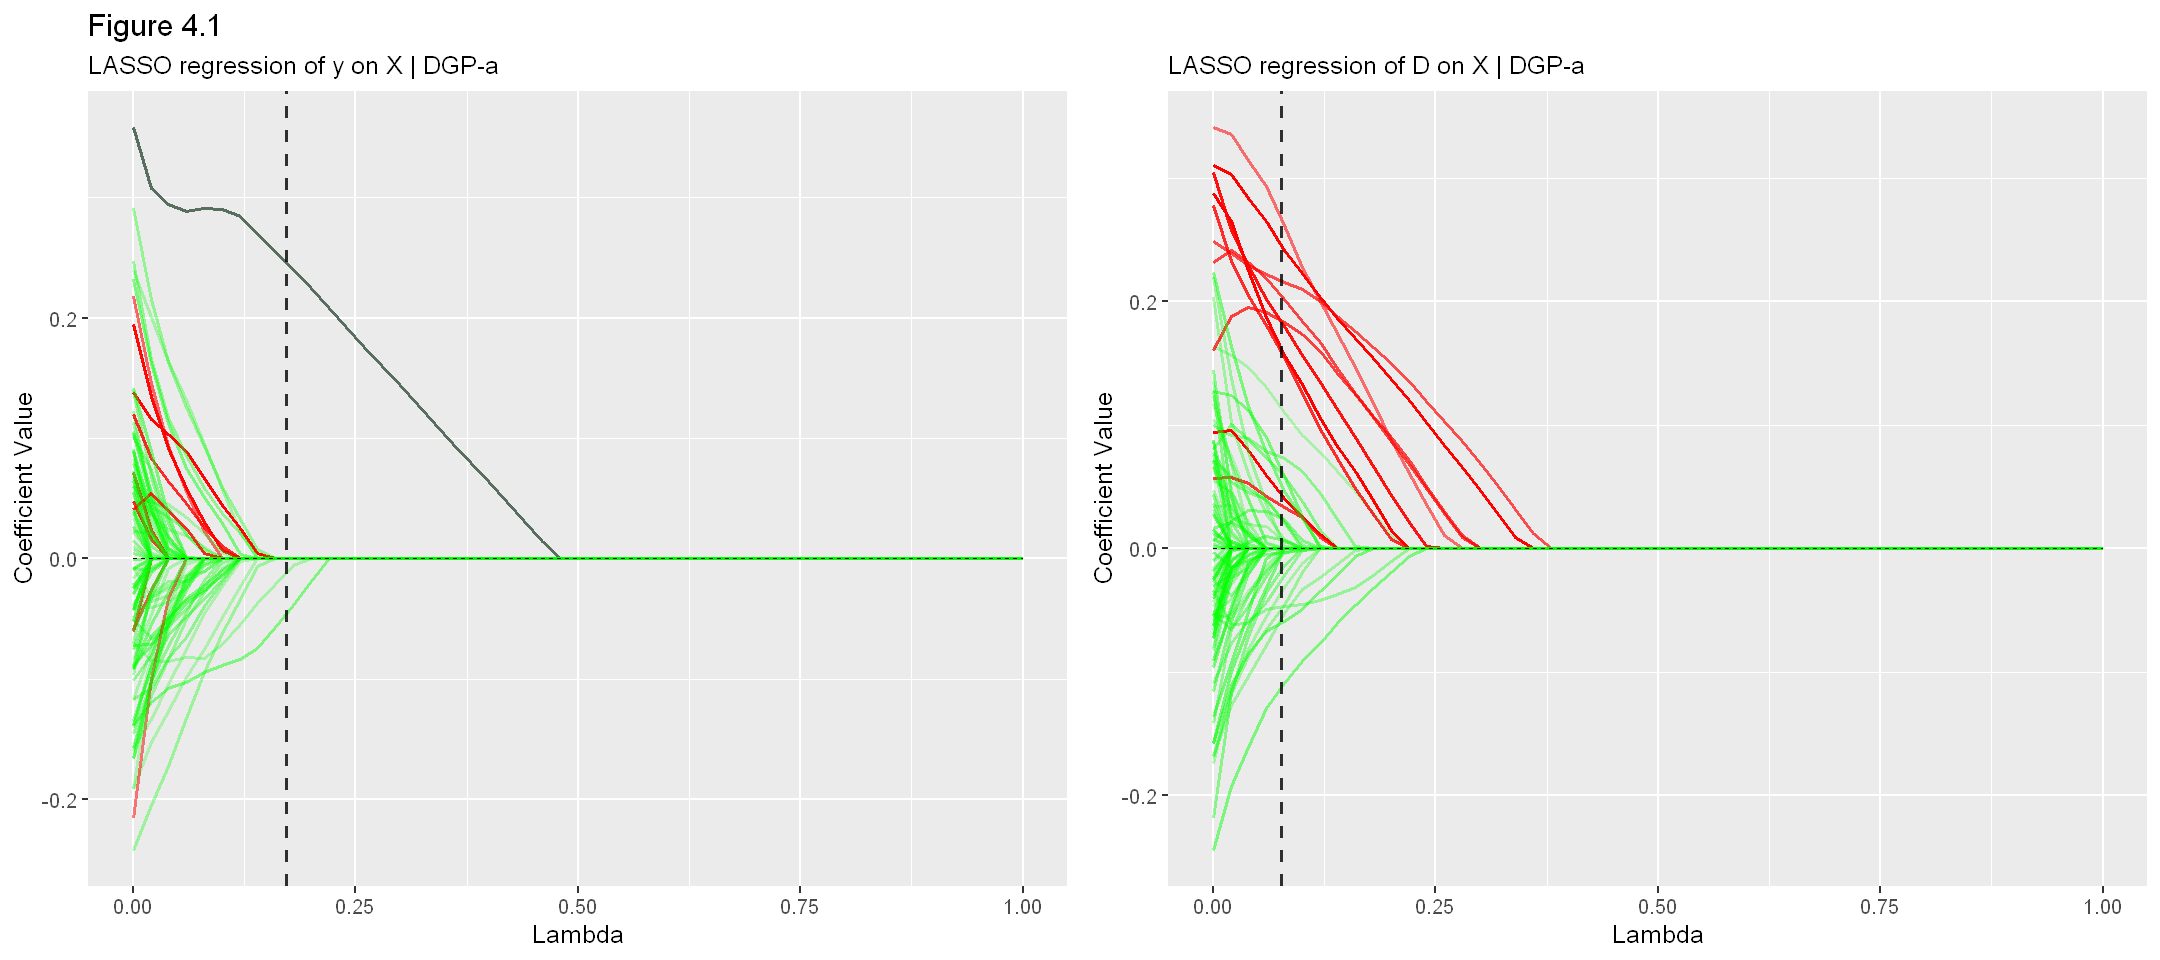

In [7]:
options(repr.plot.width=18, repr.plot.height=8)
grid.arrange(p1_a, p2_a, nrow=1)

Recall, that green coefficients belong to sparse controls and setting those to zero is desired. More problematic is the case when LASSO excludes confounders (in red) since their omission in the final OLS regression will introduce confounding bias. One can see in the right panel of Figure 4.1 that LASSO seems to cancel out unrelated predictors first, while related predictors are excluded for higher values of the penalty term. At the test MSE-optimal penalty term (dashed line), it seems from the plot, no true confounders are excluded and some unrelated predictors also survived. In fact, the amount of false-positives is zero[CHECK] in the second stage, whereas it is eight[CHECK] in the first stage (see code block below). From this, we would expect a biased treatment effect estimate if variable selection is based only on the simple post-LASSO OLS regression since true confounders were de-selected. Using the double-selection method where the union of selected variables from the first and second stage is considered in the final regression, would yield a better performance in terms of treatment estimate's bias. Note, that the first stage LASSO model may outperform the model advocated by double-selection since more unrelated regressors are included (see the false-negative rate below). However, with the goal of inference on the treatment effect estimate, double-selection is favored *in this particular simulation run*.

In [8]:
lasso_coefs_one <- cbind(coef(lasso_one_cv, s="lambda.min")[-1])
lasso_coefs_two <- cbind(coef(lasso_two_cv, s="lambda.min")[-1])

In [9]:
true_covariate_identifier <- data_set$true_covariate_identifier
# Consult only confounders (and not all potential covariates)
names(true_covariate_identifier) <- colnames_covariates
true_covariate_identifier_G <- true_covariate_identifier[colnames_confounders]
true_covariate_identifier_G[is.na(true_covariate_identifier_G)] <- 0

names(lasso_coefs_one) <- colnames_covariates
names(lasso_coefs_two) <- colnames_covariates
lasso_coefs_one_G <- lasso_coefs_one[colnames_confounders]
lasso_coefs_two_G <- lasso_coefs_two[colnames_confounders]

tp_count_one <- sum((true_covariate_identifier_G == 0) & (lasso_coefs_one_G == 0))
tn_count_one <- sum((true_covariate_identifier_G != 0) & (lasso_coefs_one_G != 0))
fp_count_one <- sum((true_covariate_identifier_G != 0) & (lasso_coefs_one_G == 0))
fn_count_one <- sum((true_covariate_identifier_G == 0) & (lasso_coefs_one_G != 0))

tp_count_two <- sum((true_covariate_identifier_G == 0) & (lasso_coefs_two_G == 0))
tn_count_two <- sum((true_covariate_identifier_G != 0) & (lasso_coefs_two_G != 0))
fp_count_two <- sum((true_covariate_identifier_G != 0) & (lasso_coefs_two_G == 0))
fn_count_two <- sum((true_covariate_identifier_G == 0) & (lasso_coefs_two_G != 0))
cat("The true-positive count for selection in the first stage using LASSO is", tp_count_one)
cat("\nThe false-positive count is", fp_count_one)
cat("\nThe true-positive count for selection in the second stage using LASSO is", tp_count_two)
cat("\nThe false-positive count is", fp_count_two)

cat("\n")
cat("\nTN-one is", tn_count_one, "and FN-one is", fn_count_one)
cat("\nTN-two is", tn_count_two, "and FN-two is", fn_count_two)

The true-positive count for selection in the first stage using LASSO is 87
The false-positive count is 10
The true-positive count for selection in the second stage using LASSO is 65
The false-positive count is 0

TN-one is 0 and FN-one is 3
TN-two is 10 and FN-two is 25

<br>

**Post-(double-)LASSO OLS regression**

Treatment effect estimation in this setting occurs in the third step where an OLS regression of the outcome on the treatment and the double-selected set of controls is performed. To finish the walk-through of a single simulation run, this last step is now done below. We use the same data which was used to draw the LASSO shrinkage plots in Figure 4.1 and for which the false-positive selection is known. Recall, that for the simple post-LASSO OLS regression a biased treatmente effect estimate is expected since we confounding factors were dropped during the MSE-optimal LASSO procedure. For the double post-LASSO OLS estimate of the treatment effect, the bias is expected to be non-existent. The bias is computed from running 

(3.1) $y_{i} = D_{i} \alpha^* + \bar{X^1_{i}} \beta + v_{i}$

for the simple selection method and

(3.2) $y_{i} = D_{i} \alpha^* + \bar{X_{i}} \beta + v_{i}$

for the double-selection method on the test dataset, where $\bar{X_{i}}$ is the double-selected covariate vector, and $\bar{X^1_{i}}$ holds covariates selected by simple LASSO for unit $i = 1, ..., n$.

In [10]:
# Create vector indicating which controls are selected
# Simple LASSO (stage one only)

lasso_coefs_simple <- lasso_coefs_one[2:dim(X_train)[2], ]  # Exclude coef. of treatment since we are interested in selecting covariates
selected_covars_one <- rbind(seq(from=1, to=length(lasso_coefs_simple), by=1))
names(selected_covars_one) <- colnames_covariates
# Keep indicators of selected covariates.
selected_covars_one[lasso_coefs_simple==0] <- NaN
simple_selected_identifier <- selected_covars_one

# Double-selection LASSO (stage one and two)

selected_covars_two <- rbind(seq(from=1, to=length(lasso_coefs_two), by=1))
names(selected_covars_two) <- colnames_covariates
# Keep indicators of selected covariates.
selected_covars_two[lasso_coefs_two==0] <- NaN

# Exclude covariates only if both lasso_one and lasso_two suggest it
double_selected_identifier <- rbind(selected_covars_one,
                                    selected_covars_two,
                                    colnumbers_covariates)

double_selected_identifier[3, colSums(is.na(double_selected_identifier)) == 2] <- NaN
double_selected_identifier <- double_selected_identifier[3, ]

In [11]:
# Consult test data for metrics
y_test <- data_test$y
D_test <- data_test$D
Z_test <- data.matrix(data_test[colnames_covariates])

# Simple selection
Z_test_selected_simple <- Z_test[, selected_covars_one[!is.na(selected_covars_one)]]
X_test_selected_simple <- data.matrix(cbind(D_test, Z_test_selected_simple))
# Double-selection
Z_test_selected_double <- Z_test[, double_selected_identifier[!is.na(double_selected_identifier)]]
X_test_selected_double <- data.matrix(cbind(D_test, Z_test_selected_double))

In [12]:
# Consult test data for metrics
y_test <- data_test$y
D_test <- data_test$D
G_test <- data_test[colnames_covariates]

# Simple selection
Z_test <- data.matrix(G_test)
Z_test_selected_simple <- Z_test[, selected_covars_one[!is.na(selected_covars_one)]]
X_test_selected_simple <- data.matrix(cbind(D_test, Z_test_selected_simple))
# Double-selection
Z_test_selected_double <- Z_test[, double_selected_identifier[!is.na(double_selected_identifier)]]
X_test_selected_double <- data.matrix(cbind(D_test, Z_test_selected_double))

In [13]:
# Estimate treatment effect by OLS provided with SIMPLE selected covariates
lm_result <- lm(y_test ~ X_test_selected_simple)
# Collect metrics of interest
confounder_bias <- lm_result$coefficients[2] - treatment_effect
test_MSE <- (1/length(lm_result$residuals)) * sum((lm_result$residuals)**2)

cat("Treatment effect estimate bias for SIMPLE selection is", round(confounder_bias, 4))
cat("\nTest MSE for SIMPLE selection is", round(test_MSE, 4))

Treatment effect estimate bias for SIMPLE selection is 0.1367
Test MSE for SIMPLE selection is 1.2213

In [14]:
# Estimate treatment effect by OLS provided with DOUBLE selected covariates
lm_result <- lm(y_test ~ X_test_selected_double)
# Collect metrics of interest
confounder_bias <- lm_result$coefficients[2] - treatment_effect
test_MSE <- (1/length(lm_result$residuals)) * sum((lm_result$residuals)**2)

cat("Treatment effect estimate bias for DOUBLE selection is", round(confounder_bias, 4))
cat("\nTest MSE for SIMPLE selection is", round(test_MSE, 4))

Treatment effect estimate bias for DOUBLE selection is -0.0664
Test MSE for SIMPLE selection is 0.9556

As was expected, the OLS estimator of the treatment effect is biased when controls from the simple LASSO selection method are taken. This is because of uncontrolled confounders which affect both the treatment and the outcome. The double-selection method proved to be more successful in detecting important controls, and therefore the treatment effect estimate is neglectable. Note, that the estimate of simple post-LASSO OLS is upward biased, which is no surprise given that the estimate picks up the positive impact from the left-out confounders on the outcome. This can also be seen in the left panel of Figure 4.1 where the treatment effect estimate rises above its true value of .25 as it picks up the positive effect of confounding factors which are shrunken and excluded for increasing values of the LASSO penalty term. However, at some point the opposing force of LASSO shrinkage dominates the bias and the treatment effect coefficient decreases to zero.

### 4.2 ---

After the walk through of a single simulation, this subsection is concerned with driving down the role chance plays in the computations of metrics by consulting $R$ simulation runs. From now on, all metrics are computed over $R$ simulation runs. Due to computational constraints the number of simulation runs depends on the specific simulation study and ranges from 20[CHECK] to 300[CHEKC]. The brief list below shows the most important metrics consulted during the simulation studies:

* Domain of (causal) inference
    * Median confounder bias
    * Root-mean-squared error of confounder bias
    * Mean and median of false-positive, TP, FN, TN rates
    * ((Rejection rates of H0: \alpha^* = 0, should be 95%??))


* Domain of prediction
    * Mean test MSE
    

First, a handful of distinct scenarios are considered to foster intuition, see SECTION4.2. Later in SECTION4.3, for given scenarios, some parameters will be *continuously* varied, i.e. discretely over a fine grid.

**Scenario 1** Data are generated according to DGP1[CHECK], the direct association between confounders and the outcome is low, whereas it is high between confounders and the treatment.

**Short description** #sparse, #high-dimensions, #controls-treatment-association-high, #controls-outcome-association-low

**Expectation** #biased-estimate-for-single #unbiased-estimate-for-double

Here, I expect that the simple selection method will exclude too many confounding factors because the direct association $-$in form of the coefficient sizes$-$ between the controls and the outcome is rather small. Consequently, the treatment effect estimate is biased. However, since the OVB is naturally smaller if the association between omitted confounders and the outcome is small. 
Conversely, since the association between controls and the treatment is high, the double-selection procedure is expected to detect relevant controls to be included in the final OLS regression model. This should leave its mark on the true-positive and false-positive rate, both being closely tight to the true rates. Due to the correct selection, the treatment effect bias is expected to be small, and its distribution centered around zero.

In [15]:
R <- 50
# Setup
n <- 400

dgp <- "A"
n_G_attr <- 100
treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
nonzero_controls <- 10

In [20]:
plots <- produce_bias_hist(dgp=dgp, R=R, n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                           treatment_effect=treatment_effect, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, beta_F_size=beta_F_size, beta_H_size=beta_H_size,
                           nonzero_controls=nonzero_controls)

hist_simple <- plots$hist_simple
hist_double <- plots$hist_double

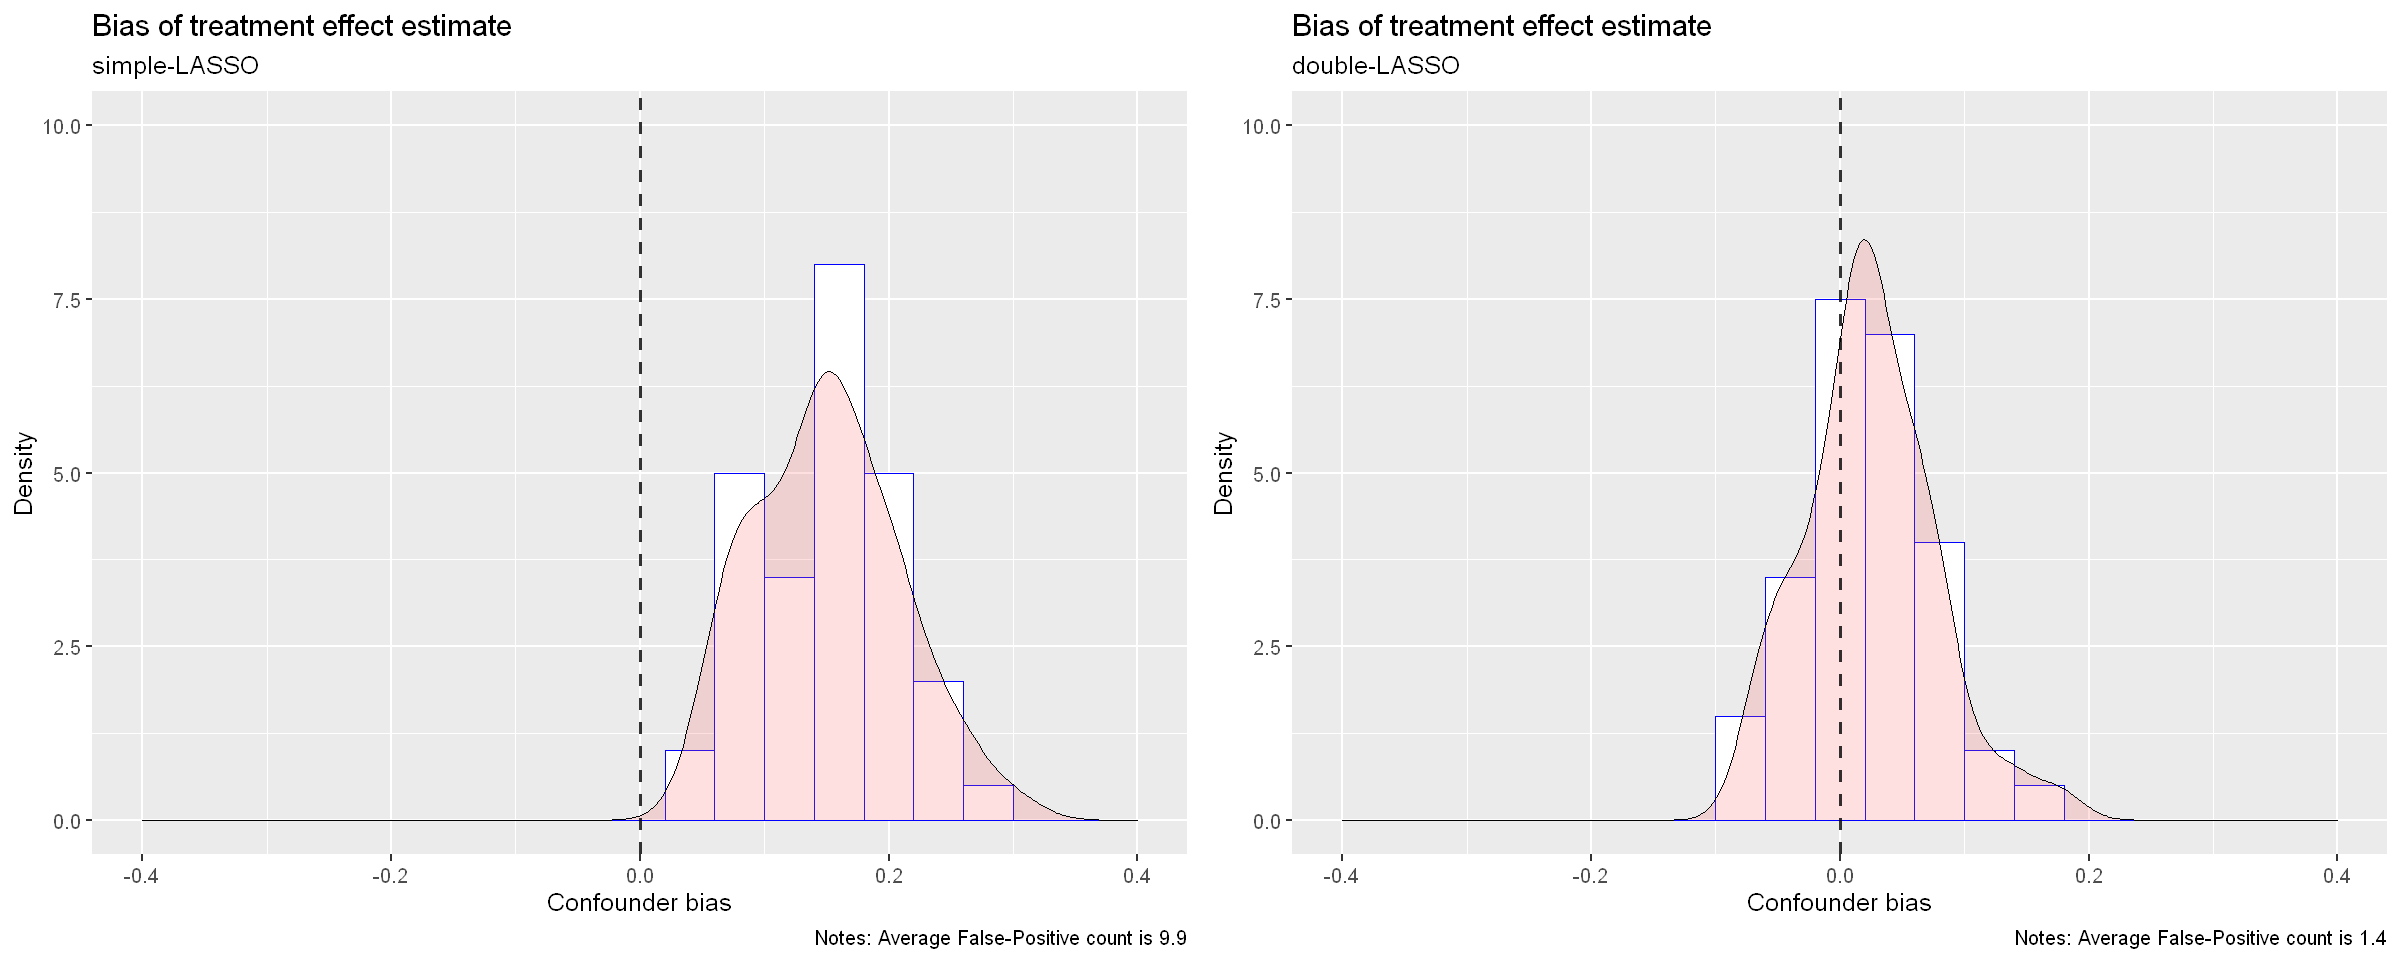

In [21]:
options(repr.plot.width=20, repr.plot.height=8)
suppressWarnings(grid.arrange(hist_simple, hist_double, nrow=1))

### 4.3 ---

In [42]:
# Setup : DGP-a
dgp <- "A"

R <- 15 #15

n <- 400
n_G_attr <- 100
treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
nonzero_controls <- 10

In [43]:
set.seed(12345)

<hr>
<br>

#### Vary Direct Effect Size of Confounders onto Outcome: $\zeta$ (beta_GY_size)

**Expectation** For the simple selection procedure, I expect that less and less true confounders are mistakenly excluded by LASSO when the direct effects' size of confounders onto the outcome increases $-$ the confounders become more important in explaining the outcome, so simple LASSO will drop less of them. This decrease in the false-positive count for an increasing direct effect should decrease the confounding bias. However, given the direct effect is still small enough for the LASSO to omit (many) confounders, the confounding bias is expected first to increase when the direct effects' size of confounders onto the outcome increases. The omitted variable problem is simply less severe if the confounder's effect on the outcome is small, for further intuition see the OVB-formula from Section 2, also depicted below. In all, two counteracting effects are at play: first, the confounding bias should increase with the direct effect size, and for sufficiently large values, it should decrease when more and more confounders are included in the final model. 

I expect that the double selection method selects a roughly constant amount of confounders while making less false-positive decisions along the different values of the direct effect size since the second stage LASSO-selection regression (treatment on controls) is unaffected by the direct effect of confounders on the outcome. The confounding bias will be small for all values of the direct effect size as few true confounders are mistakenly excluded (false-positive rate).


$\hat{\beta} - \beta = \sum_{i=1}^{N} (X_{i}X_{i}^T)^{-1} \sum_{i=1}^{N} X_{i}G_{i} \zeta$

<br>

In [44]:
# Simulation
iter_over <- "beta_GY_size"
sim_parameter_vec <- seq(from=0, to=.5, by=.025)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

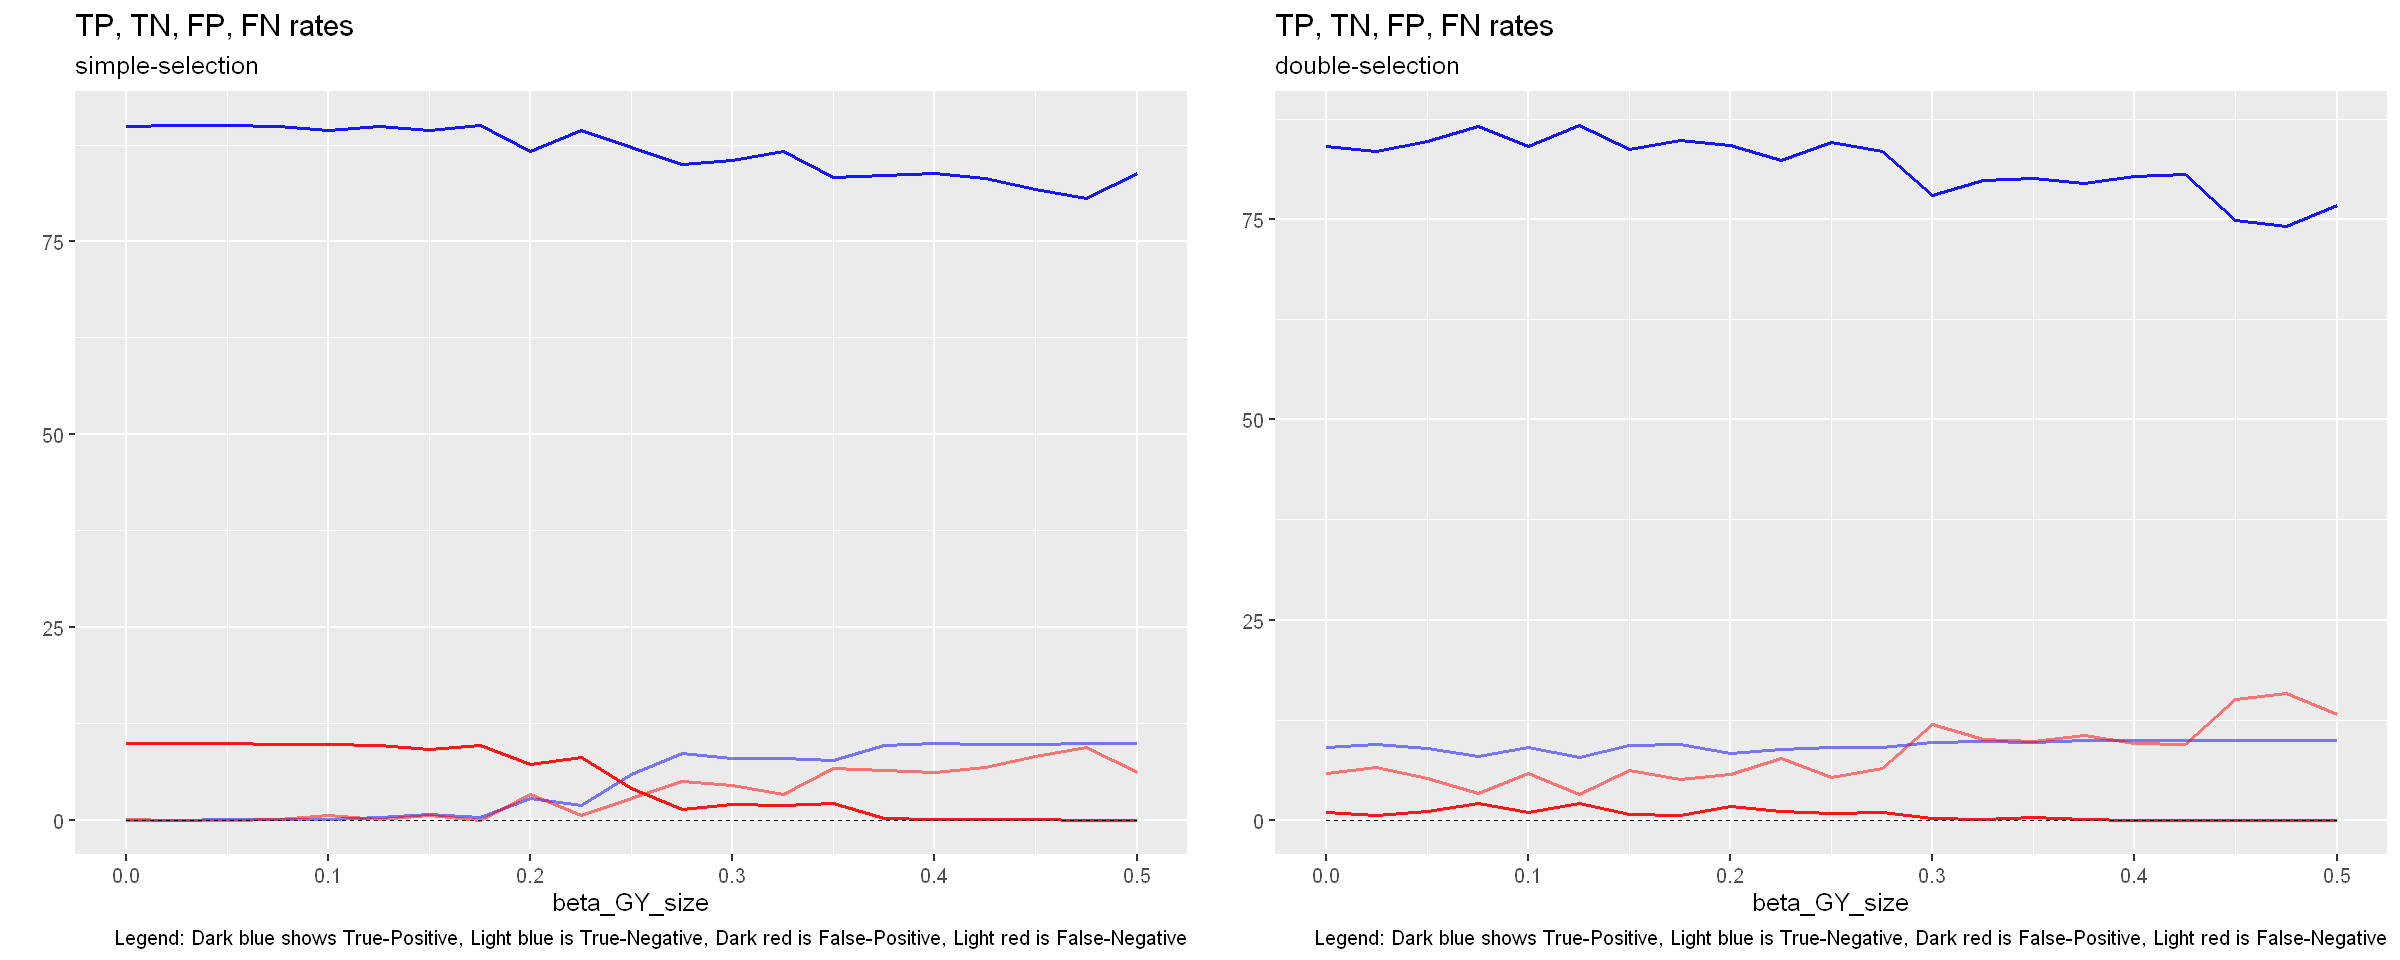

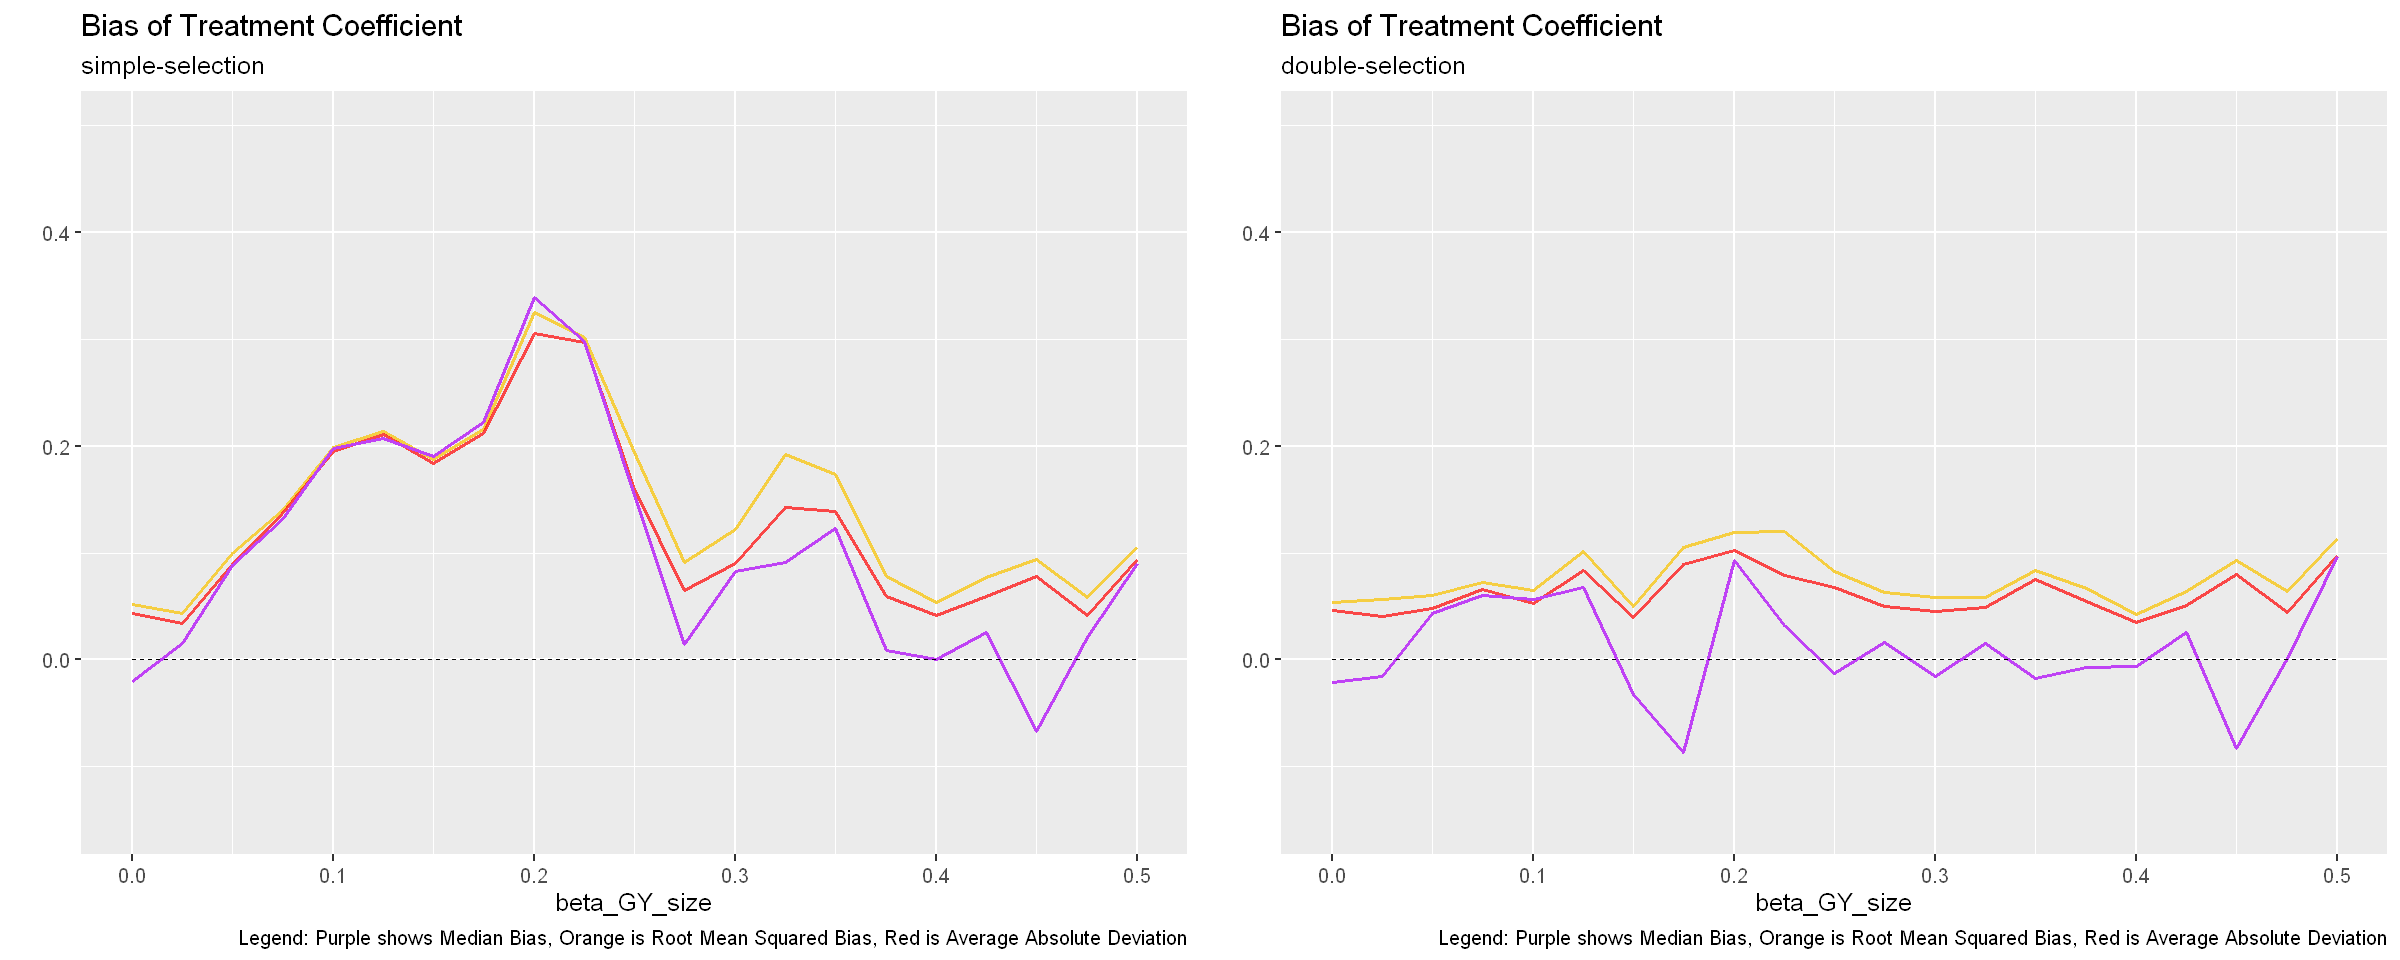

In [45]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

<br>

#### Vary Direct Effect Size of Confounders onto Outcome: $\zeta$ (beta_GY_size)

**Simulation Result** The expectations are met. The two top-level plots show the true-positive (dark blue), true-negative (light blue), false-positive (dark red) and false-negative (light red) counts for the simple and double selection procedure. For increasing coefficient sizes the simple LASSO increasingly selects the true confounders (true-negative count goes up). In fact, for sufficiently large values ($> .3$) almost no confounder is mistakenly excluded from the final model. Consequently, the median confounding bias over all $R$ repitions (purple line) hovers around zero, indicating no systematic bias is made given the direct effect size is large and simple LASSO acknowledges this. Nevertheless, the confounding bias is small for small coefficient values even when most confounders are *not* selected, which aligns with the expectation $-$ why? For small coefficient values $\zeta$, the confounding problem is less severe (see the OVB formula above). These two opposing forces are depicted by the hump-shaped form of the confounding bias metrics over the grid of direct effect sizes (bottom-left plot): first, the increase in bias is driven by the confounding problem becoming more severe. Then, as more and more confounders are selected for the final model, the effect of an ever more severe confounding problem is dominated by the presence of less and less confounders.

For the double-selection method, the false-positive count decreases with the direct effect size, too, but starts from a smaller level. That is, already for smaller coefficient values less confounders are excluded, yielding the confounding bias close to zero over the entire range of coefficient values. The second-stage LASSO regression drives this behavior: for the present parametrization the confounders are important determinants of the treatment, which is recognized by LASSO's variable selection property.[<sup>2</sup>](#fn2)

<br>
<hr>

[2] <span id="fn2">Recall, that for a variable to be excluded from the final model by the double selection method, both first-stage and second-stage LASSO must vote for exclusion. With the second-stage voting for inclusion, less confounders are excluded. Note that for double LASSO the false-negative count is larger compared to simple LASSO. This indicates that less variables are excluded, precisely because double LASSO requires that the variable is de-selected in both the first- and second-stage. Given the false-negative rate tends to be larger for double LASSO, the variance of the treatment effect estimate is larger.[CHECK LAST SENTENCE] This observation occurs at most simulation studies presented here.</span>

<hr>
<br>

#### Vary Direct Effect Size of Confounders onto Treatment: $\gamma$ (beta_GD_size)

**Expectation** The selection behavior of the simple LASSO should not be influenced by varying the direct effect of the confounders onto the treatment. The treatment incorporates all variation from the confounders $-$irrespective of the direct effect size$-$ and the treatment is used in the simple LASSO regression, and thus leaving no variance in the outcome unexplained. If the parametrization leads to omitted variables in the first-stage regression ($Y$ on $D$ and all controls), I expect that the confounding bias will increase with increasing $\gamma$ because the confounding problem becomes more severe. This is suggested by intuition as the OVB depends upon the confounders' direct effects on both the treatment and the outcome.

For the double-selection procedure, the case is not as clear since the selection behavior in the second-stage regression ($D$ on all controls) is affected by the direct effect of the confounders on the treatment. For effect sizes' values close to zero, I expect that many confounders are not selected since their effect is hardly distinguishable from the controls with zero effect.[<sup>3</sup>](#fn3) I expect that for increasing effect size, the double selection method increasingly chooses the correct confounders for the final model, i.e. the false-positive rate should decrease. Increasingly selecting confounders for the final model should decrease the confounding bias. However, as mentioned above, for smaller effect sizes the confounding problem is less severe. Again, two opposing forces are at play $-$now for the double selection method. In all, for the OLS after double LASSO, I expect the confounding bias to increase with the confounders' direct effect on the treatment as long as sufficiently many confounders are mistakenly excluded. The bias will decrease once the double LASSO detects the confounders' importance.


[2] <span id="fn3">To say it in the words of Judea Pearl, by controlling for $D$, the path ($G$ -> $D$ -> $Y$) is blocked and varying the direct effect of $G$ on $D$ will not change anything.</span>

In [46]:
# Simulation
iter_over <- "beta_GD_size"
sim_parameter_vec <- seq(from=0, to=.35, by=.01)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

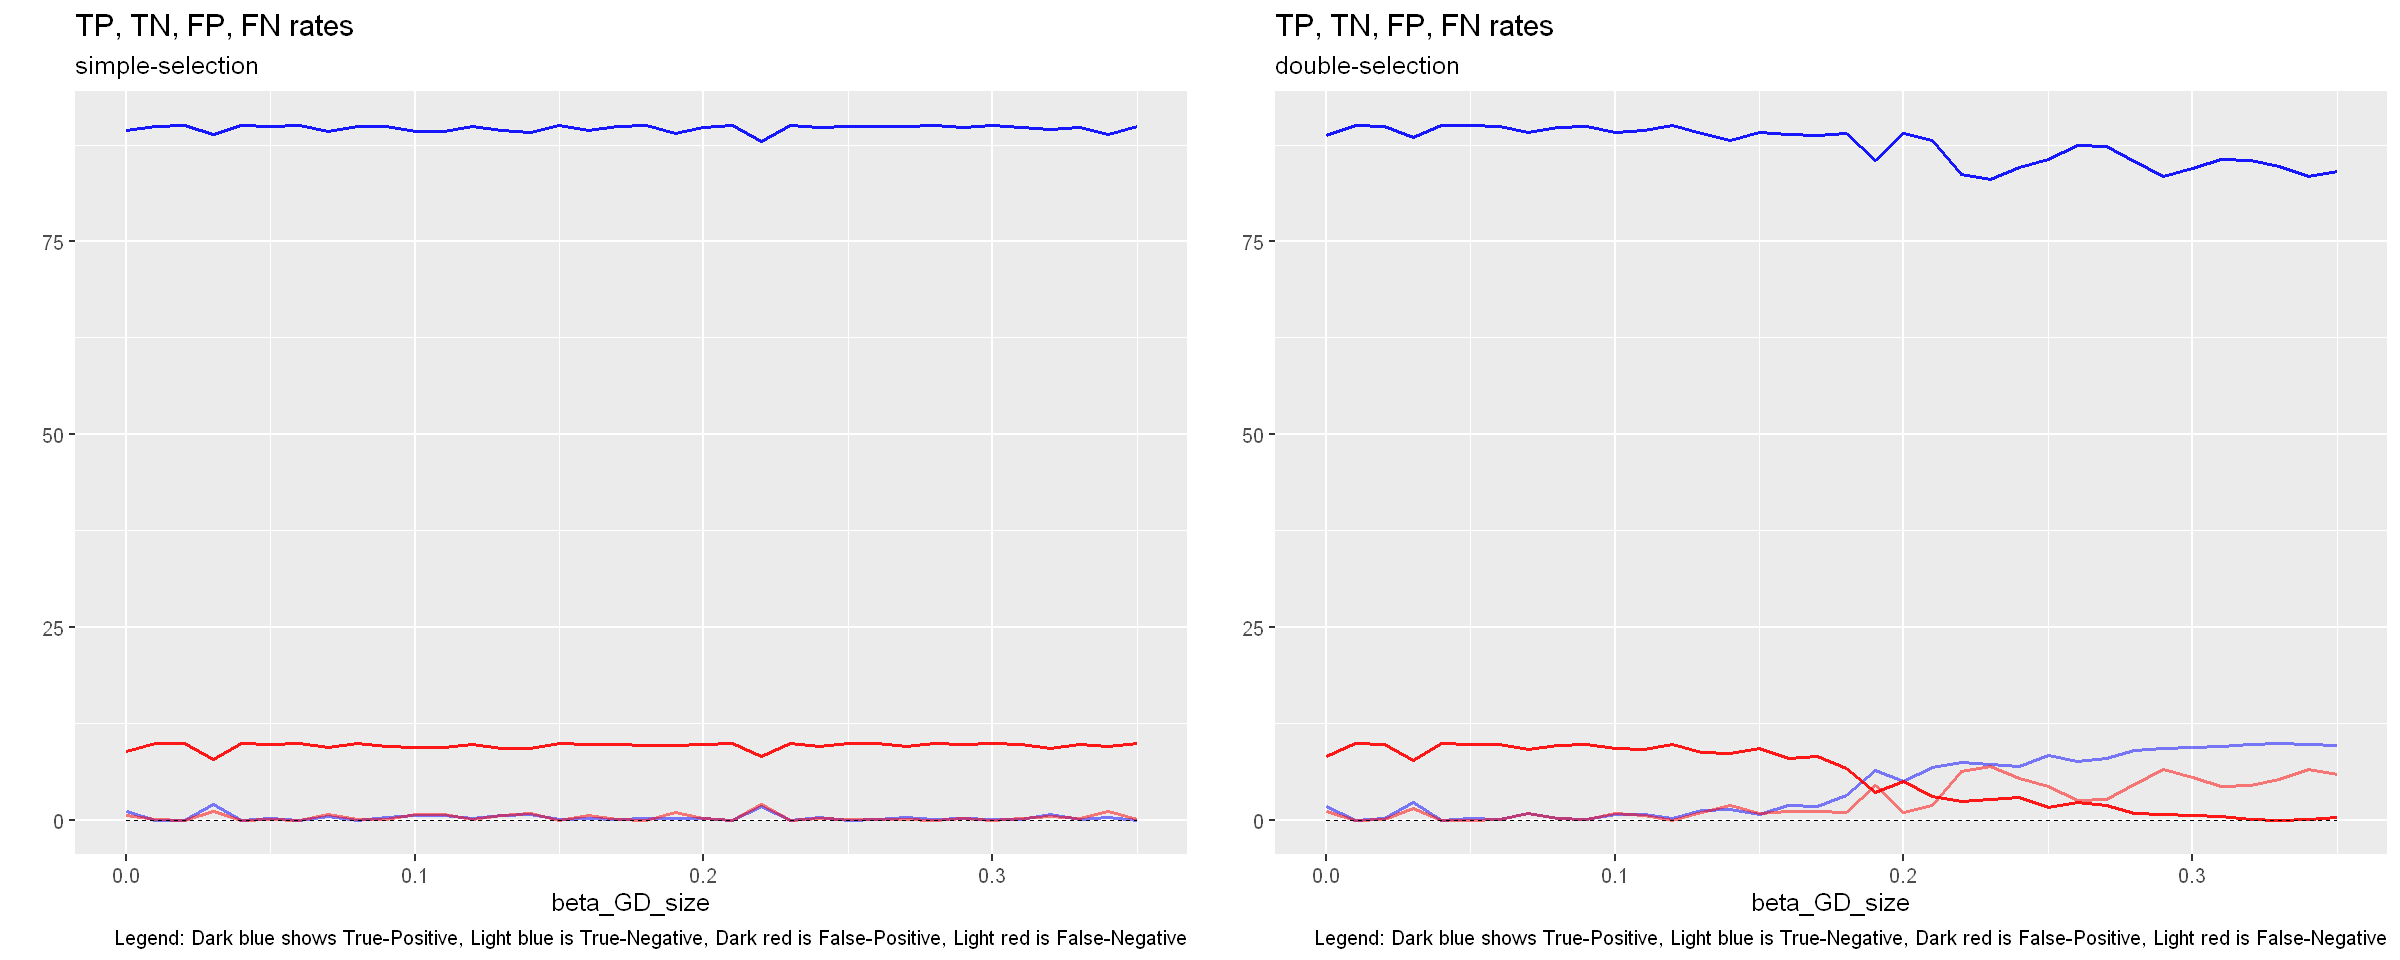

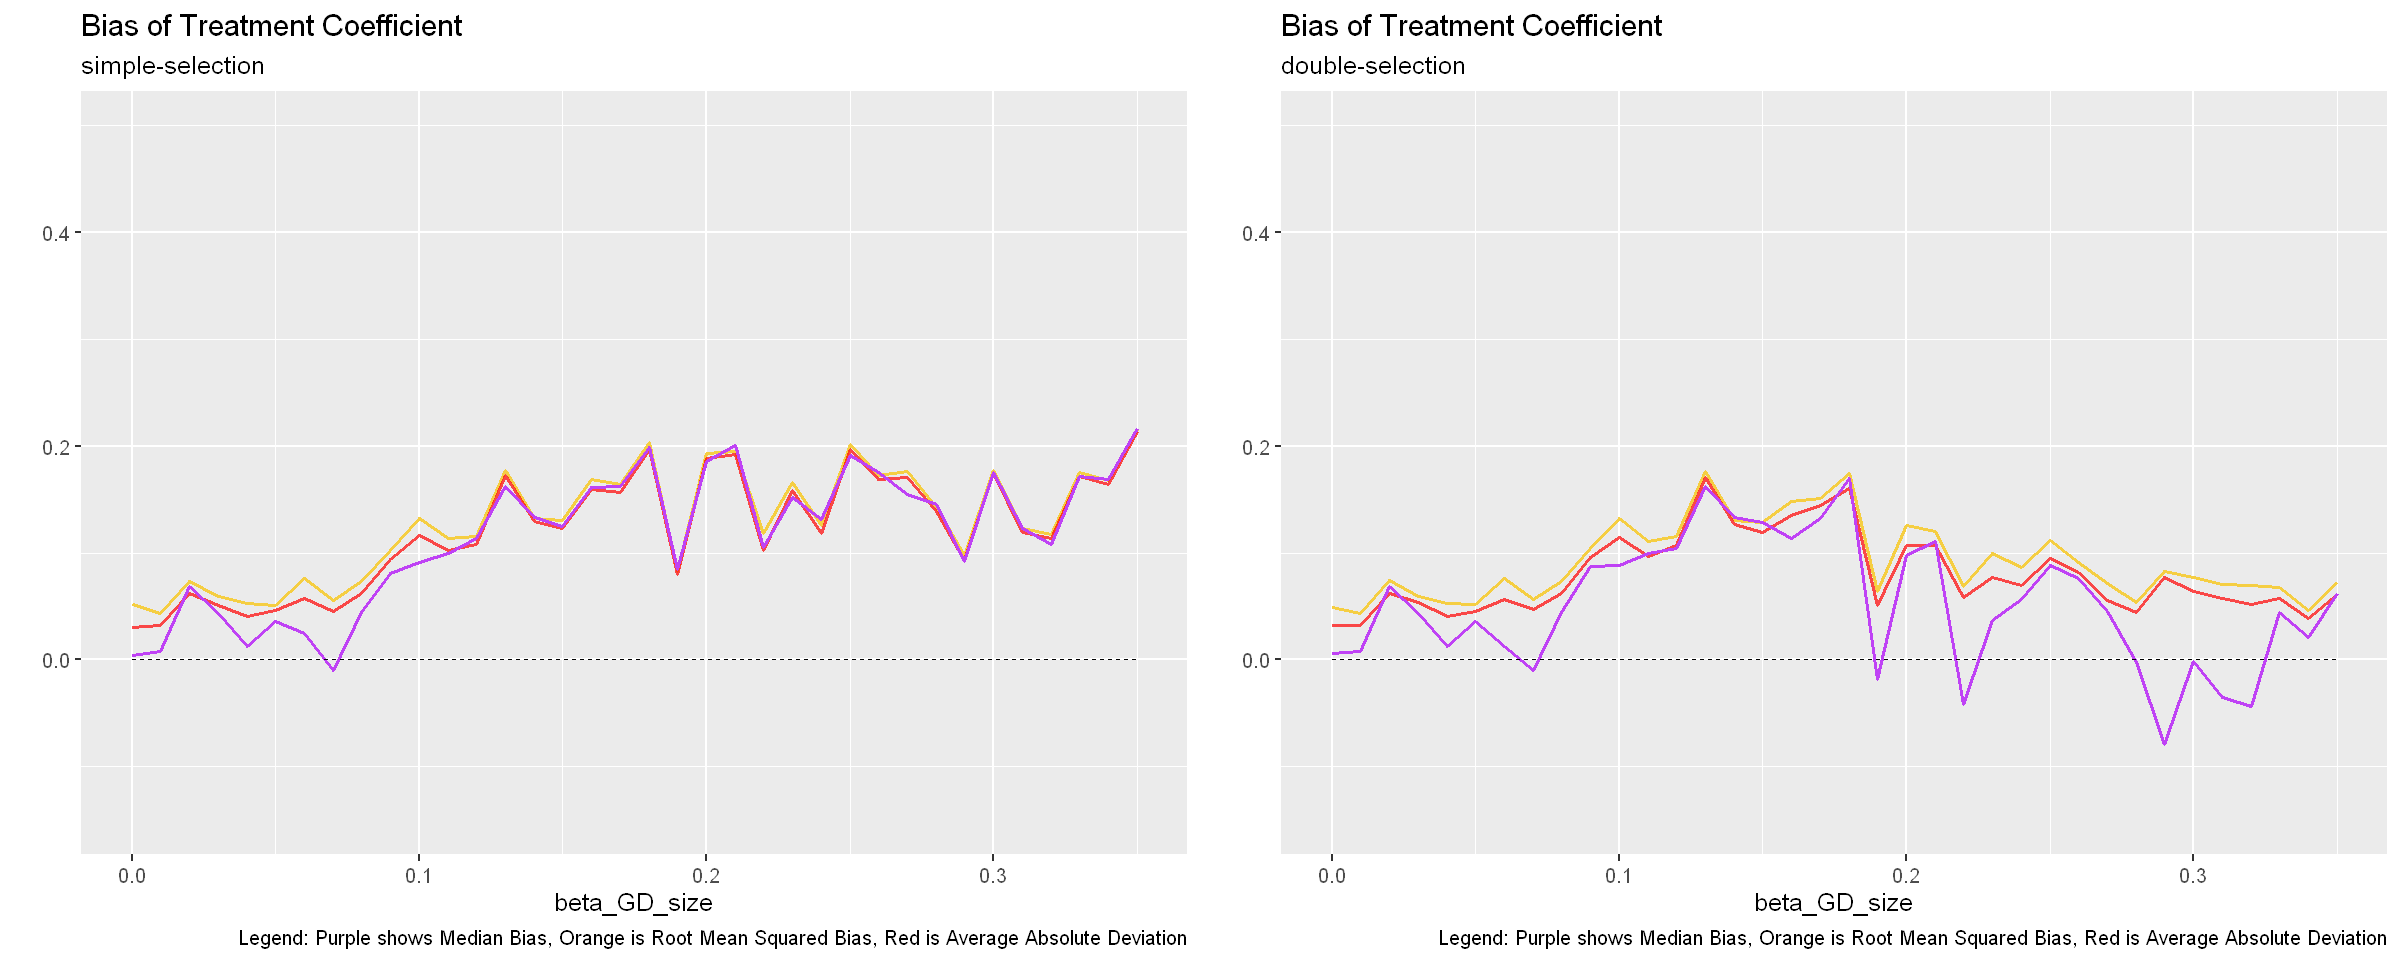

In [47]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

#### Vary Direct Effect Size of Confounders onto Treatment: $\gamma$ (beta_GD_size)

**Simulation Result** The expectations are mostly met. The selection behavior of simple LASSO is unaffected, and given the parametrization, most confounders are mistakenly excluded as indicated by the false-positive count (dark red) in the top-left plot. Consequently, confounding bias arises when the effect is not very close to zero. The bias increases for larger coefficient sizes as the confounding problem becomes more severe (bottom-left plot). All these simulation findings meet the expectations.

Plots on the right-hand-side show simulation results for the double selection method: the false-positive count (dark red) decreases as coefficents of confounders increase, confirming the expectation. The confounding bias arising from double-selected controls is close to zero when either the direct effect is very small ($<.08$) or very high ($>.2$), which is in line with the expectation. That is, first, for small coefficient sizes the confounding problem is not as severe, and second, for large values of the confounders' direct effect on the treatment most confounders are selected by double LASSO yielding the bias due to omitted confounders very small again. With a lot of good will, one can find a first increasing and then increasing pattern of the confounding bias for the double selection method (bottom-right plot). While the increase is driven by larger coefficient sizes yielding the confounding problem more severe; the decrease manifests itself due to more and more confounders being selected by double LASSO and controlled for in the final model. I expected that these two forces would be more pronounced. In any case, the double selection method seems to outperform the simple selection procedure in terms of selection of the true confounders, which yields weakly smaller confounding biases across the grid of $\gamma$ coefficients. 

<br>

<hr>
<br>

#### Vary Sparsity Among Confounders: $G$ (nonzero_controls)

**Expectation** For the simple selection method, which for the underlying DGP-a, failed to select the majority of confounders, I expect that increasing the number of confounders among all controls will lead to a steady uptake of the false-positive rate. Hence, the confounding bias should increase with increasing the number of controls which have a non-zero effect on both the treatment and the outcome. 

I expect that the double selection method will continue to select the majority of confounders correctly regardless the amount of non-zero controls (as long as $n > p$), leading to a very small confounding bias. Note that, there are 100 controls, and the amount of confounding factors is increased from zero to 100. 

<br>

In [48]:
# Simulation
iter_over <- "nonzero_controls"
sim_parameter_vec <- seq(from=0, to=100, by=10)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

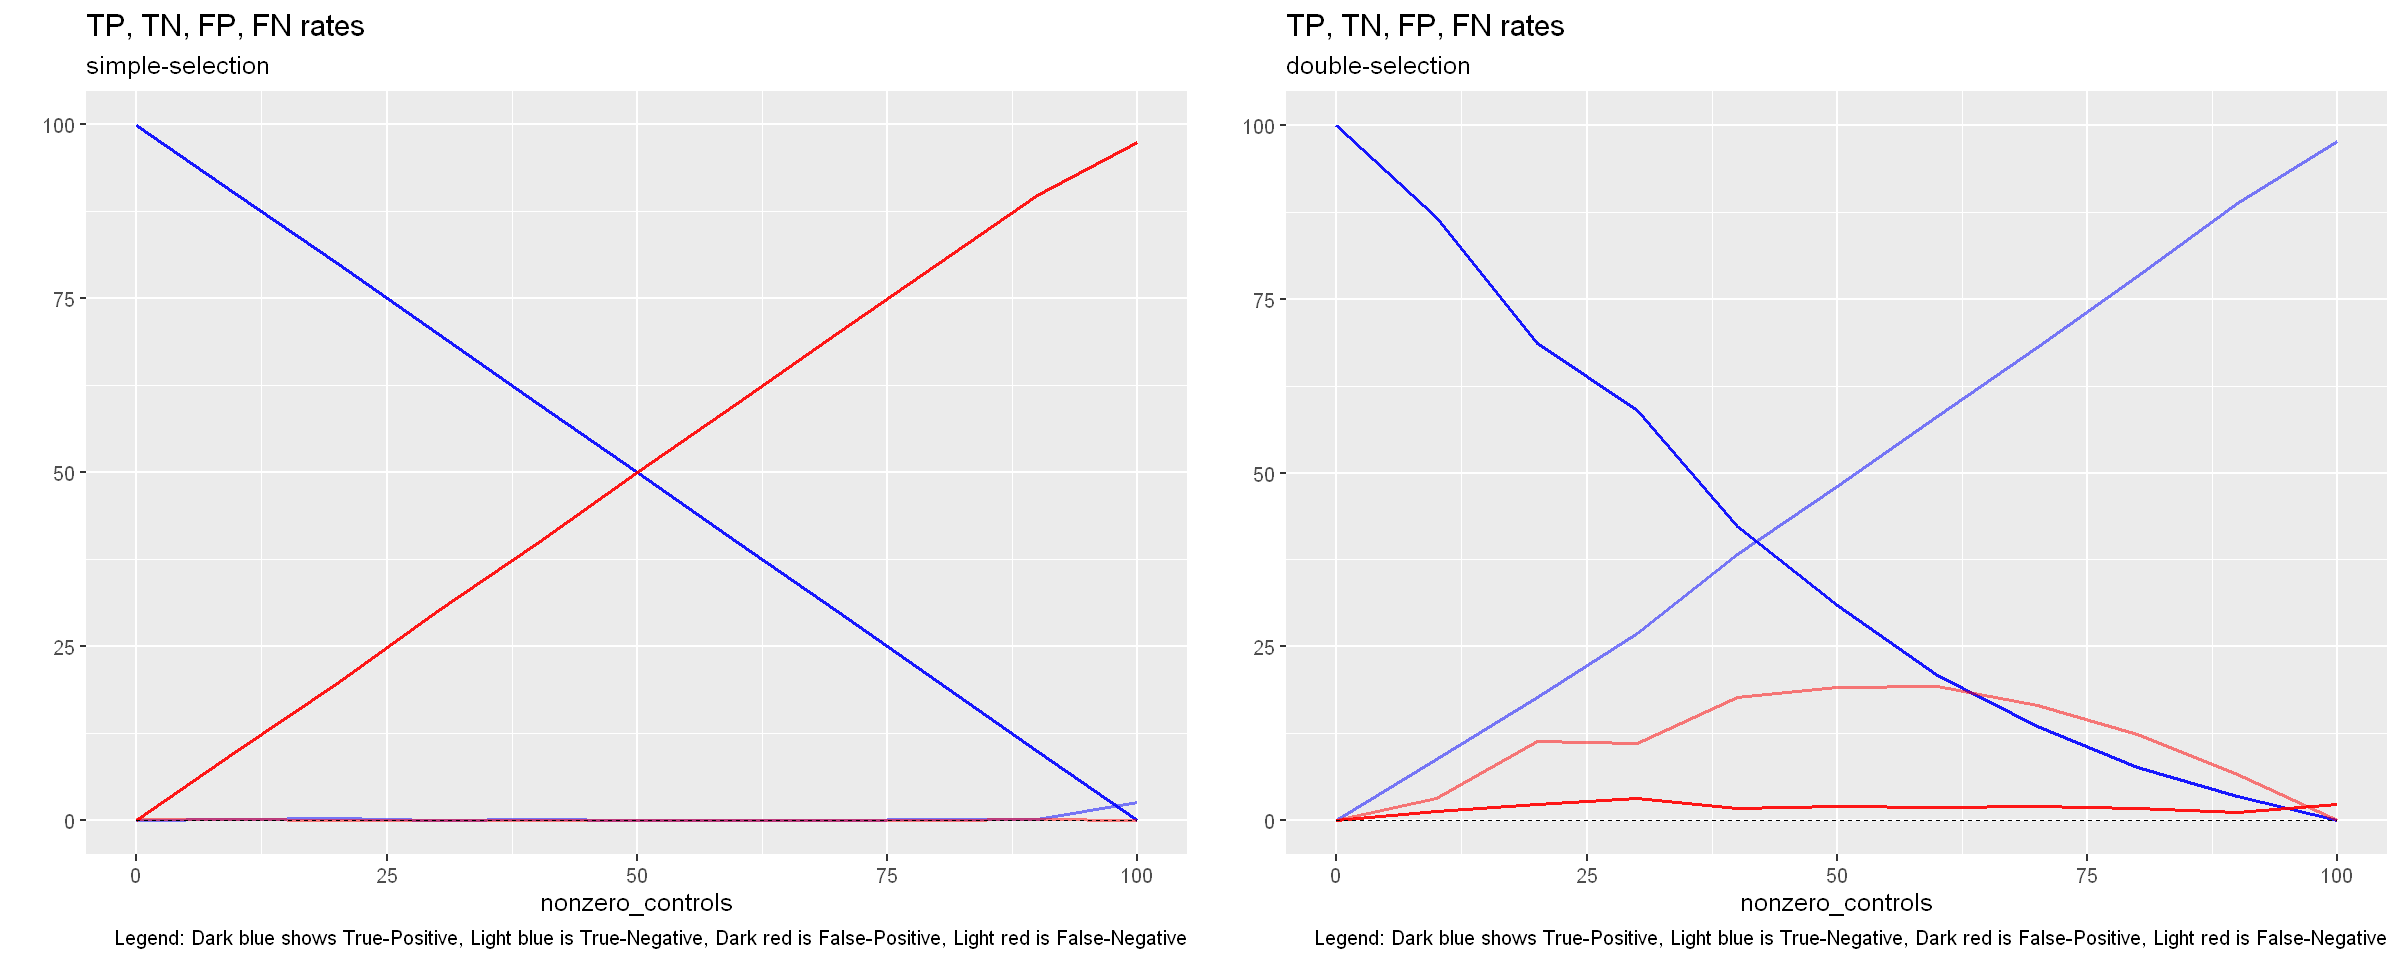

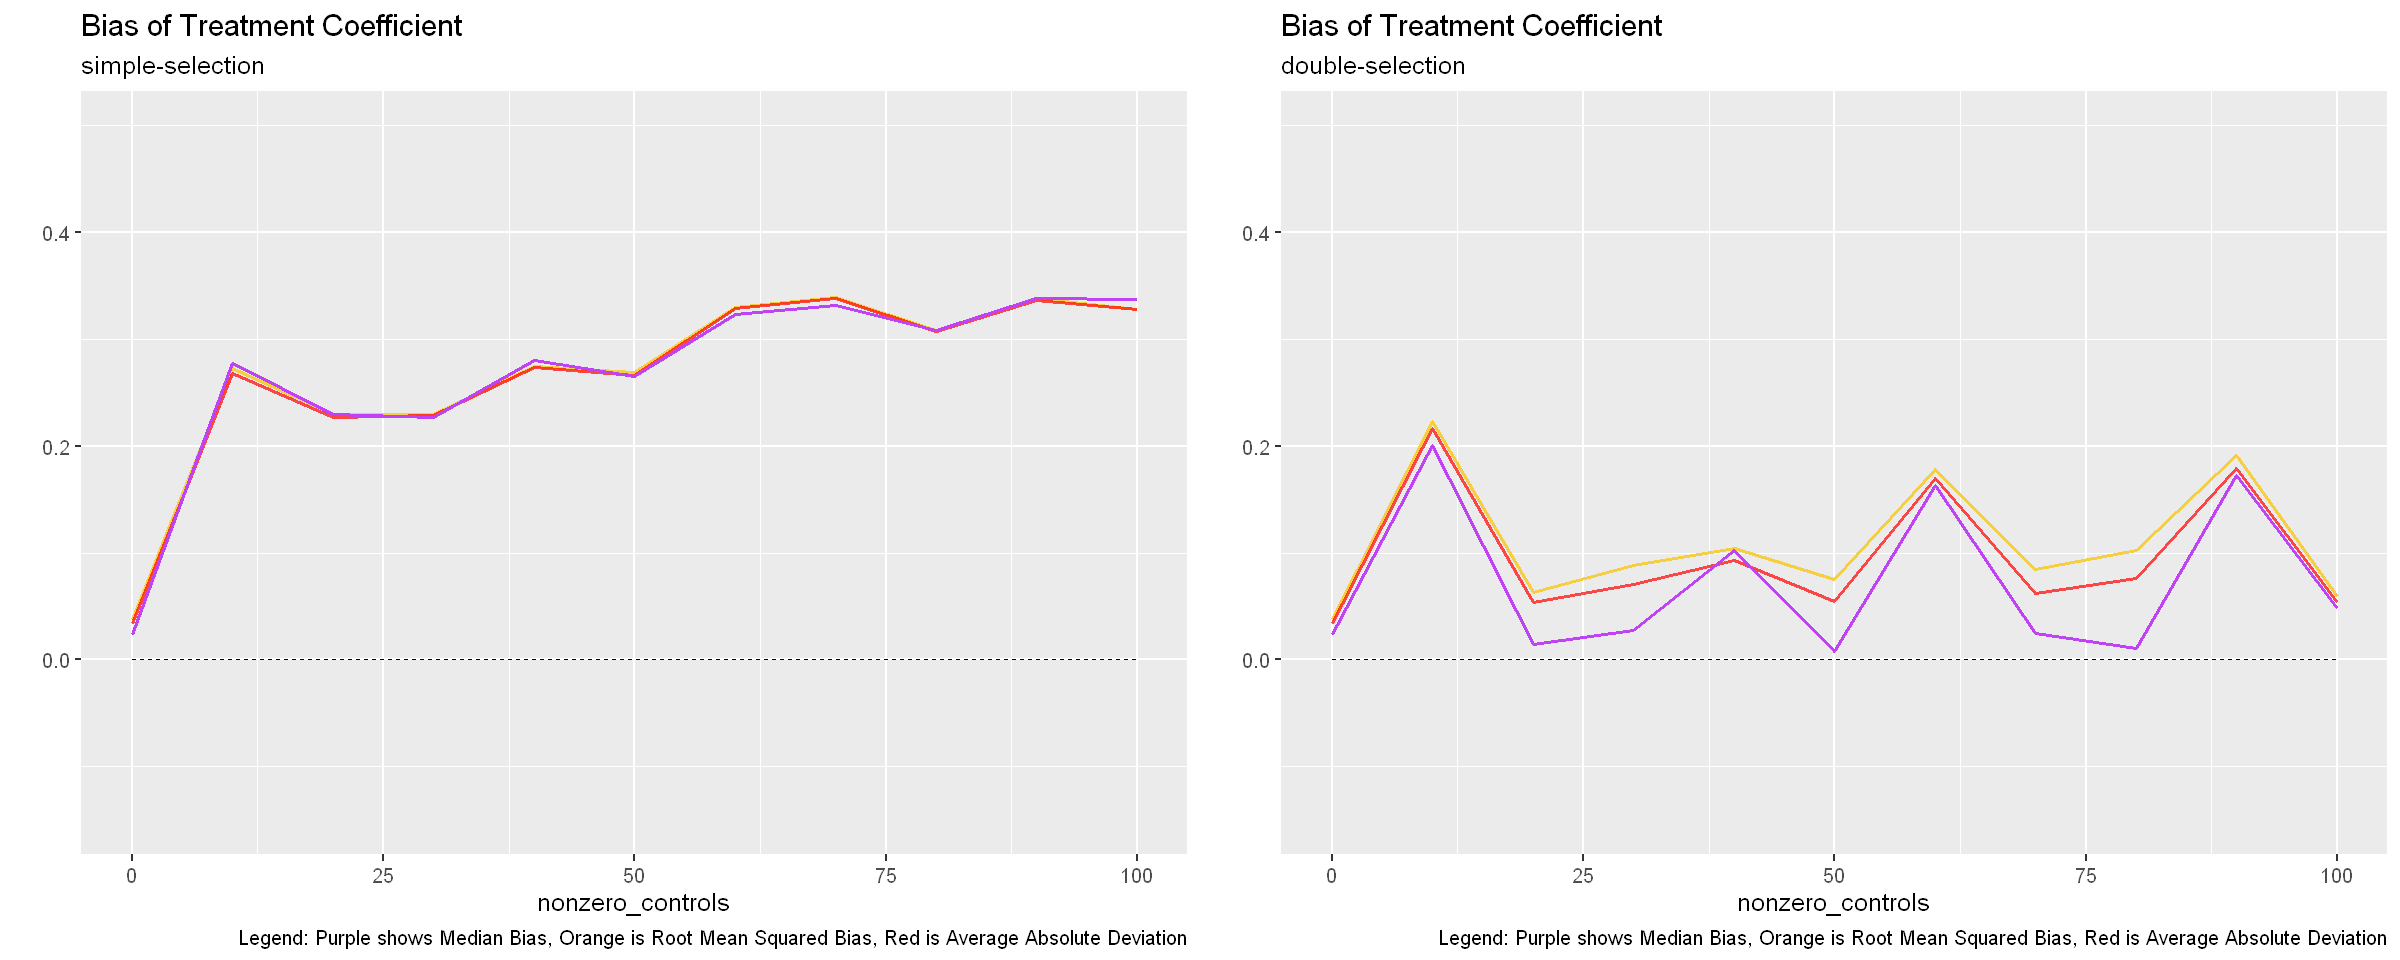

In [49]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

#### Vary Sparsity Among Confounders: $G$ (nonzero_controls)

**Simulation Result** In all, the expecations formulated above are met. For both simple and double selection procedures the true-positive count (dark blue in top-level plots) decreases. Naturally this is the case since less and less zero-effect controls exist which could be correctly excluded from the final model. Almost by the same amount that nonzero controls are added to the data-generating process, the simple selection method mistakenly excludes them, indicated by the almost straight dark red line in the top-left plot. Adding ever more confounders which are excluded by the simple selection method, let's the confounding bias increase. Interestingly, all bias metrics skyrocket for the first ten confounders, only to increase slighty for further confounders.

As expected, the double LASSO selected set of controls comprises the majority of confounders irrespective of the share of confounders among all controls. The confounding bias over the range of non-zero controls is smaller compared to the simple selection method; since not all confounders are truly identified (see false-positive count in top-right plot), there can be a small bias. However, it does not systematically vary with the amount of confounders among all controls available. [Note that the false-negative count is much larger for the double LASSO. This is observed throughout the simulation studies (give reason why again!!!); this increases variance of treatment effect estimate... since more zero effect controls are in the final model which might pick up spurious relationships in the data, which can affect the treatment effect estimate in finite samples][CHECK TODO]

<hr>
<br>

#### SANDBOX: Vary Treatment Coefficient Size: $\alpha$

**Expectation** Should not make a difference.

<hr>
<br>

#### SANDBOX: Vary Correlation Among Potential Confounders: $\alpha$

**Expectation**

In [34]:
# Setup
dgp <- "A"

R <- 10

n <- 400
n_G_attr <- 200
treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
nonzero_controls <- 10

In [ ]:
# Simulation
#iter_over <- "corr_confounders"
#sim_parameter_vec <- seq(from=0, to=.95, by=.05)

#plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
#                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
#                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
#                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

#p_variable_select_simple <- plots$p_variable_select_simple
#p_confounder_bias_simple <- plots$p_confounder_bias_simple
#p_variable_select_double <- plots$p_variable_select_double
#p_confounder_bias_double <- plots$p_confounder_bias_double

In [ ]:
#grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
#grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

## DGP-b

In [50]:
set.seed(12345)

In [51]:
# Setup : DGP-b
dgp <- "B"

R <- 15

n <- 400
n_F_attr <- 100
n_G_attr <- 100
n_H_attr <- 100

treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
beta_F_size <- .1
beta_H_size <- .1

nonzero_controls <- 10

In [52]:
# Sandbox
# Simulation
iter_over <- "beta_GY_size"
sim_parameter_vec <- seq(from=0, to=.5, by=.025)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

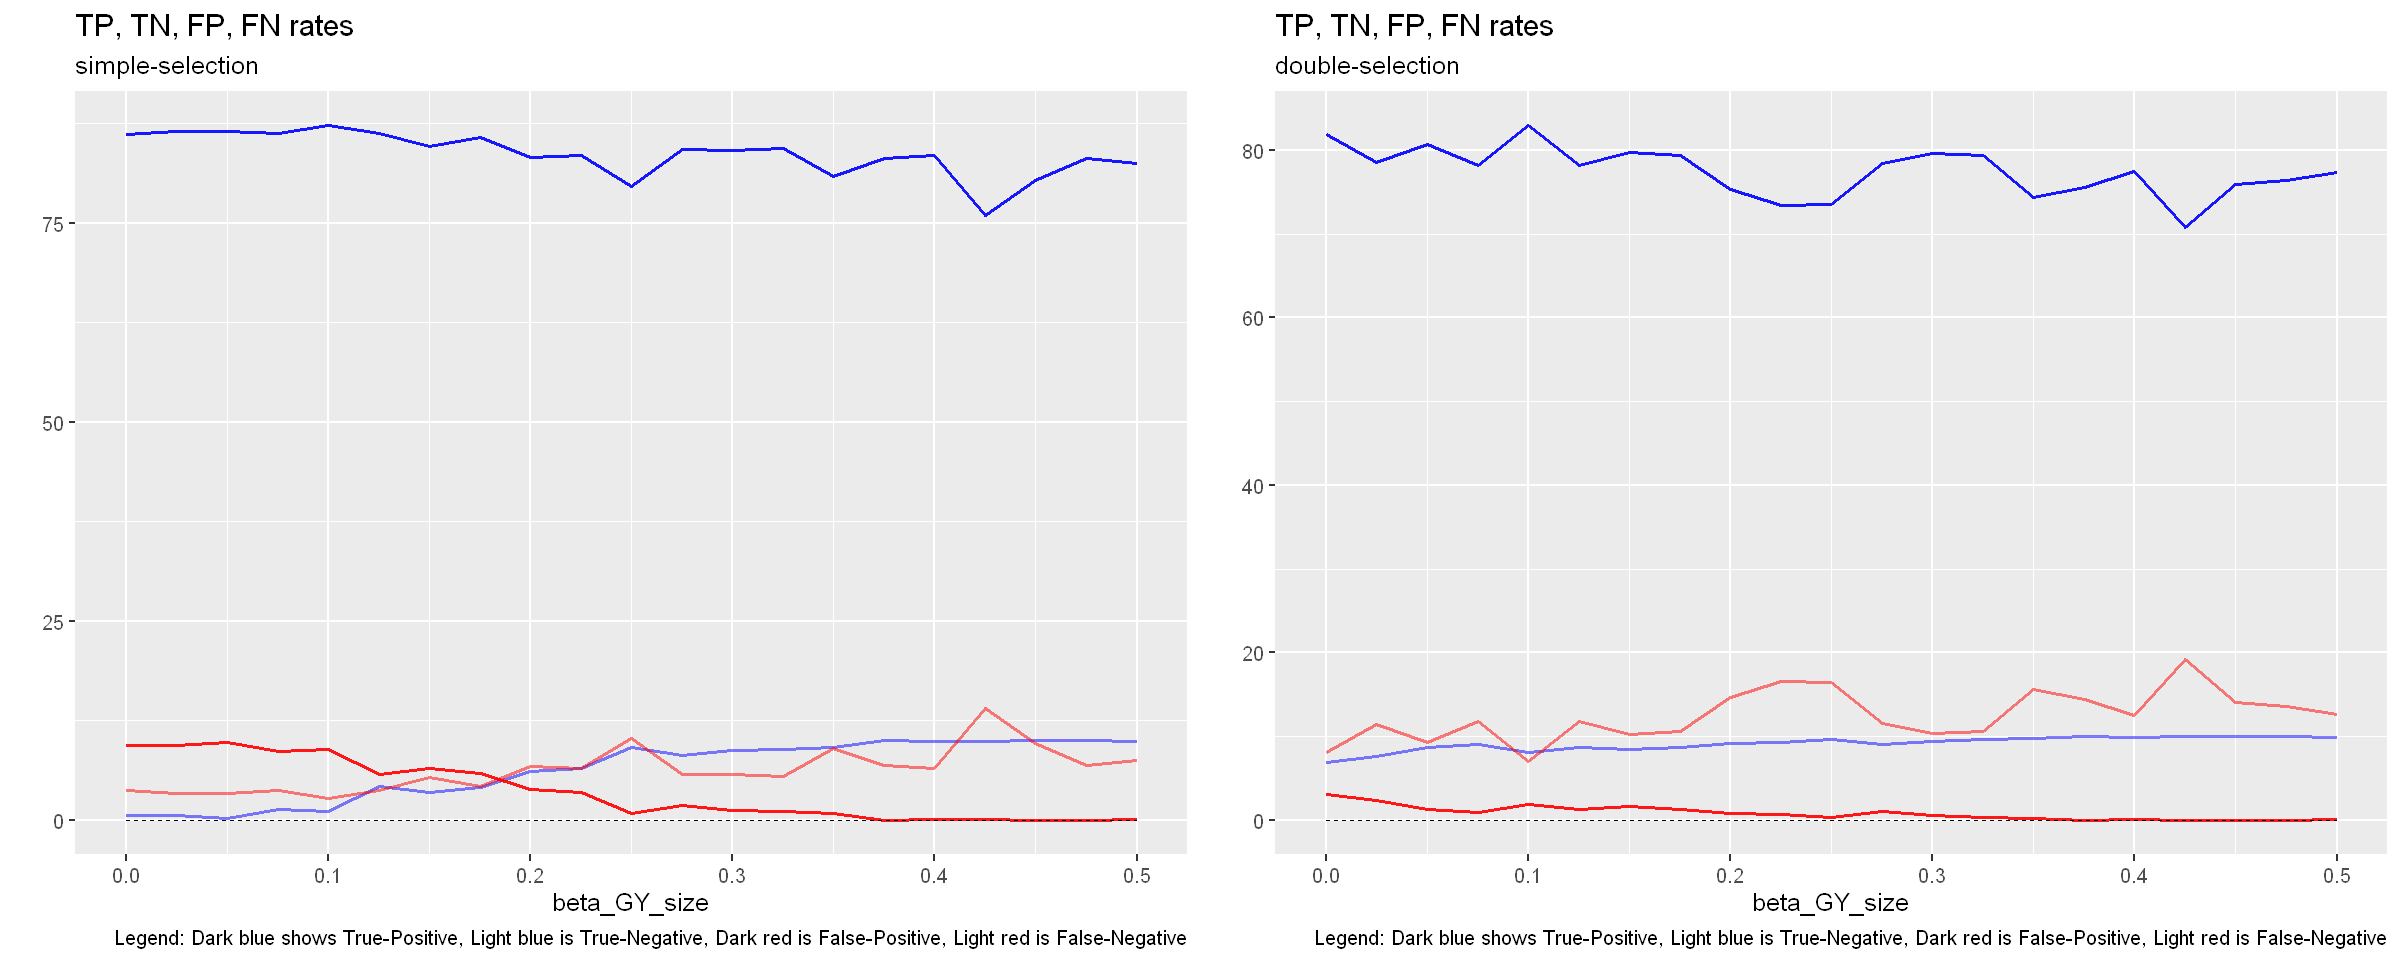

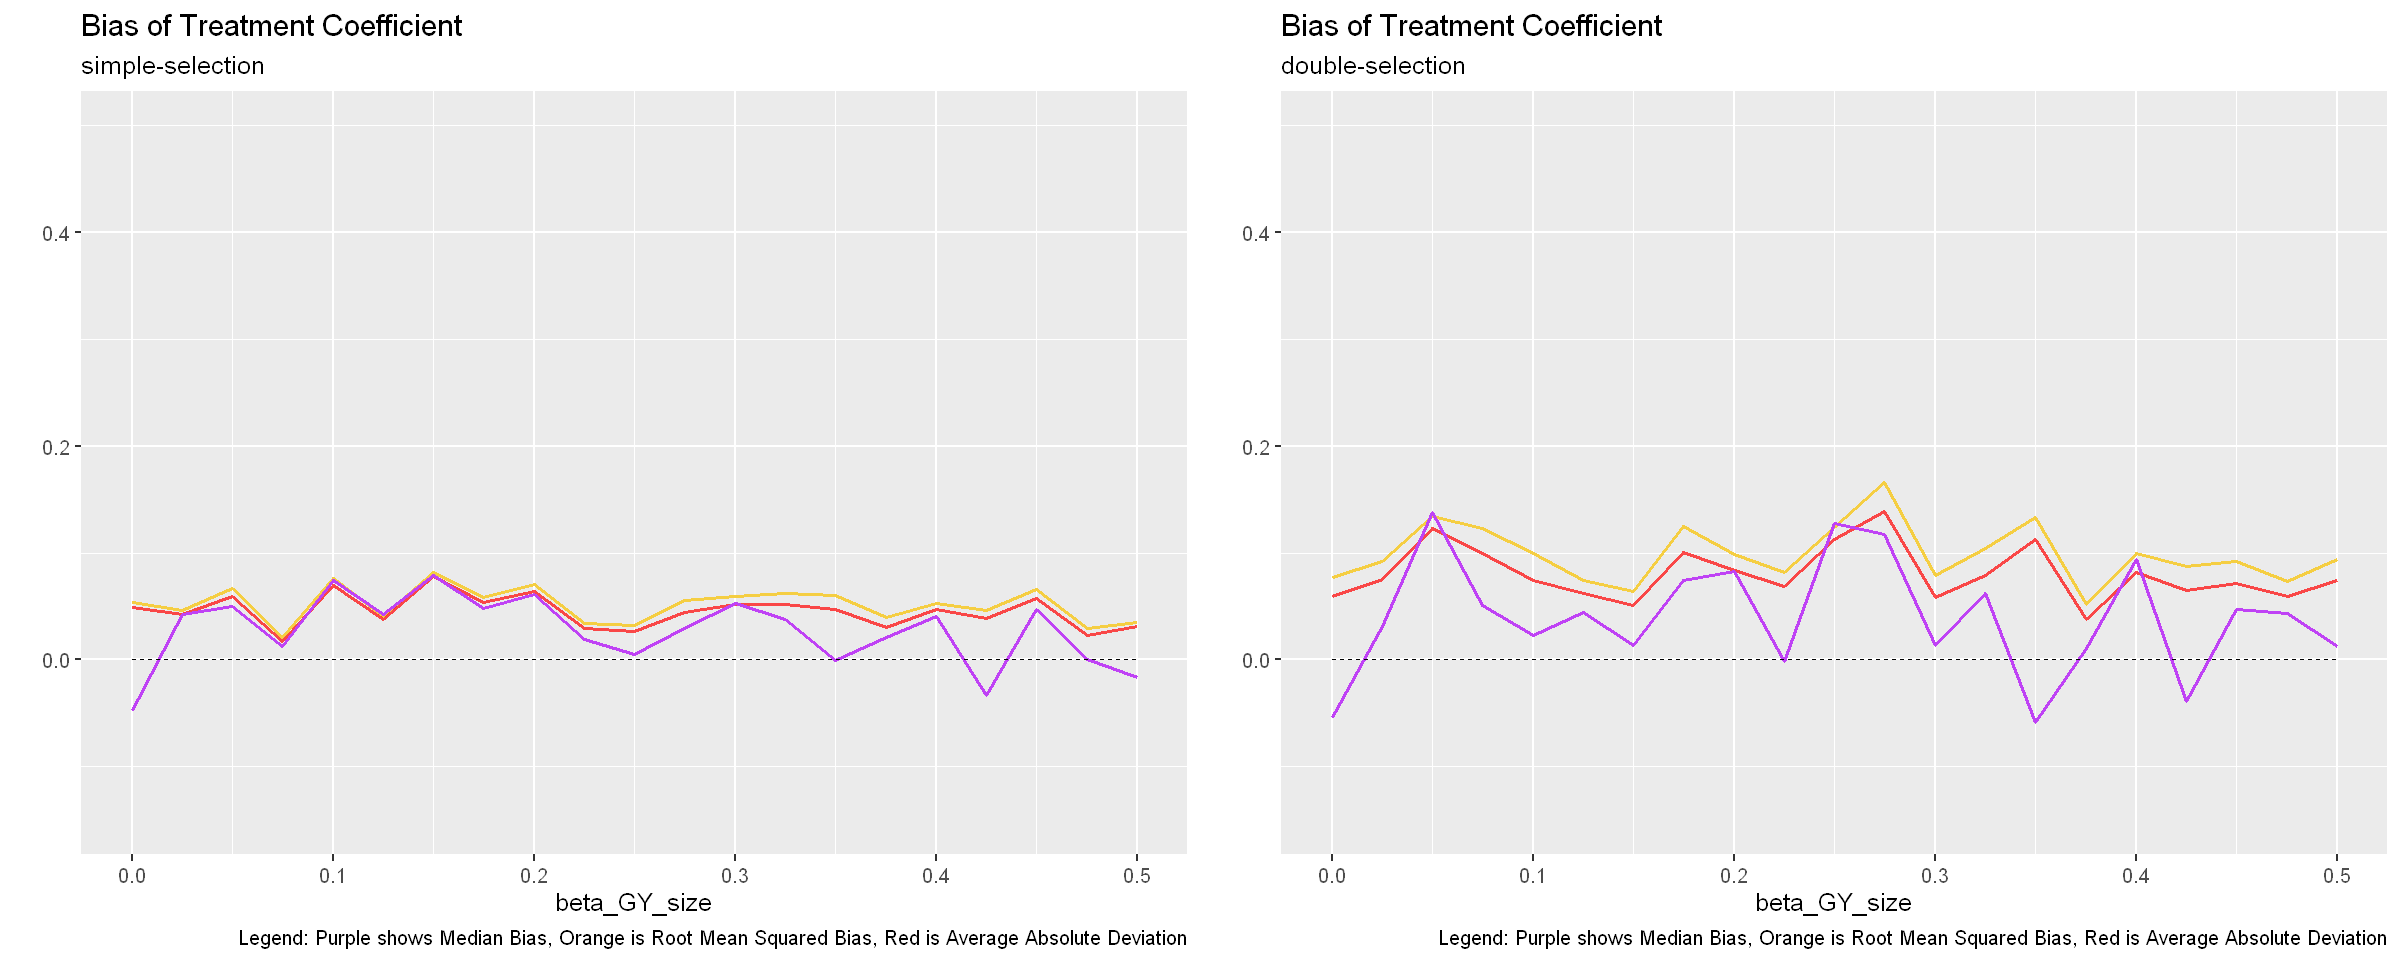

In [53]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

In [54]:
# Simulation
iter_over <- "beta_GD_size"
sim_parameter_vec <- seq(from=0, to=.5, by=.025)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

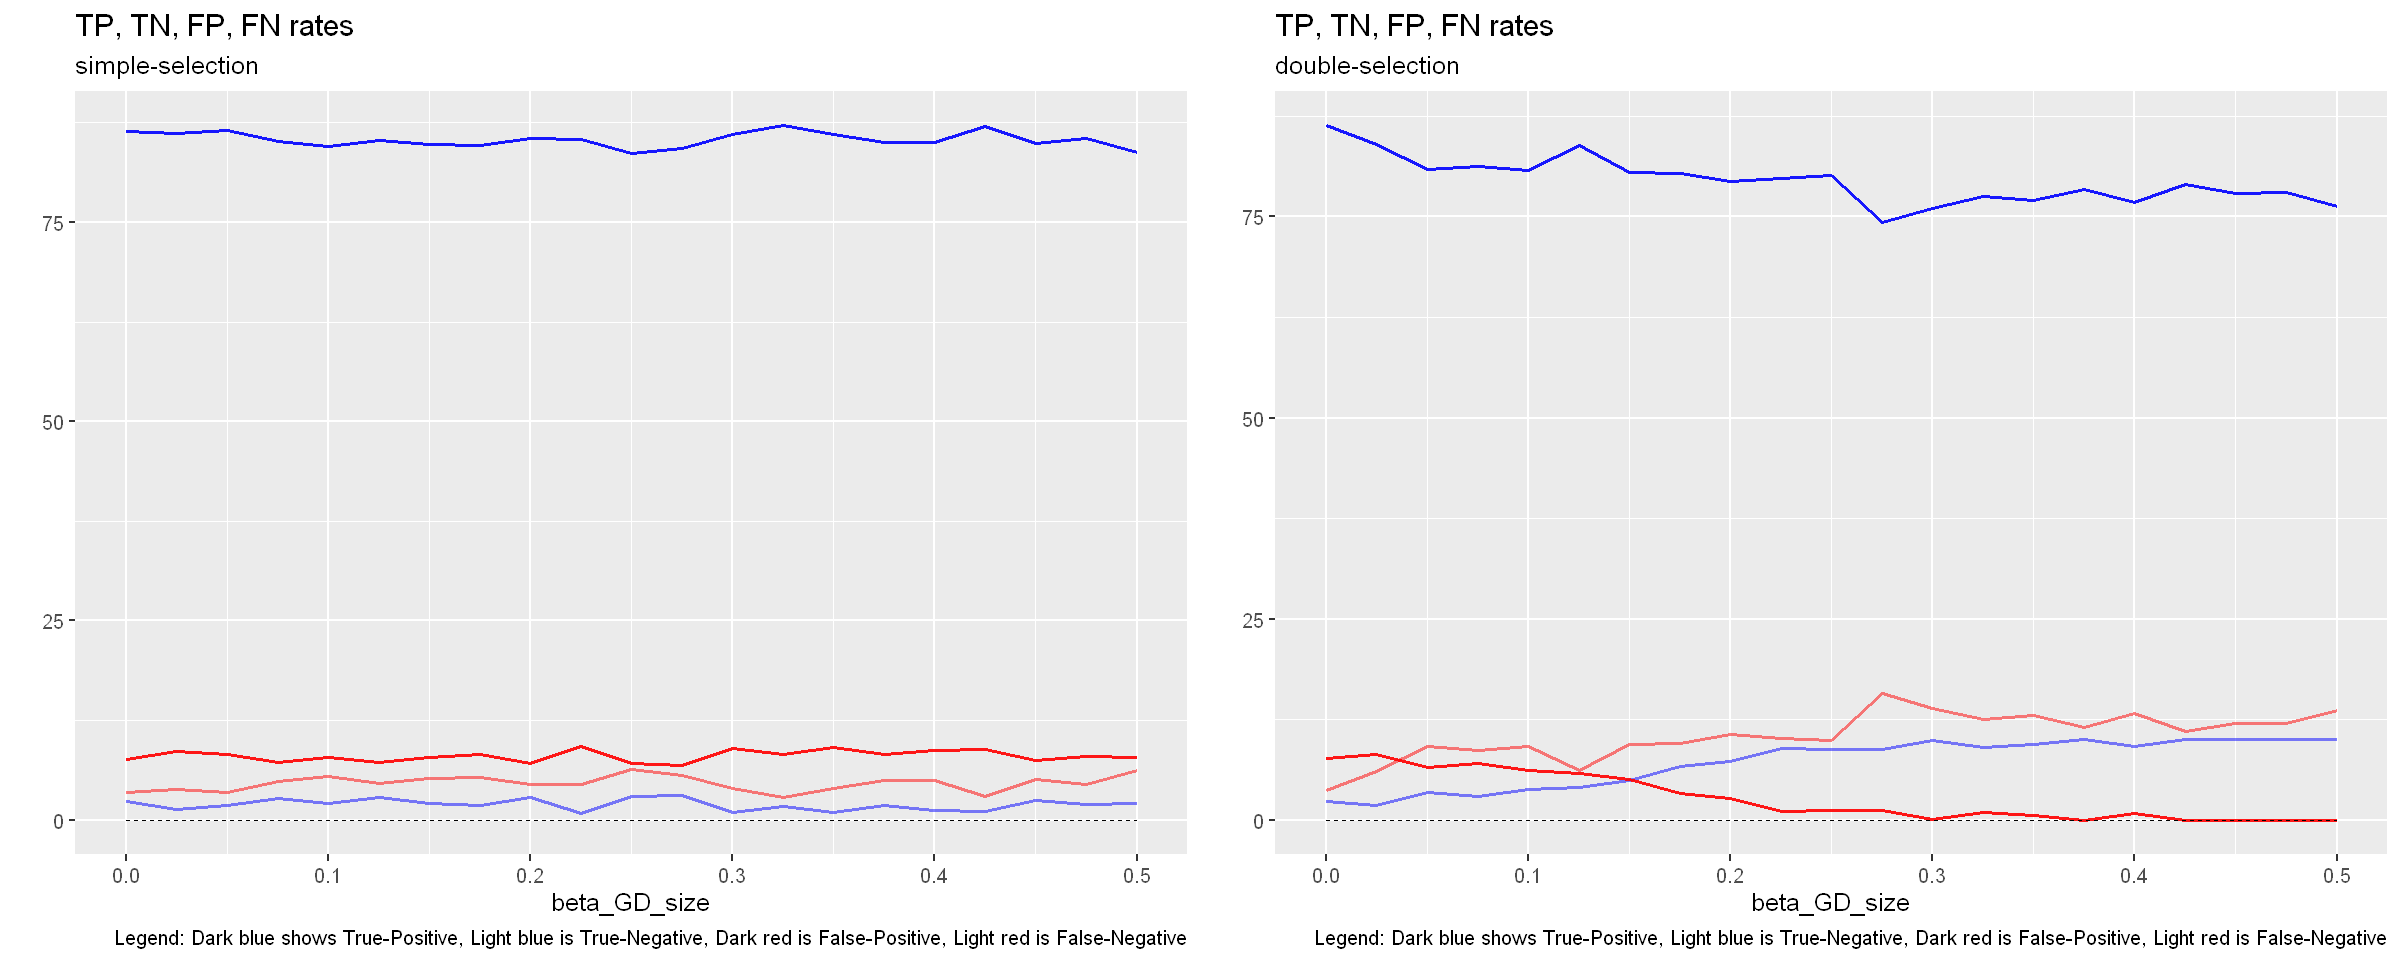

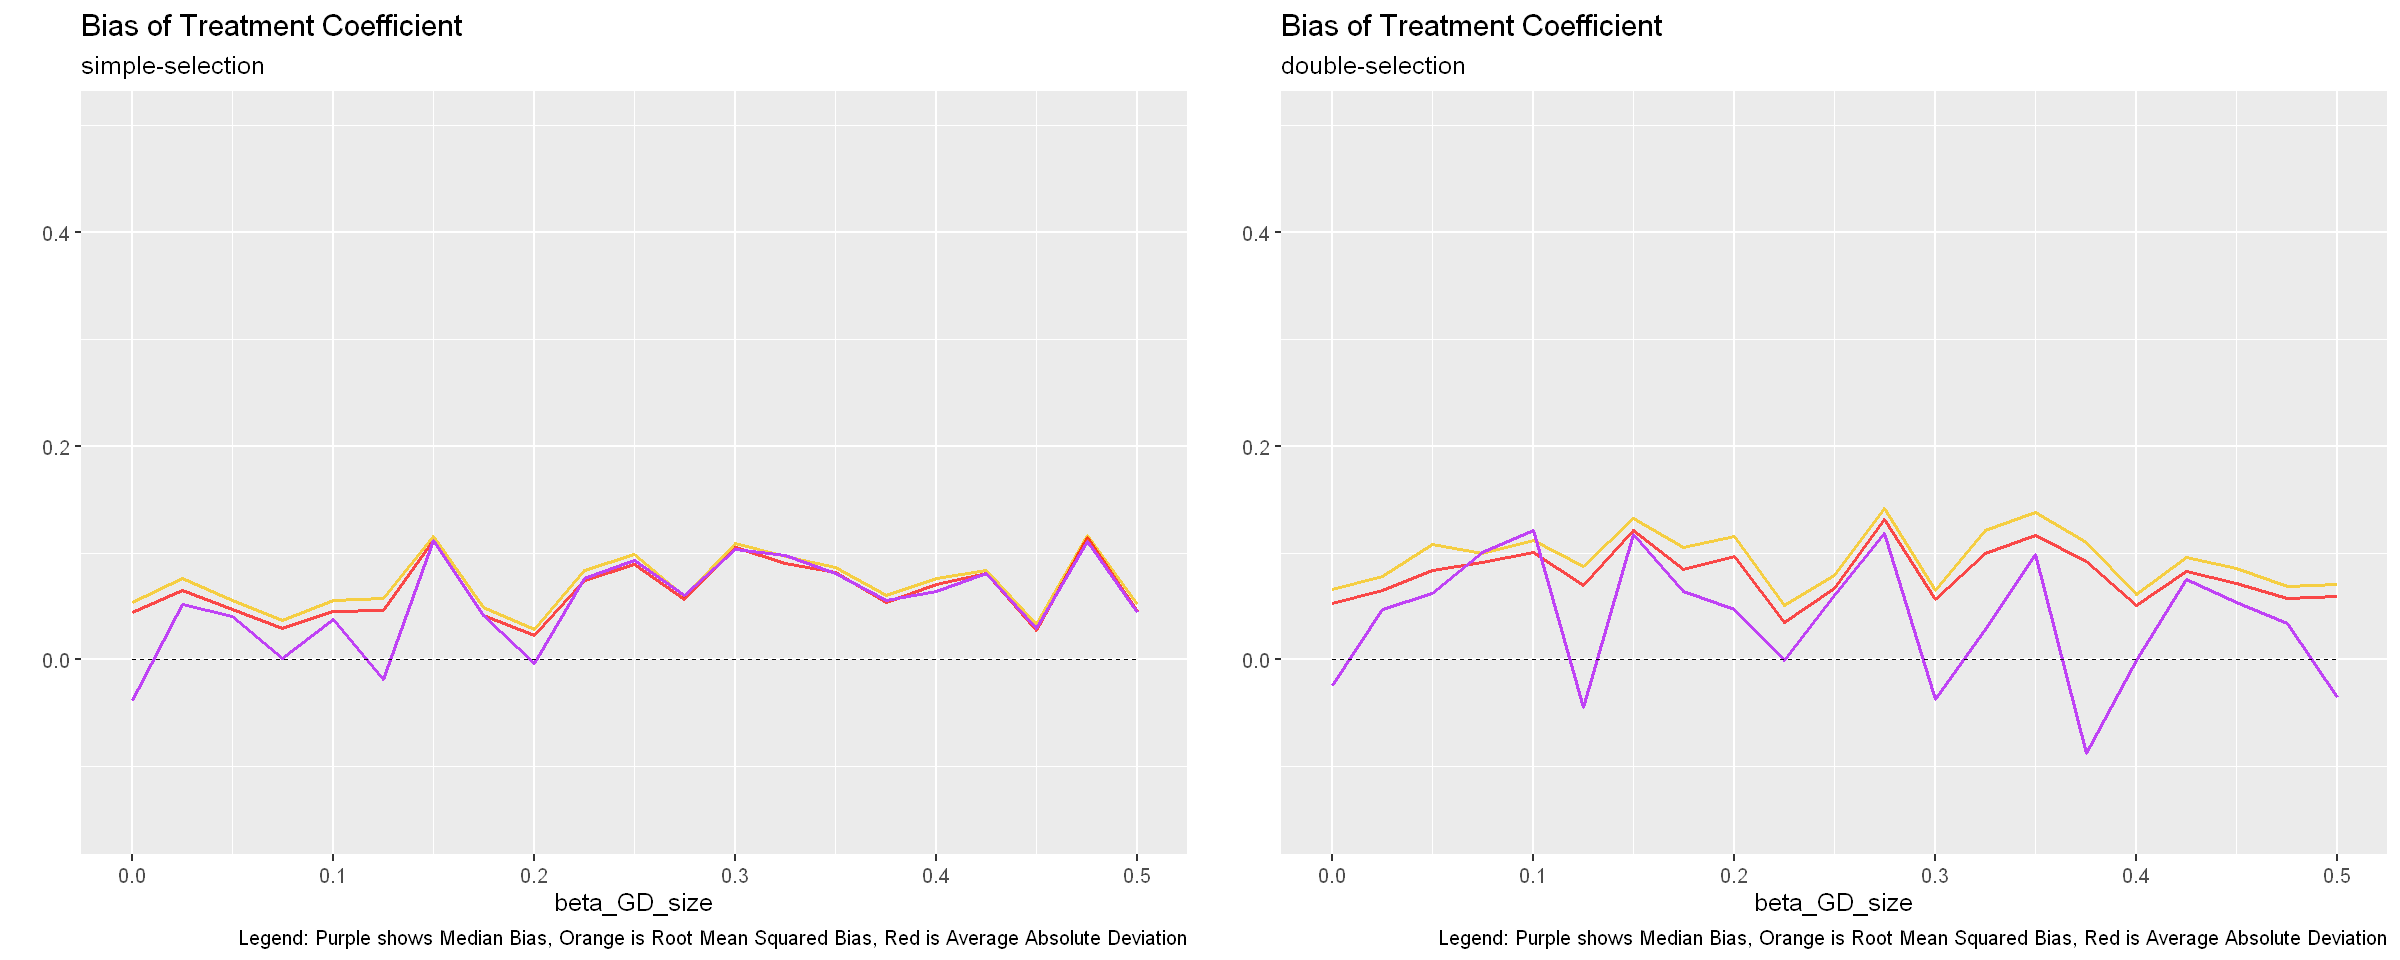

In [55]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

In [56]:
# Simulation
iter_over <- "nonzero_controls"
sim_parameter_vec <- seq(from=0, to=100, by=10)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

Warning message:
"Removed 7 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


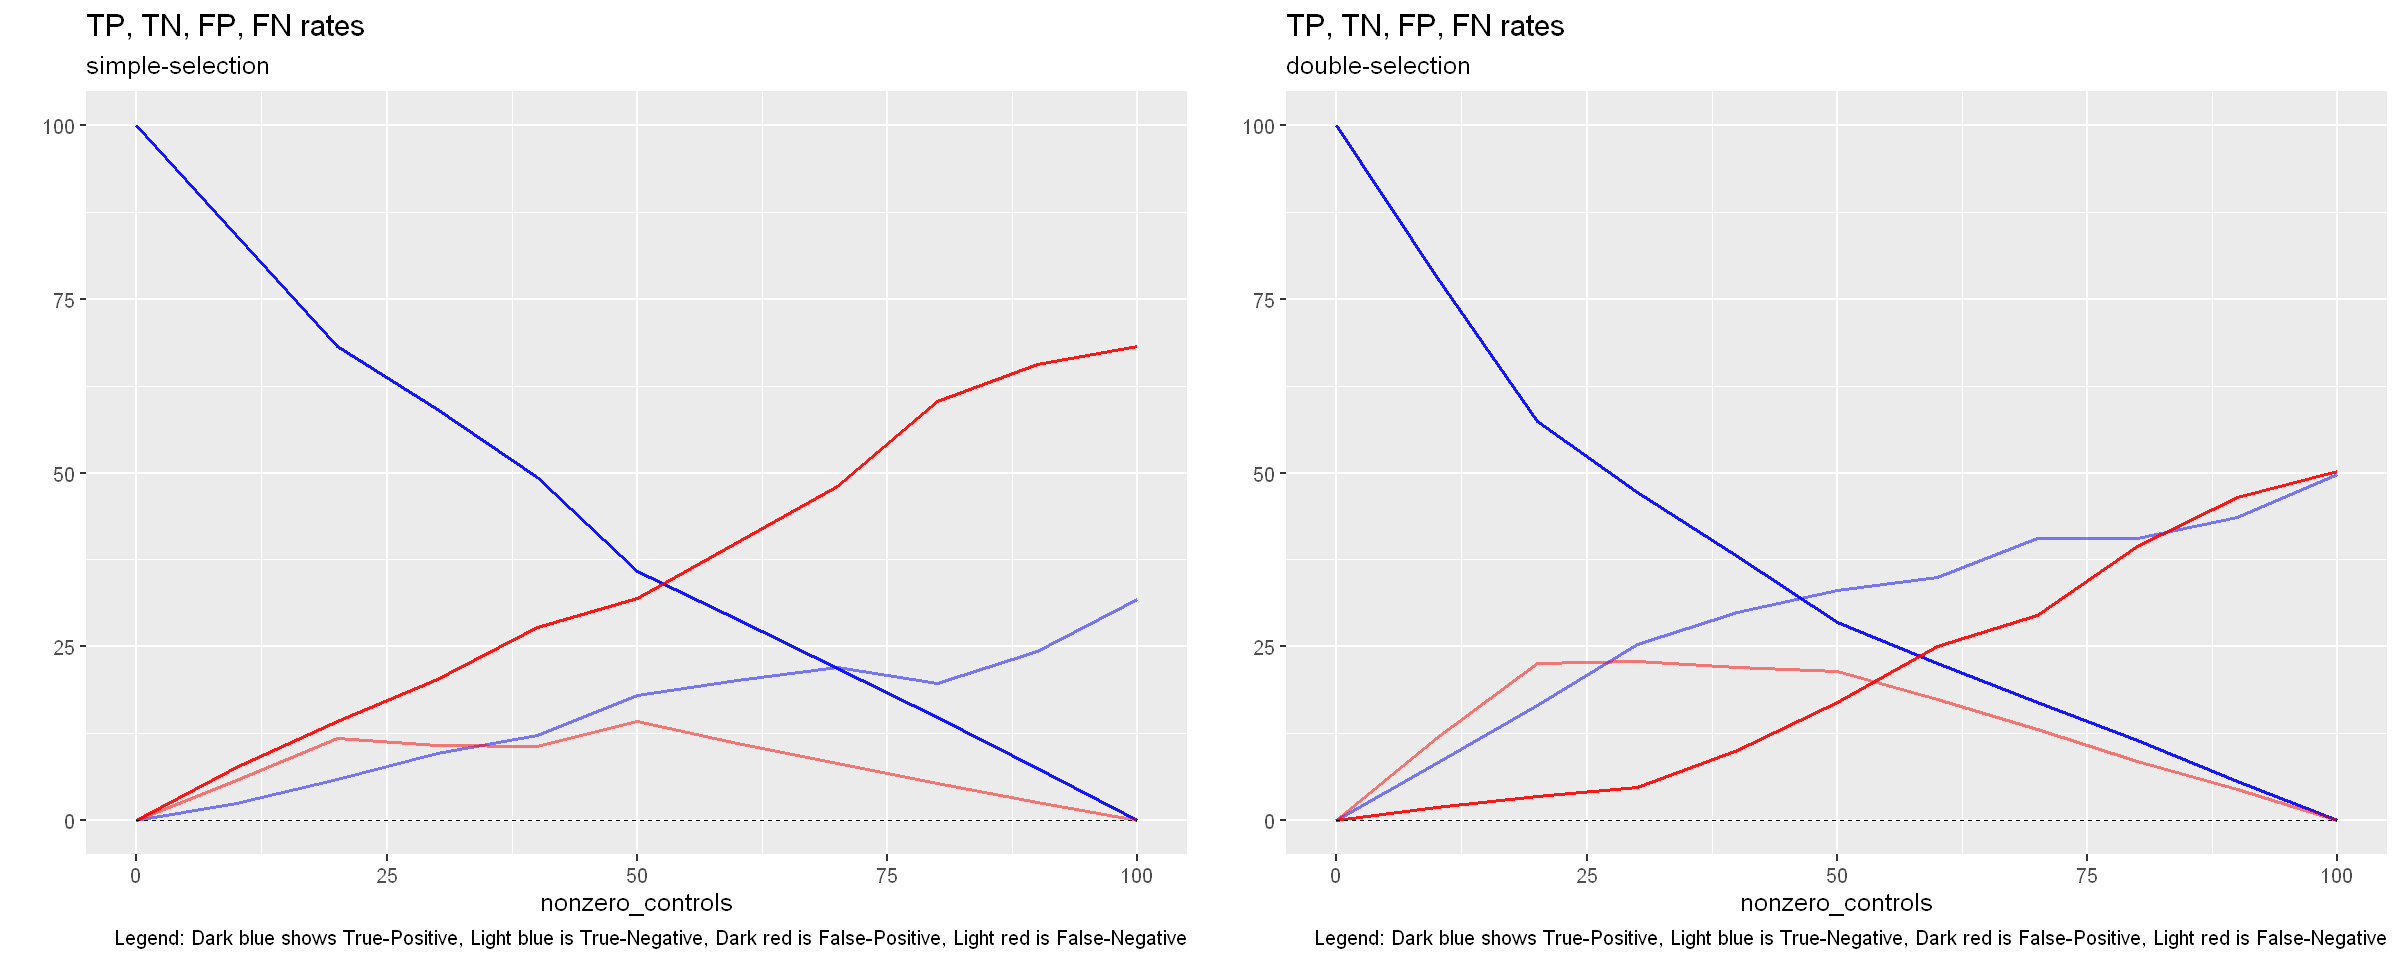

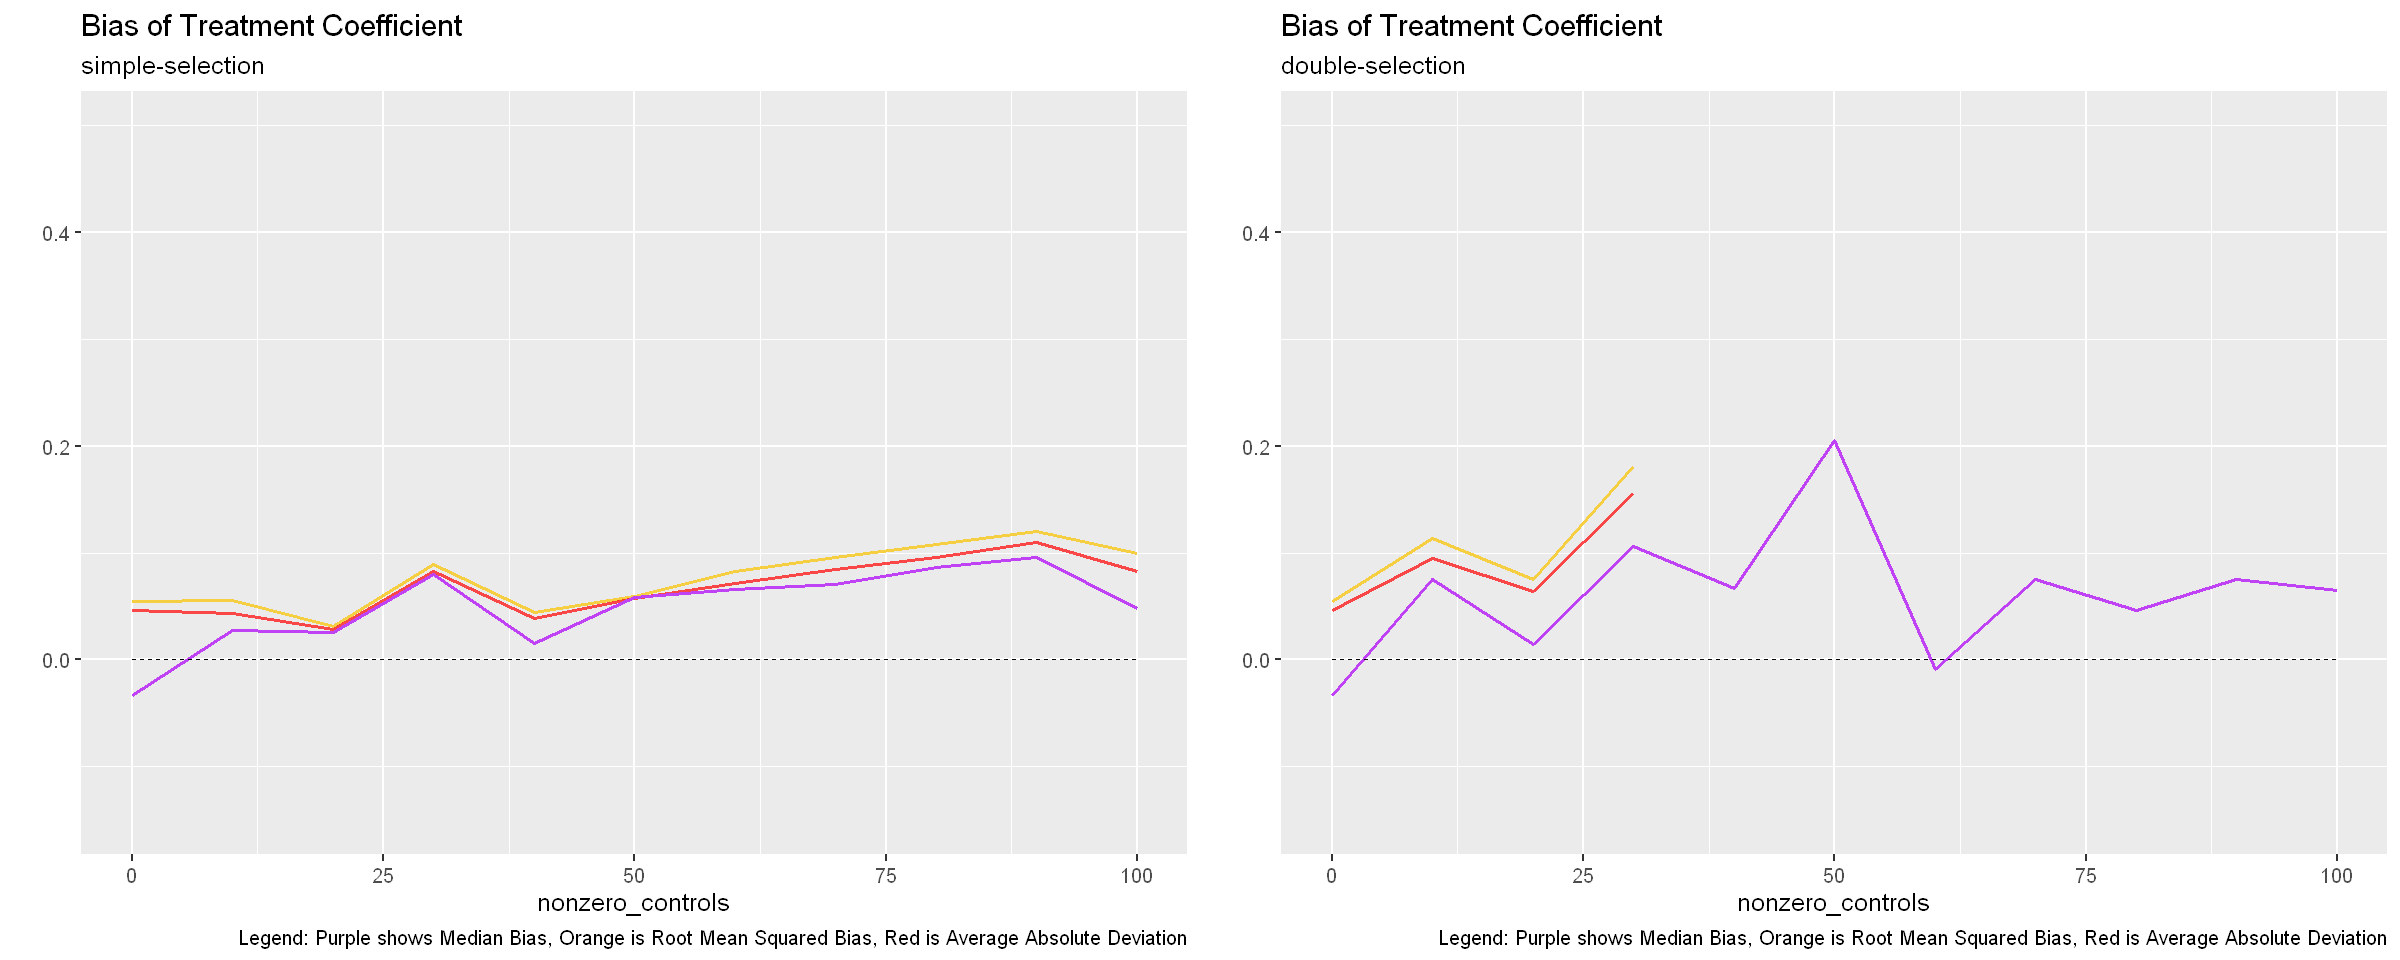

In [57]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

<hr>
<br>

#### SANDBOX: Vary Number of Available Features

**Expectation**

In [12]:
# Simulation
iter_over <- "beta_F_size"
sim_parameter_vec <- seq(from=0, to=4, by=.2)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

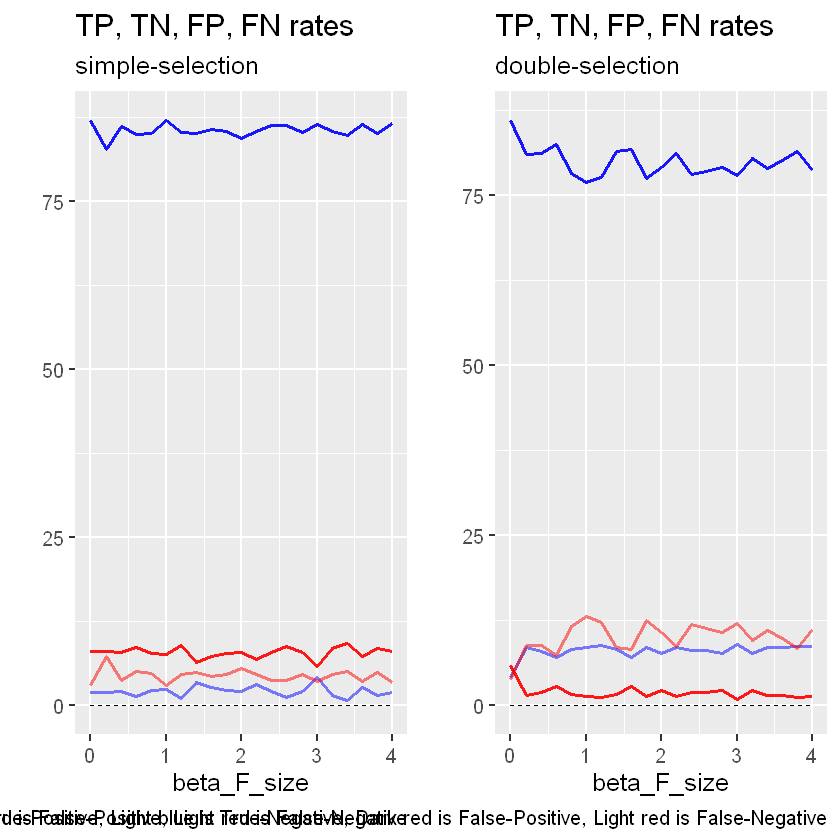

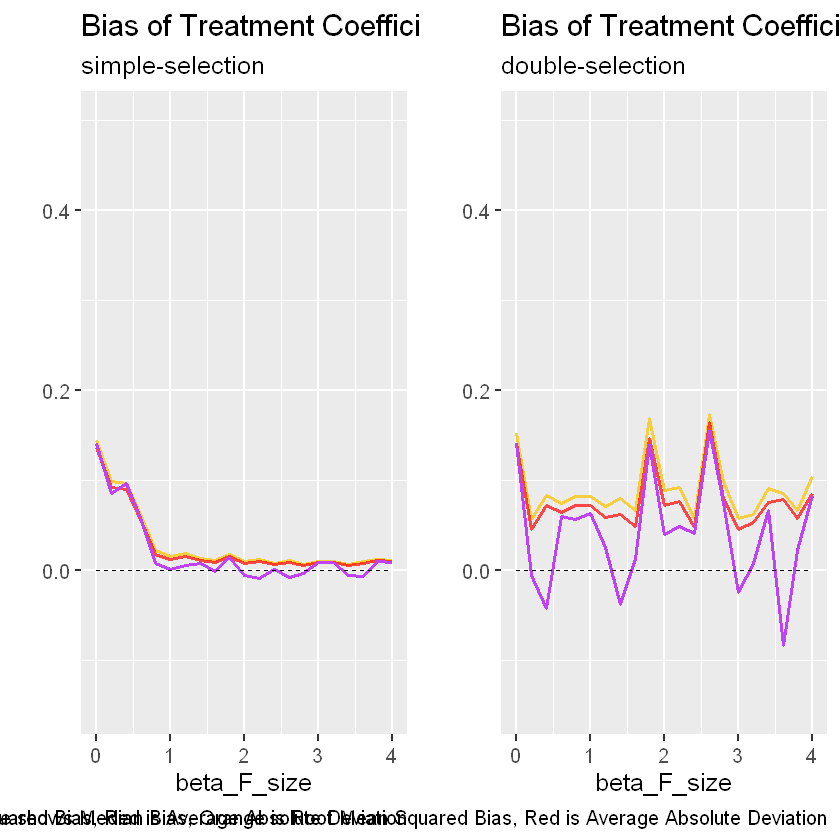

In [13]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

TODO : Vary n_H_attr and n_F_attr

# TODO : Too many variables excluded, use cv_lasso_oneDOLLARnzero to use this lambda with at least 10 variables ...

In [ ]:
# Setup : DGP-houseprices
dgp <- "houseprices"

R <- 10

n <- 400
n_F_attr <- 100
n_G_attr <- 100
n_H_attr <- 100

In [ ]:
# Sandbox
# Simulation
iter_over <- "beta_GY_size"
sim_parameter_vec <- seq(from=0, to=2, by=.1)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls)

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

In [ ]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

In [40]:
set.seed(12345)
# Setup
n <- 400
n_G_attr <- 20
n_H_attr <- 20

# Update column names for identifying regressors
colnames_confounders <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1))

colnames_covariates <- c(str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1)),
                         str_c(rep("H_", n_H_attr), seq(from=1, to=n_H_attr, by=1)))

colnumbers_covariates <- seq(from=1, to=(n_G_attr + n_H_attr), by=1)

# Draw dataset which is then split into training and test
data_set <- generate_data_houseprices(n=n,
                                      n_G_attr=n_G_attr,
                                      n_H_attr=n_H_attr)

data <- data_set$data
# Shuffle data before train-test-split to ensure no unintended structure exists
# due to the order of observations
random_rows <- sample(nrow(data))
data <- data[random_rows, ]

# Split data into training and test sets of equal size
data_train <- data[1:(dim(data)[1]/2), ]
data_test <- data[(dim(data)[1]/2+1):dim(data)[1], ]

y_train <- data_train$y
D_train <- data_train$D
# Assemble different regressor matrices
Z_train <- data.matrix(data_train[colnames_covariates])
X_train <- data.matrix(cbind(D_train, Z_train))



# Retrieve true covariate identifier
true_covariate_identifier <- data_set$true_covariate_identifier
names(true_covariate_identifier) <- colnames_covariates
true_covariate_identifier[true_covariate_identifier > 0] <- "n"
true_covariate_identifier[true_covariate_identifier != "n"] <- "p"

# Change column name to identify sparse covariates
colnames_two_effect <- str_c(colnames_covariates, true_covariate_identifier)
colnames_one_effect <- c("D", colnames_two_effect)

In [265]:
set.seed(12345)
# Setup
n <- 400
n_G_attr <- 40

# Update column names for identifying regressors
colnames_confounders <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1))
colnames_covariates <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1))

colnumbers_covariates <- seq(from=1, to=n_G_attr, by=1)

# Draw dataset which is then split into training and test
data_set <- generate_data_houseprices_dgp0(n=n, n_G_attr=n_G_attr)

data <- data_set$data
# Shuffle data before train-test-split to ensure no unintended structure exists
# due to the order of observations
random_rows <- sample(nrow(data))
data <- data[random_rows, ]

# Split data into training and test sets of equal size
data_train <- data[1:(dim(data)[1]/2), ]
data_test <- data[(dim(data)[1]/2+1):dim(data)[1], ]

y_train <- data_train$y
D_train <- data_train$D
# Assemble different regressor matrices
Z_train <- data.matrix(data_train[colnames_covariates])
X_train <- data.matrix(cbind(D_train, Z_train))



# Retrieve true covariate identifier
true_covariate_identifier <- data_set$true_covariate_identifier
names(true_covariate_identifier) <- colnames_covariates
true_covariate_identifier[true_covariate_identifier > 0] <- "n"
true_covariate_identifier[true_covariate_identifier != "n"] <- "p"

# Change column name to identify sparse covariates
colnames_two_effect <- str_c(colnames_covariates, true_covariate_identifier)
colnames_one_effect <- c("D", colnames_two_effect)

In [266]:
# Variable selection in "first" and "second" stage

# Grid of lasso penalties
lambda_grid <- seq(0, 1, by=.02)
lambda_grid <- seq(0, 3000, by=1)

# 1. Use Lasso to shrink/select covariates given their association with outcome Y
lasso_one <- glmnet(X_train, y_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# 2. Use Lasso to shrink/select covariates given their association with tratment D
lasso_two <- glmnet(Z_train, D_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# Extract estimates from both models
beta_hats_lasso_one <- t(matrix(coef(lasso_one, s=lambda_grid)[-1,], nrow=dim(X_train)[2], ncol=length(lambda_grid)))
beta_hats_lasso_two <- t(matrix(coef(lasso_two, s=lambda_grid)[-1,], nrow=dim(Z_train)[2], ncol=length(lambda_grid)))


# MSE-optimal penalty term for lasso
lasso_one_cv <- cv.glmnet(X_train, y_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_one <- lasso_one_cv$lambda.min

lasso_two_cv <- cv.glmnet(Z_train, D_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_two <- lasso_two_cv$lambda.min

# 1.
df <- data.frame(cbind(beta_hats_lasso_one, lambda_grid))
names(df) <- colnames_one_effect
p1 <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_one, figure_name="Figure 4.1", title="LASSO regression of y on X")

# 2.
df <- data.frame(cbind(beta_hats_lasso_two, lambda_grid))
names(df) <- colnames_two_effect
p2 <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_two, title="LASSO regression of D on X")

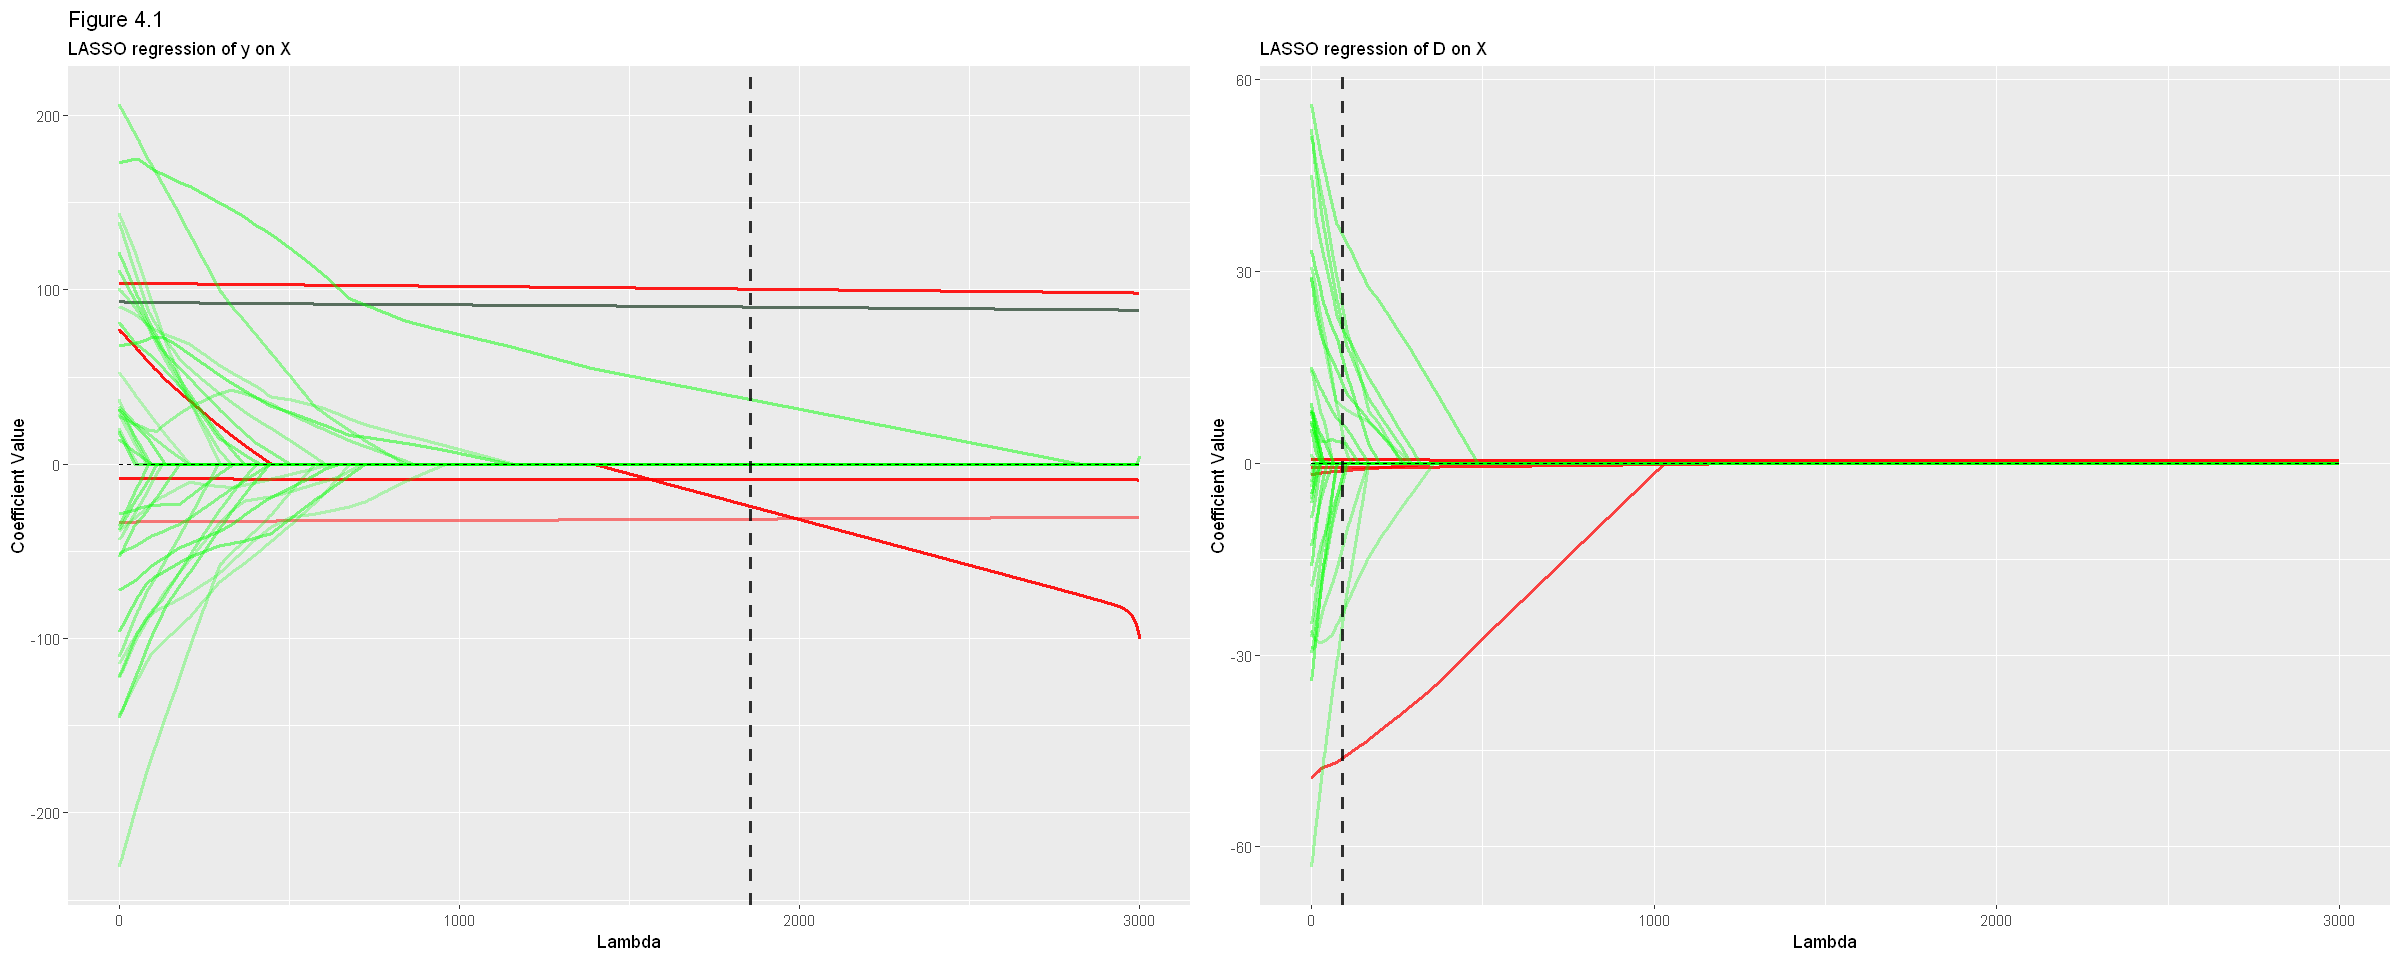

In [267]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(p1, p2, nrow=1)

In [ ]:
plots <- produce_bias_hist(dgp="houseprices", R=R, n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                           treatment_effect=treatment_effect, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, beta_F_size=beta_F_size, beta_H_size=beta_H_size,
                           nonzero_controls=nonzero_controls)

hist_simple <- plots$hist_simple
hist_double <- plots$hist_double

Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


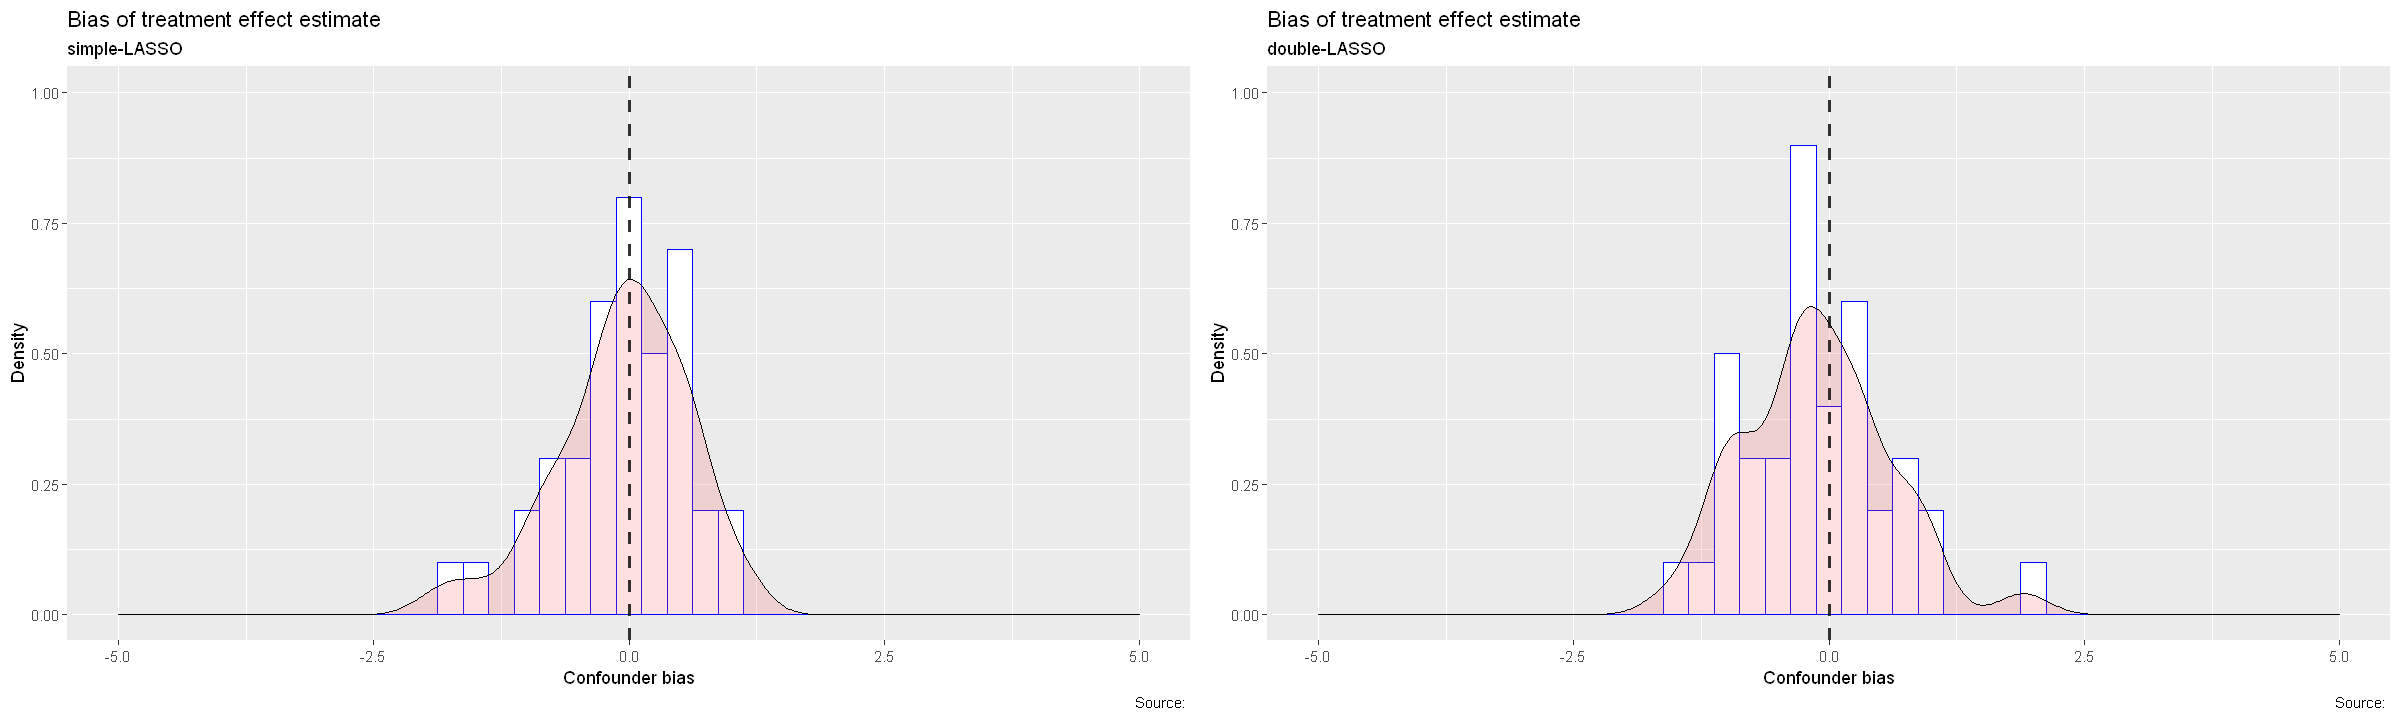

In [274]:
options(repr.plot.width=20, repr.plot.height=6)
grid.arrange(hist_simple, hist_double, nrow=1)

<hr>



#### DGP-b with F and H

In [32]:
set.seed(12345)
# Setup
n <- 400
n_G_attr <- 40
n_H_attr <- 50
n_F_attr <- 30

corr_G <- 0

# Update column names for identifying regressors
colnames_confounders <- str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1))
colnames_covariates <- c(str_c(rep("G_", n_G_attr), seq(from=1, to=n_G_attr, by=1)),
                         str_c(rep("H_", n_H_attr), seq(from=1, to=n_H_attr, by=1)),
                         str_c(rep("F_", n_F_attr), seq(from=1, to=n_F_attr, by=1)))

colnumbers_covariates <- seq(from=1, to=n_G_attr, by=1)

# Draw dataset which is then split into training and test
data_set <- generate_data_houseprices(n=, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=50, corr_G=corr_G)

data <- data_set$data
# Shuffle data before train-test-split to ensure no unintended structure exists
# due to the order of observations
random_rows <- sample(nrow(data))
data <- data[random_rows, ]

# Split data into training and test sets of equal size
data_train <- data[1:(dim(data)[1]/2), ]
data_test <- data[(dim(data)[1]/2+1):dim(data)[1], ]

y_train <- data_train$y
D_train <- data_train$D
# Assemble different regressor matrices
Z_train <- data.matrix(data_train[colnames_covariates])
X_train <- data.matrix(cbind(D_train, Z_train))



# Retrieve true covariate identifier
true_covariate_identifier <- data_set$true_covariate_identifier
names(true_covariate_identifier) <- colnames_covariates
true_covariate_identifier[true_covariate_identifier > 0] <- "n"
true_covariate_identifier[true_covariate_identifier != "n"] <- "p"

# Change column name to identify sparse covariates
colnames_two_effect <- str_c(colnames_covariates, true_covariate_identifier)
colnames_one_effect <- c("D", colnames_two_effect)

In [33]:
# Variable selection in "first" and "second" stage

# Grid of lasso penalties
lambda_grid <- seq(0, 1, by=.02)
lambda_grid <- seq(0, 10000, by=10)

# 1. Use Lasso to shrink/select covariates given their association with outcome Y
lasso_one <- glmnet(X_train, y_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# 2. Use Lasso to shrink/select covariates given their association with tratment D
lasso_two <- glmnet(Z_train, D_train, alpha=1, lambda=lambda_grid, intercept=FALSE)

# Extract estimates from both models
beta_hats_lasso_one <- t(matrix(coef(lasso_one, s=lambda_grid)[-1,], nrow=dim(X_train)[2], ncol=length(lambda_grid)))
beta_hats_lasso_two <- t(matrix(coef(lasso_two, s=lambda_grid)[-1,], nrow=dim(Z_train)[2], ncol=length(lambda_grid)))


# MSE-optimal penalty term for lasso
lasso_one_cv <- cv.glmnet(X_train, y_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_one <- lasso_one_cv$lambda.min

lasso_two_cv <- cv.glmnet(Z_train, D_train, alpha=1, intercept=FALSE,
                          type.measure="mse", nfolds=10)
lambda_min_two <- lasso_two_cv$lambda.min

# 1.
df <- data.frame(cbind(beta_hats_lasso_one, lambda_grid))
names(df) <- colnames_one_effect
p1 <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_one, figure_name="Figure 4.1", title="LASSO regression of y on X")

# 2.
df <- data.frame(cbind(beta_hats_lasso_two, lambda_grid))
names(df) <- colnames_two_effect
p2 <- lasso_coef_shrink_plot(df=df, lambda_min=lambda_min_two, title="LASSO regression of D on X")

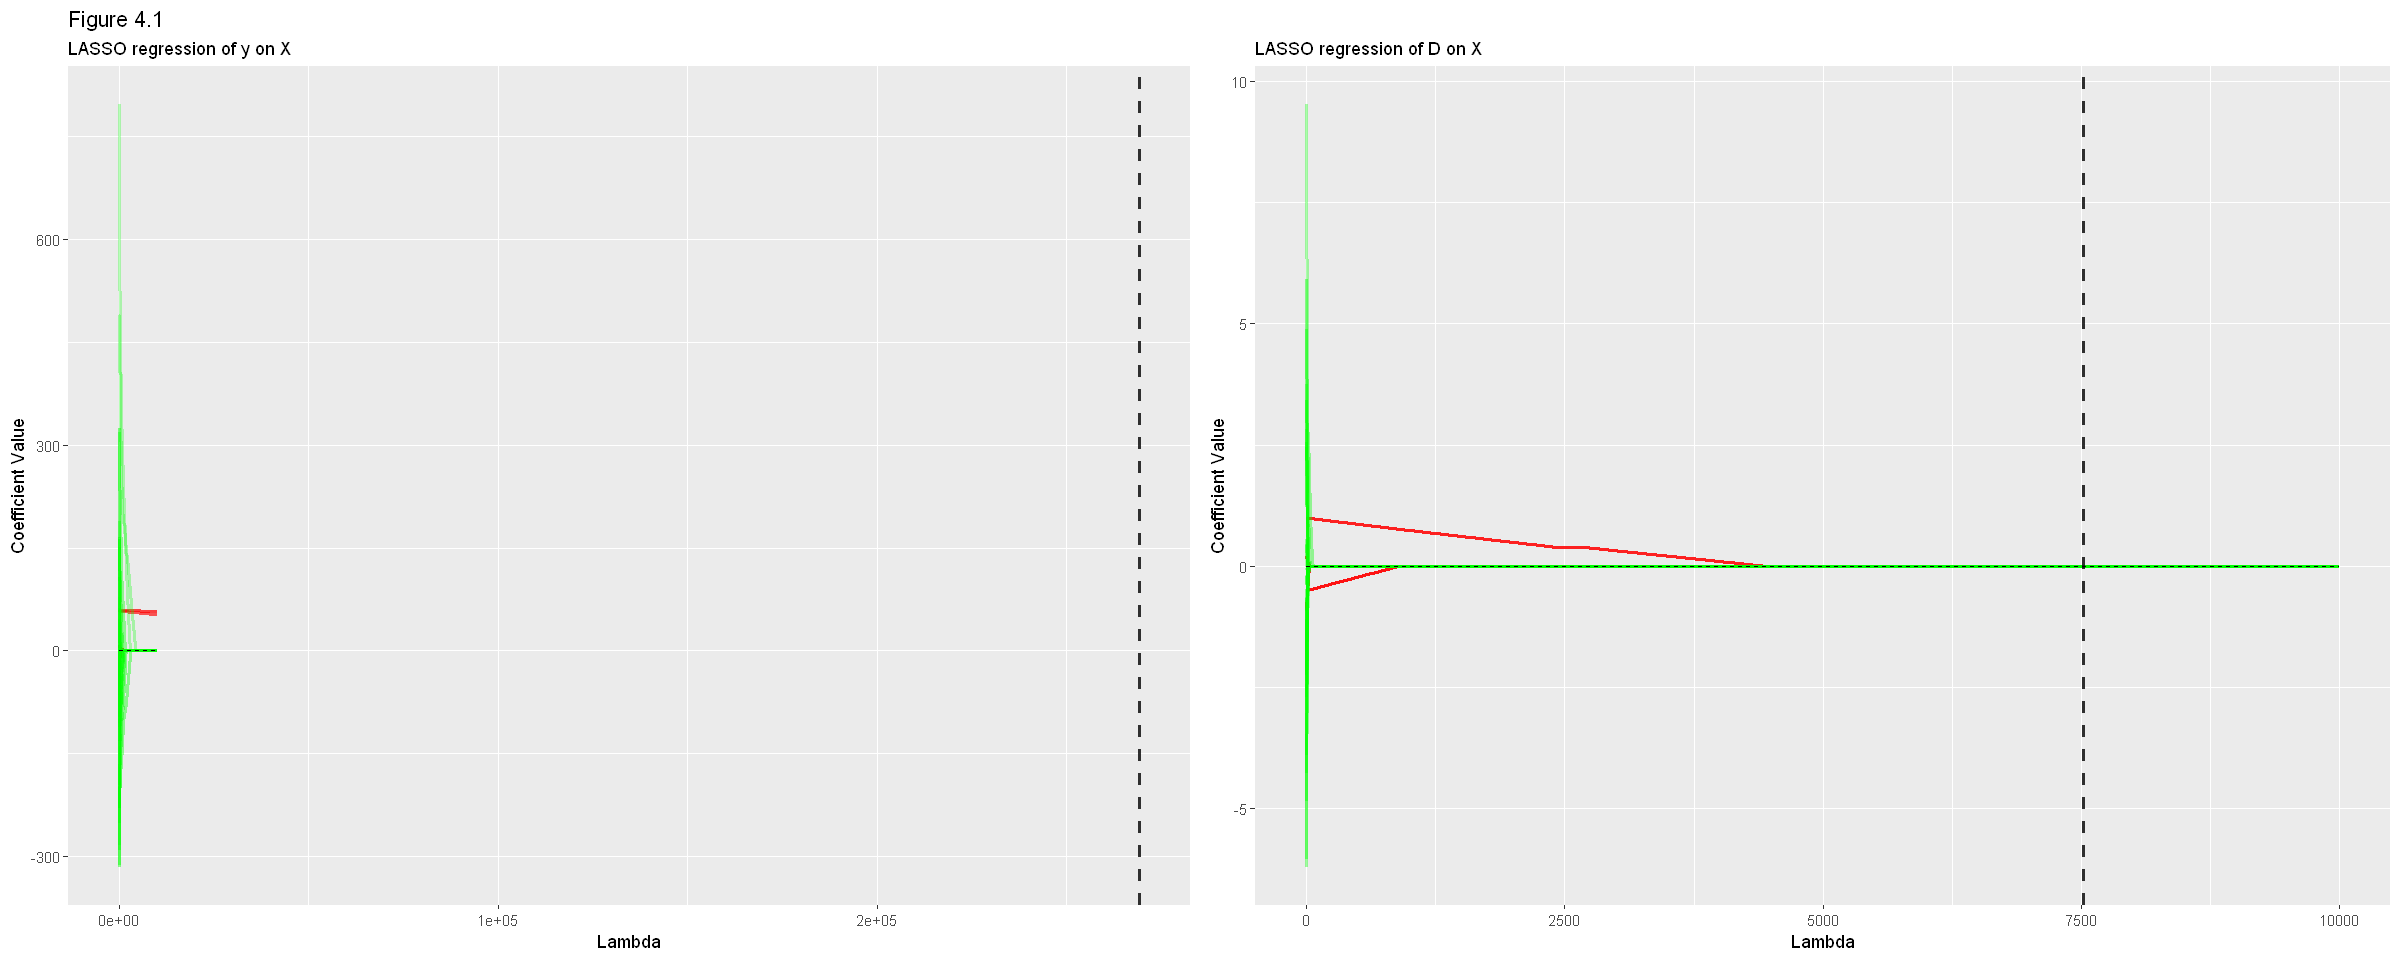

In [34]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(p1, p2, nrow=1)

In [36]:
lasso_one_cv
lasso_two_cv


Call:  cv.glmnet(x = X_train, y = y_train, type.measure = "mse", nfolds = 10,      alpha = 1, intercept = FALSE) 

Measure: Mean-Squared Error 

     Lambda   Measure        SE Nonzero
min  269354 8.190e+10 1.287e+10       2
1se 9680099 9.384e+10 1.739e+10       1


Call:  cv.glmnet(x = Z_train, y = D_train, type.measure = "mse", nfolds = 10,      alpha = 1, intercept = FALSE) 

Measure: Mean-Squared Error 

    Lambda  Measure      SE Nonzero
min   7525 19089257 1971382       1
1se 128473 20926626 2269541       1

In [ ]:
lasso_one_cv$nzero

In [40]:
beta_hats_lasso_two[400:500,]

0.10023864,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09794453,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09580124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09349284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09132641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08919069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08689658,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08475329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08244489,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08027846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.07814275,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
n_F_attr <- 30
n_H_attr <- 30
beta_F_size <- 1
beta_H_size <- 1
nonzero_controls <- 10
beta_GD_size <- .25

In [15]:
# Simulation
R <- 10
n <- 200
n_G_attr <- 100

dgp <- "houseprices"
treatment_effect <- -7

In [20]:
# Simulation
iter_over <- "beta_GY_size"
sim_parameter_vec <- seq(from=1, to=1.5, by=.02)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over,
                              sim_parameter_vec=sim_parameter_vec,
                              n=n, n_F_attr=n_F_attr,
                              n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                              treatment_effect=treatment_effect,
                              beta_GD_size=beta_GD_size,
                              beta_GY_size=beta_GY_size,
                              beta_F_size=beta_F_size,
                              beta_H_size=beta_H_size,
                              nonzero_controls=nonzero_controls,
                              ylim_bias=NaN)

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double


SIMULATION STARTED: vary over beta_GY_size with 10 repititions for each value
SIMULATION STARTED: vary over beta_GY_size with 10 repititions for each value

In [22]:
p_purchasing_power_exclusion_simple <- plots$p_purchasing_power_exclusion_simple
p_purchasing_power_exclusion_double <- plots$p_purchasing_power_exclusion_double

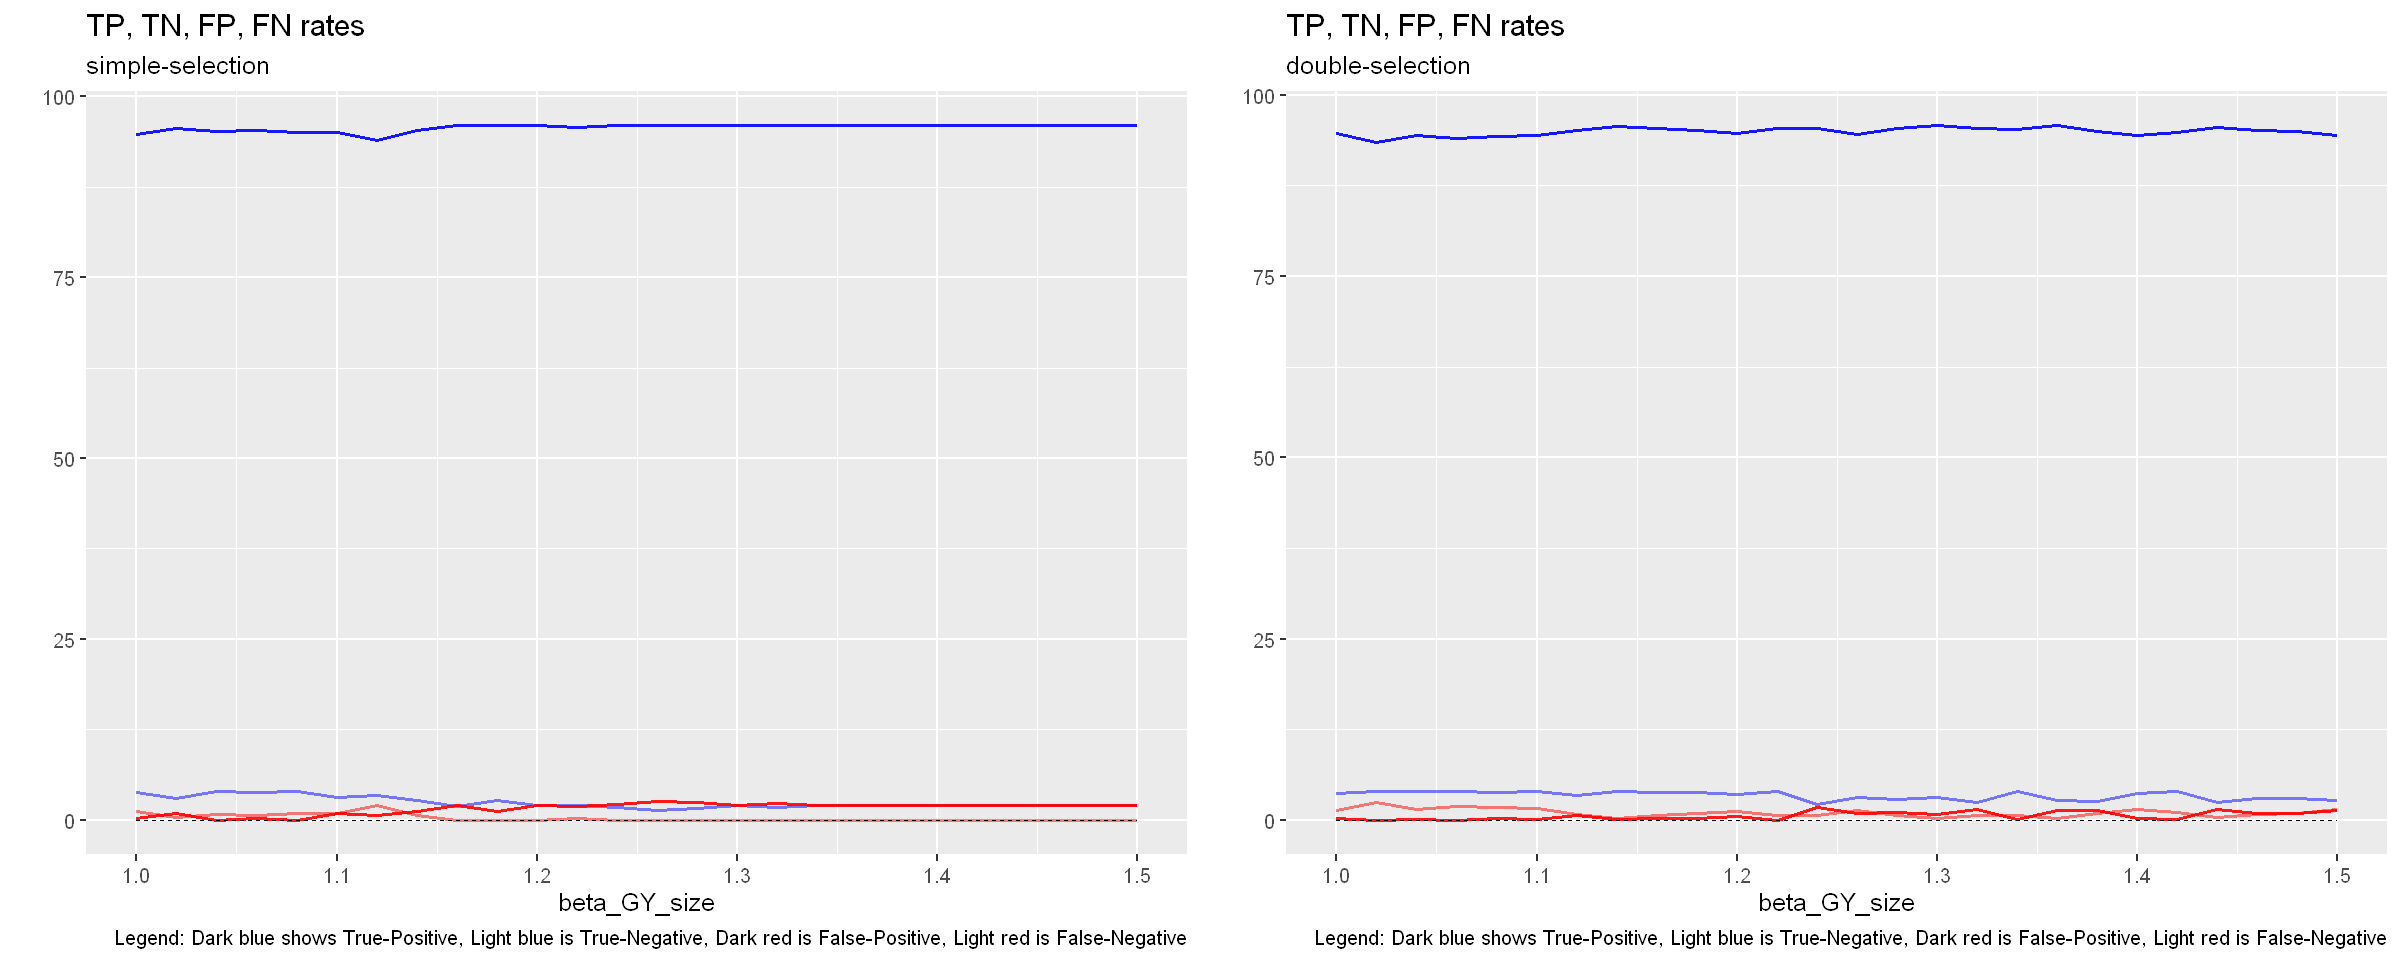

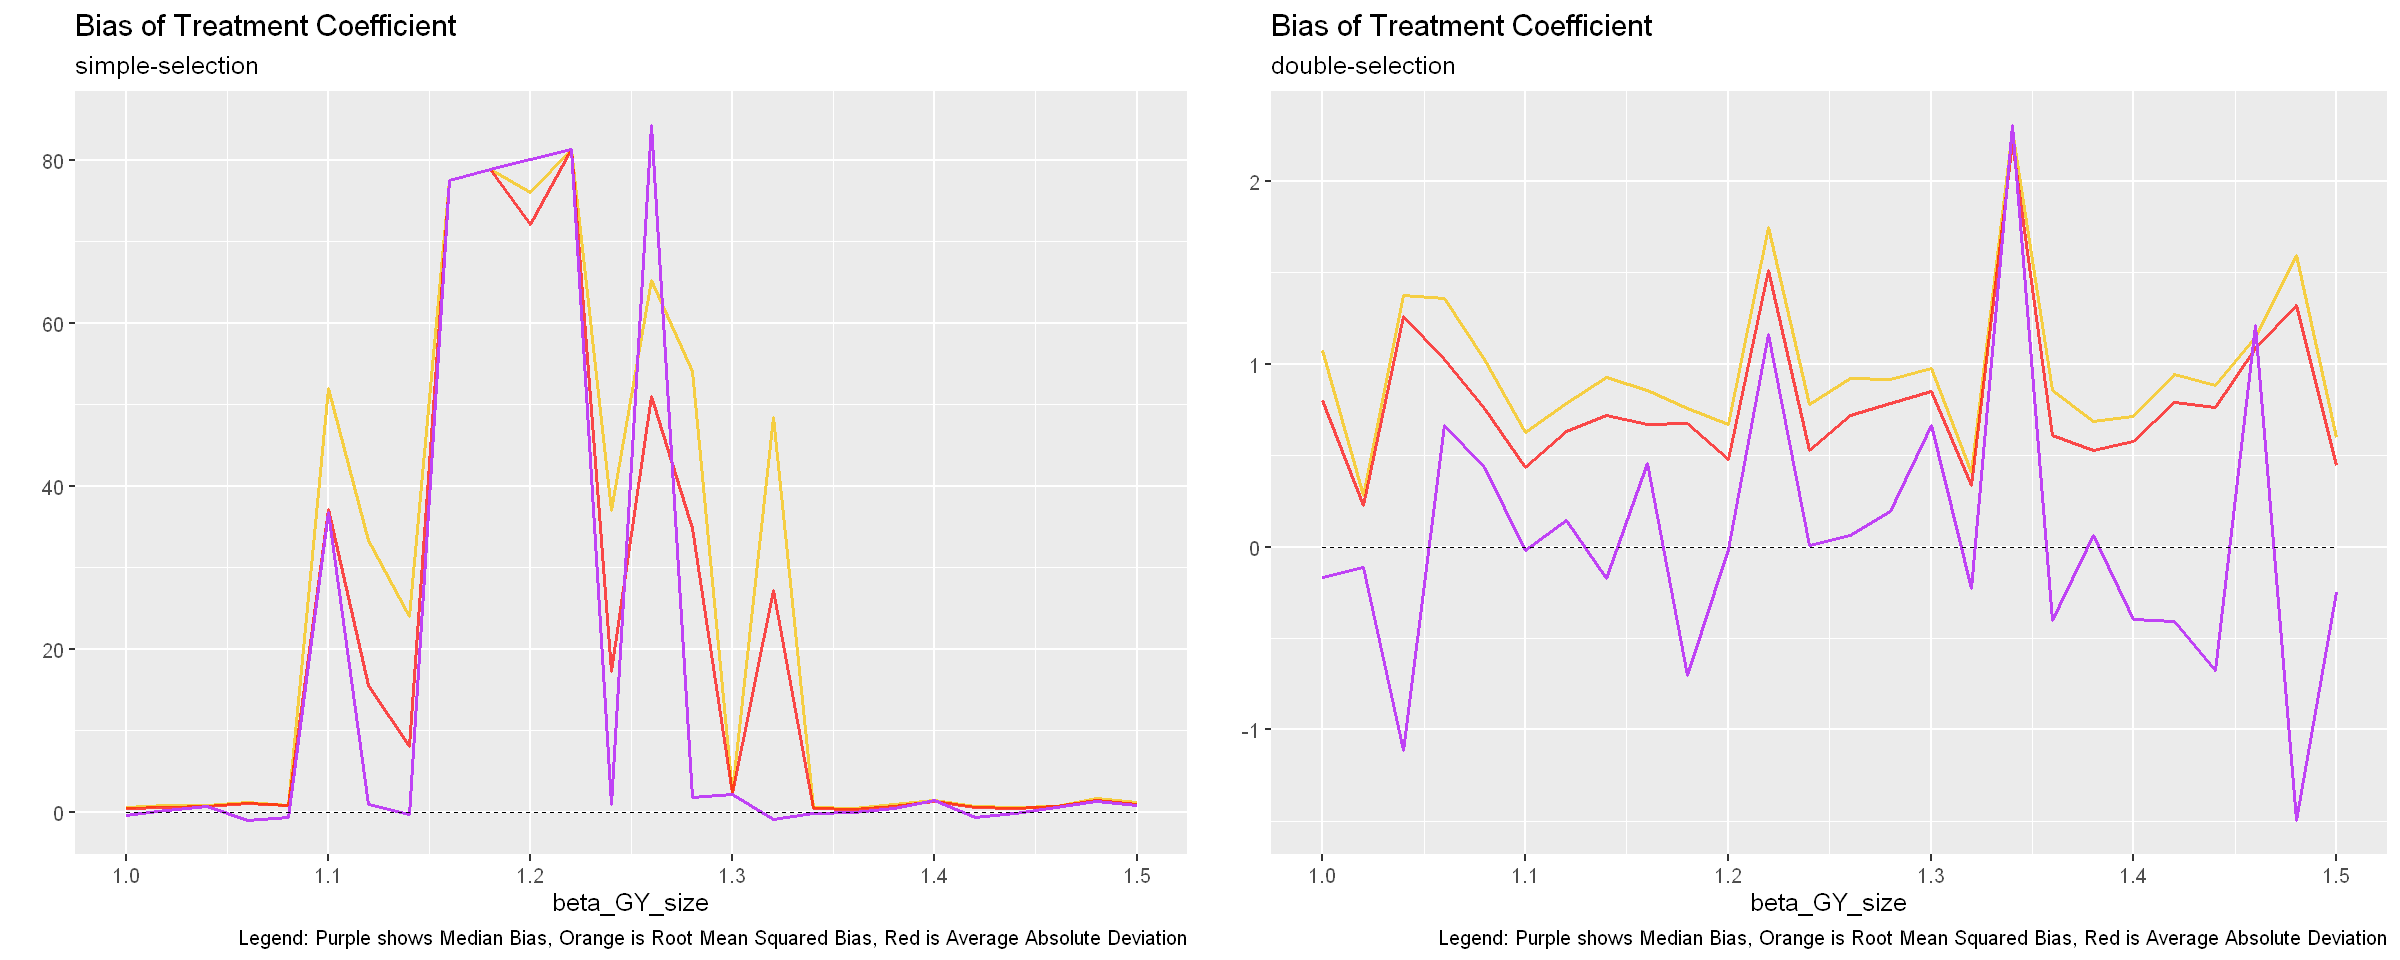

In [21]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)

TEXT

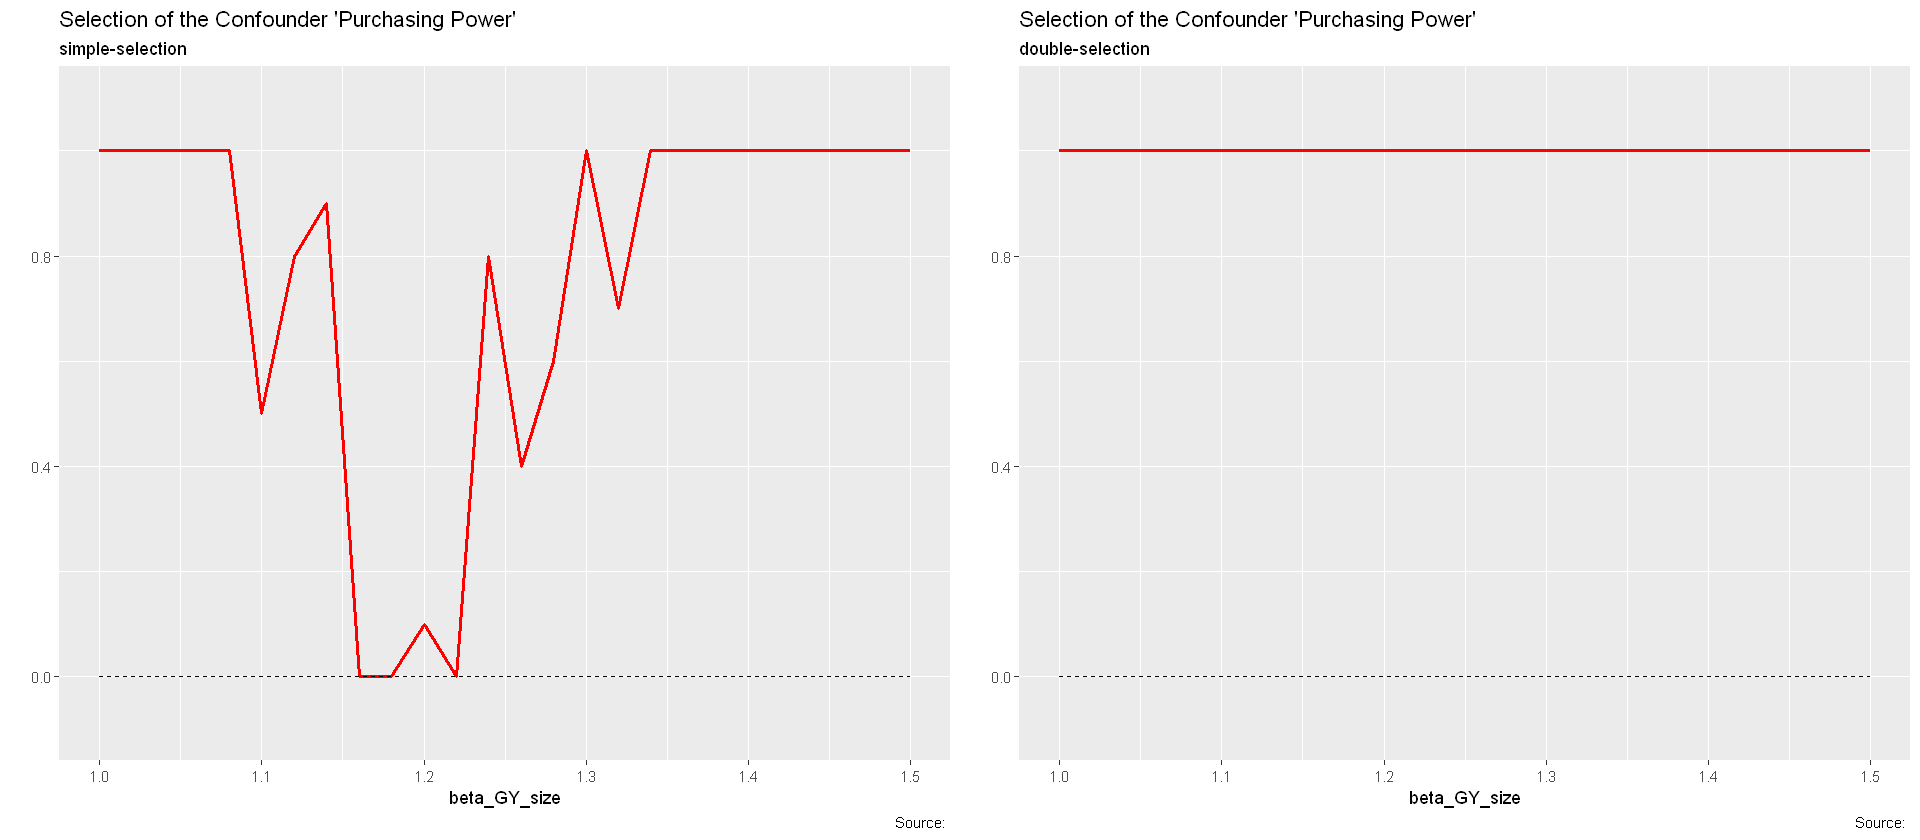

In [27]:
options(repr.plot.width=16, repr.plot.height=7)
grid.arrange(p_purchasing_power_exclusion_simple, p_purchasing_power_exclusion_double, nrow=1)

Good:
* 
* 

Bad:
* Make a table with TP FP etc rates?
* 

TODO:: 


Give some general remarks why everything is driven down and only D survives...

Not so easy statements though...

Given that the indirect effect of the confounders onto the outcome ($G -> D -> Y$) goes only through the treatment, the biased treatment coefficient captures all explanatory power for all information passing through $D$. Hence, under the goal of prediction there is a rationale for cancelling out other controls since they do not add additional information.


Missing:
* 
* 

<a id='conclusion'></a>

## 5. Concluding Remarks

Good:
* 
* 

Bad:
* 
* 

Missing:
* 
* 

<a id='references'></a>
### References

Athey, Susan, and Guido W. Imbens. 2017. "The State of Applied Econometrics: Causality and Policy Evaluation." Journal of Economic Perspectives, 31 (2): 3-32.



Alexandre Belloni, Victor Chernozhukov, Christian Hansen, Inference on Treatment Effects after Selection among High-Dimensional Controls, The Review of Economic Studies, Volume 81, Issue 2, April 2014, Pages 608–650

Belloni, Alexandre; Chernozhukov, Victor. Least squares after model selection in high-dimensional sparse models. Bernoulli 19 (2013), no. 2, 521--547

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning: with Applications in R. New York :Springer, 2013.

Thomas K. Bauer, Sebastian T. Braun, Michael Kvasnicka, Nuclear power plant closures and local housing values: Evidence from Fukushima and the German housing market, Journal of Urban Economics, Volume 99, 2017, Pages 94-106

Stephen Gibbons, Gone with the wind: Valuing the visual impacts of wind turbines through house prices, Journal of Environmental Economics and Management, Volume 72, 2015, Pages 177-196

Frondel, M., G. Kussel, S. Sommer, and C. Vance. 2019a. “Local Cost for Global Benefit: The Case of Wind Turbines.” Ruhr Economic Papers 791

Stephen Gibbons, Stephen Machin, Valuing school quality, better transport, and lower crime: evidence from house prices, Oxford Review of Economic Policy, Volume 24, Issue 1, spring 2008, Pages 99–119

Tibshirani, R. (1996), Regression Shrinkage and Selection Via the Lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58: 267-288

<a id='appendix'></a>
### Appendix

In [17]:
# Setup
dgp_B <- "B"
n_F_attr <- 100
n_H_attr <- 100
beta_H_size <- .5
beta_F_size <- .5

lambda_grid <- seq(0, 1, by=.02)

plots <- produce_lasso_coef_shrink_plot(dgp=dgp_B, n=n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                                        treatment_effect=treatment_effect, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size,
                                        beta_H_size=beta_H_size, beta_F_size=beta_F_size, nonzero_controls=nonzero_controls,
                                        lambda_grid=lambda_grid,
                                        title=" | DGP-b")
p1_b <- plots$p1
p2_b <- plots$p2

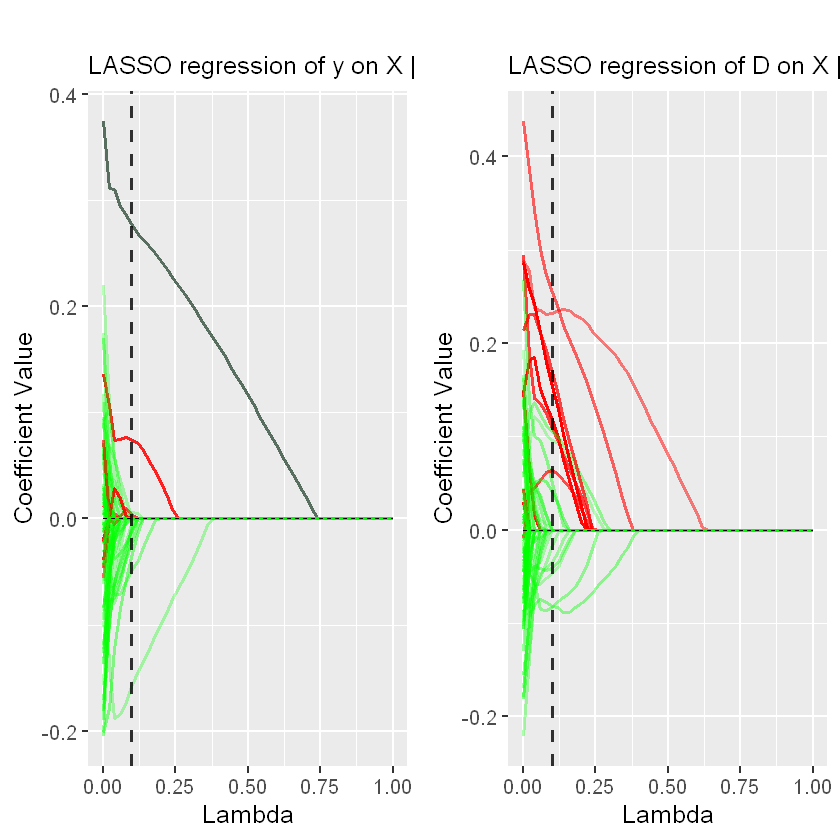

In [18]:
grid.arrange(p1_b, p2_b, nrow=1)

In [19]:
# Setup
dgp <- "houseprices"

lambda_grid <- seq(0, 2500, by=10)

plots <- produce_lasso_coef_shrink_plot(dgp=dgp, n=n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                                        treatment_effect=treatment_effect, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size,
                                        beta_H_size=beta_H_size, beta_F_size=beta_F_size, nonzero_controls=nonzero_controls,
                                        lambda_grid=lambda_grid,
                                        title=" | DGP-a-houseprices")

p1_a_houseprices <- plots$p1
p2_a_houseprices <- plots$p2

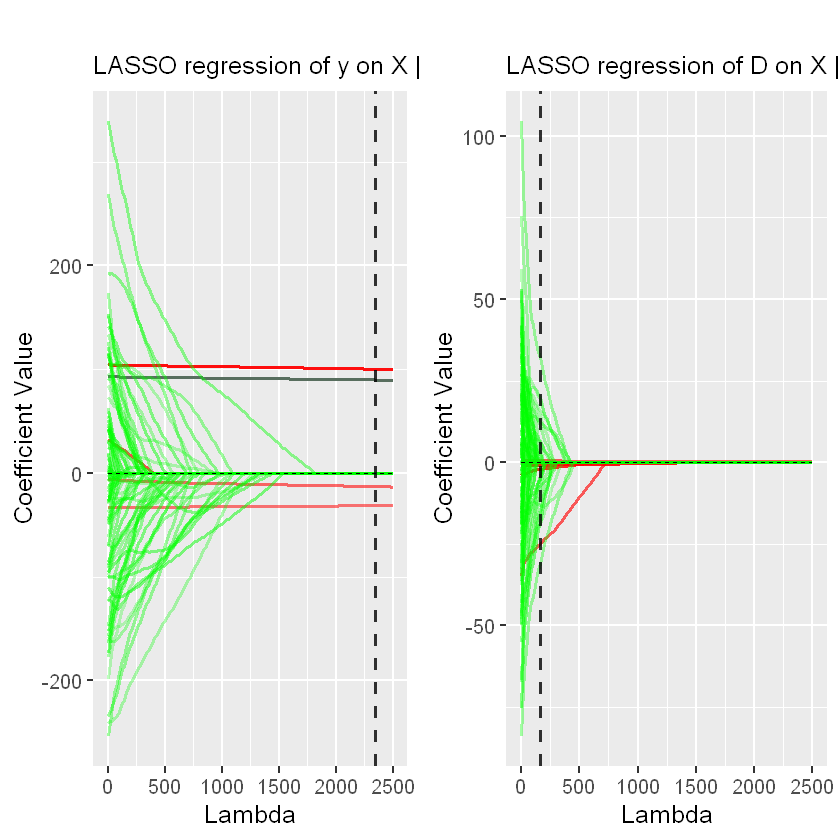

In [20]:
grid.arrange(p1_a_houseprices, p2_a_houseprices, nrow=1)

In [21]:
R <- 50

plots <- produce_bias_hist(dgp="B", R=R, n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                           treatment_effect=treatment_effect, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, beta_F_size=beta_F_size, beta_H_size=beta_H_size,
                           nonzero_controls=nonzero_controls, title=" | DGP-b")

hist_simple <- plots$hist_simple
hist_double <- plots$hist_double

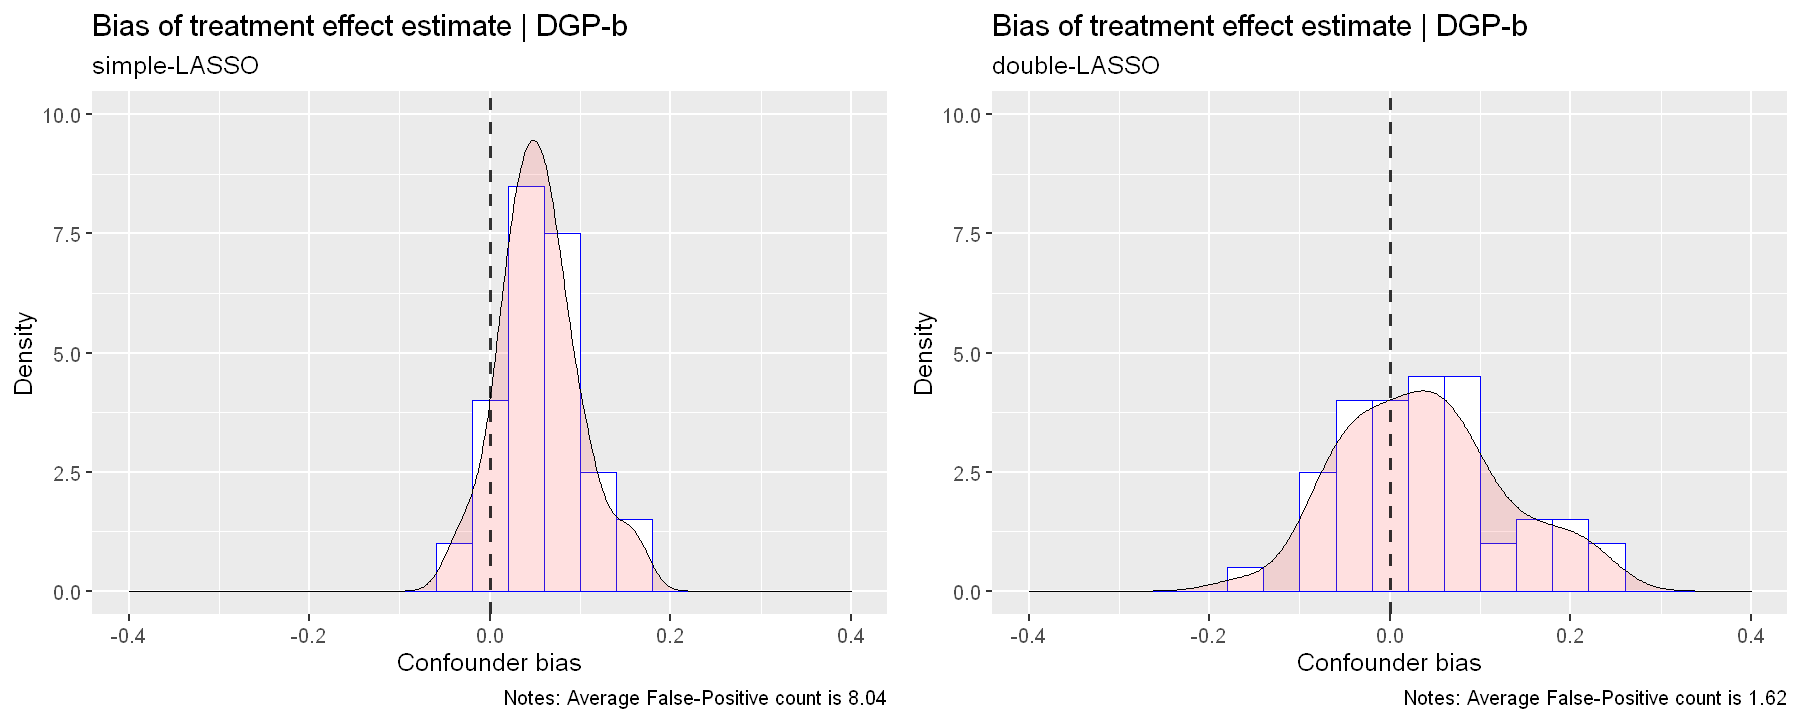

In [22]:
options(repr.plot.width=15, repr.plot.height=6)
suppressWarnings(grid.arrange(hist_simple, hist_double, nrow=1))

In [23]:
plots <- produce_bias_hist(dgp="houseprices", R=R, n, n_F_attr=n_F_attr, n_G_attr=n_G_attr, n_H_attr=n_H_attr,
                           treatment_effect=-7, beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, beta_F_size=beta_F_size, beta_H_size=beta_H_size,
                           nonzero_controls=nonzero_controls, binwidth=.2, xlim=c(-3, 3), ylim=c(0, 1.5), title=" | DGP-houseprices")

hist_simple <- plots$hist_simple
hist_double <- plots$hist_double

ERROR: Error in `[.data.frame`(data_train, colnames_covariates): undefined columns selected


In [ ]:
suppressWarnings(grid.arrange(hist_simple, hist_double, nrow=1))

<hr>
<br>

#### Vary Number of Available Controls

**Expectation**

In [ ]:
# Setup 
R <- 15
n <- 400

dgp <- "A"
n_G_attr <- 100
treatment_effect <- .25
beta_GD_size <- .25
beta_GY_size <- .1
nonzero_controls <- 10

In [ ]:
# Simulation
# Number of zero-effect predictors increases while amount of "important" controls is fixed
iter_over <- "n_G_attr"
sim_parameter_vec <- seq(from=10, to=310, by=20)

plots <- sim_plot_wrapper(dgp=dgp, R=R, iter_over=iter_over, sim_parameter_vec=sim_parameter_vec,
                          n=n, n_G_attr=n_G_attr, treatment_effect=treatment_effect,
                          beta_GD_size=beta_GD_size, beta_GY_size=beta_GY_size, 
                          nonzero_controls=nonzero_controls, ylim_bias=c(-.15, .5))

p_variable_select_simple <- plots$p_variable_select_simple
p_confounder_bias_simple <- plots$p_confounder_bias_simple
p_variable_select_double <- plots$p_variable_select_double
p_confounder_bias_double <- plots$p_confounder_bias_double

In [ ]:
grid.arrange(p_variable_select_simple, p_variable_select_double, nrow=1)
grid.arrange(p_confounder_bias_simple, p_confounder_bias_double, nrow=1)